In [1]:
import pandas as pd
import numpy as np

import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from catboost import CatBoostClassifier

import shap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## 1.  Model - No filter selection

#### 1. Load dataset 

In [2]:
df = pd.read_csv("./dataset/data-t1.csv")

In [3]:
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### 2. Clean dataset 

In [4]:
x = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = df['diagnosis'].map({"M": 0, "B": 1})

print(x.shape)

(569, 30)


#### 3. Train Model

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

model = CatBoostClassifier()
start = time.time()
model.fit(x_train, y_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

Learning rate set to 0.006952
0:	learn: 0.6807662	total: 61ms	remaining: 1m
1:	learn: 0.6687018	total: 64.8ms	remaining: 32.4s
2:	learn: 0.6572373	total: 68.1ms	remaining: 22.6s
3:	learn: 0.6467345	total: 71.5ms	remaining: 17.8s
4:	learn: 0.6359854	total: 74.3ms	remaining: 14.8s
5:	learn: 0.6259786	total: 77.2ms	remaining: 12.8s
6:	learn: 0.6150164	total: 79.6ms	remaining: 11.3s
7:	learn: 0.6035371	total: 82ms	remaining: 10.2s
8:	learn: 0.5930797	total: 84.3ms	remaining: 9.28s
9:	learn: 0.5829967	total: 86.5ms	remaining: 8.56s
10:	learn: 0.5738989	total: 88.7ms	remaining: 7.97s
11:	learn: 0.5654651	total: 90.7ms	remaining: 7.47s
12:	learn: 0.5562189	total: 93ms	remaining: 7.06s
13:	learn: 0.5478505	total: 95.2ms	remaining: 6.7s
14:	learn: 0.5383162	total: 97.3ms	remaining: 6.39s
15:	learn: 0.5304992	total: 99.5ms	remaining: 6.12s
16:	learn: 0.5230301	total: 102ms	remaining: 5.88s
17:	learn: 0.5156078	total: 104ms	remaining: 5.67s
18:	learn: 0.5079274	total: 106ms	remaining: 5.48s
19:	l

181:	learn: 0.0872570	total: 513ms	remaining: 2.3s
182:	learn: 0.0866323	total: 515ms	remaining: 2.3s
183:	learn: 0.0860219	total: 518ms	remaining: 2.29s
184:	learn: 0.0853377	total: 520ms	remaining: 2.29s
185:	learn: 0.0849170	total: 522ms	remaining: 2.29s
186:	learn: 0.0844646	total: 525ms	remaining: 2.28s
187:	learn: 0.0838721	total: 527ms	remaining: 2.28s
188:	learn: 0.0833090	total: 530ms	remaining: 2.27s
189:	learn: 0.0825377	total: 532ms	remaining: 2.27s
190:	learn: 0.0819493	total: 535ms	remaining: 2.27s
191:	learn: 0.0814545	total: 538ms	remaining: 2.26s
192:	learn: 0.0811090	total: 540ms	remaining: 2.26s
193:	learn: 0.0806065	total: 543ms	remaining: 2.25s
194:	learn: 0.0802394	total: 546ms	remaining: 2.25s
195:	learn: 0.0797145	total: 549ms	remaining: 2.25s
196:	learn: 0.0792011	total: 551ms	remaining: 2.25s
197:	learn: 0.0785007	total: 554ms	remaining: 2.24s
198:	learn: 0.0777981	total: 556ms	remaining: 2.24s
199:	learn: 0.0772770	total: 558ms	remaining: 2.23s
200:	learn: 0.

339:	learn: 0.0376003	total: 873ms	remaining: 1.69s
340:	learn: 0.0374353	total: 876ms	remaining: 1.69s
341:	learn: 0.0372853	total: 878ms	remaining: 1.69s
342:	learn: 0.0371956	total: 880ms	remaining: 1.69s
343:	learn: 0.0370188	total: 882ms	remaining: 1.68s
344:	learn: 0.0368994	total: 885ms	remaining: 1.68s
345:	learn: 0.0368041	total: 887ms	remaining: 1.68s
346:	learn: 0.0366780	total: 890ms	remaining: 1.67s
347:	learn: 0.0365441	total: 892ms	remaining: 1.67s
348:	learn: 0.0364250	total: 896ms	remaining: 1.67s
349:	learn: 0.0363025	total: 898ms	remaining: 1.67s
350:	learn: 0.0361814	total: 901ms	remaining: 1.67s
351:	learn: 0.0360712	total: 903ms	remaining: 1.66s
352:	learn: 0.0359325	total: 907ms	remaining: 1.66s
353:	learn: 0.0357932	total: 910ms	remaining: 1.66s
354:	learn: 0.0356417	total: 912ms	remaining: 1.66s
355:	learn: 0.0355429	total: 915ms	remaining: 1.65s
356:	learn: 0.0354072	total: 918ms	remaining: 1.65s
357:	learn: 0.0353629	total: 919ms	remaining: 1.65s
358:	learn: 

498:	learn: 0.0225452	total: 1.27s	remaining: 1.27s
499:	learn: 0.0224799	total: 1.27s	remaining: 1.27s
500:	learn: 0.0224242	total: 1.27s	remaining: 1.27s
501:	learn: 0.0223806	total: 1.28s	remaining: 1.27s
502:	learn: 0.0223333	total: 1.28s	remaining: 1.26s
503:	learn: 0.0222656	total: 1.28s	remaining: 1.26s
504:	learn: 0.0222281	total: 1.28s	remaining: 1.26s
505:	learn: 0.0221442	total: 1.29s	remaining: 1.26s
506:	learn: 0.0220638	total: 1.29s	remaining: 1.25s
507:	learn: 0.0219862	total: 1.29s	remaining: 1.25s
508:	learn: 0.0219517	total: 1.29s	remaining: 1.25s
509:	learn: 0.0218925	total: 1.3s	remaining: 1.25s
510:	learn: 0.0218584	total: 1.3s	remaining: 1.25s
511:	learn: 0.0217808	total: 1.3s	remaining: 1.24s
512:	learn: 0.0217278	total: 1.31s	remaining: 1.24s
513:	learn: 0.0216694	total: 1.31s	remaining: 1.24s
514:	learn: 0.0216085	total: 1.31s	remaining: 1.23s
515:	learn: 0.0215518	total: 1.31s	remaining: 1.23s
516:	learn: 0.0214780	total: 1.31s	remaining: 1.23s
517:	learn: 0.0

719:	learn: 0.0137564	total: 1.78s	remaining: 692ms
720:	learn: 0.0137320	total: 1.78s	remaining: 690ms
721:	learn: 0.0136992	total: 1.78s	remaining: 687ms
722:	learn: 0.0136578	total: 1.79s	remaining: 685ms
723:	learn: 0.0136313	total: 1.79s	remaining: 682ms
724:	learn: 0.0136021	total: 1.79s	remaining: 680ms
725:	learn: 0.0135713	total: 1.79s	remaining: 677ms
726:	learn: 0.0135508	total: 1.8s	remaining: 675ms
727:	learn: 0.0135269	total: 1.8s	remaining: 672ms
728:	learn: 0.0134968	total: 1.8s	remaining: 670ms
729:	learn: 0.0134710	total: 1.81s	remaining: 668ms
730:	learn: 0.0134336	total: 1.81s	remaining: 665ms
731:	learn: 0.0133959	total: 1.81s	remaining: 663ms
732:	learn: 0.0133640	total: 1.81s	remaining: 661ms
733:	learn: 0.0133435	total: 1.82s	remaining: 658ms
734:	learn: 0.0133241	total: 1.82s	remaining: 656ms
735:	learn: 0.0133012	total: 1.82s	remaining: 654ms
736:	learn: 0.0132798	total: 1.82s	remaining: 651ms
737:	learn: 0.0132456	total: 1.83s	remaining: 649ms
738:	learn: 0.0

878:	learn: 0.0102190	total: 2.14s	remaining: 295ms
879:	learn: 0.0102057	total: 2.14s	remaining: 292ms
880:	learn: 0.0101913	total: 2.14s	remaining: 290ms
881:	learn: 0.0101799	total: 2.15s	remaining: 287ms
882:	learn: 0.0101583	total: 2.15s	remaining: 285ms
883:	learn: 0.0101417	total: 2.15s	remaining: 282ms
884:	learn: 0.0101408	total: 2.15s	remaining: 280ms
885:	learn: 0.0101243	total: 2.16s	remaining: 278ms
886:	learn: 0.0101086	total: 2.16s	remaining: 275ms
887:	learn: 0.0101051	total: 2.16s	remaining: 273ms
888:	learn: 0.0100870	total: 2.17s	remaining: 270ms
889:	learn: 0.0100844	total: 2.17s	remaining: 268ms
890:	learn: 0.0100643	total: 2.17s	remaining: 266ms
891:	learn: 0.0100438	total: 2.17s	remaining: 263ms
892:	learn: 0.0100189	total: 2.18s	remaining: 261ms
893:	learn: 0.0100022	total: 2.18s	remaining: 258ms
894:	learn: 0.0099974	total: 2.18s	remaining: 256ms
895:	learn: 0.0099785	total: 2.18s	remaining: 254ms
896:	learn: 0.0099493	total: 2.19s	remaining: 251ms
897:	learn: 

#### 4. Model Results

## 2. Apply Feature Selection (Shap)

In [6]:
shap.initjs()

explainer = shap.Explainer(model)

start = time.time()
shap_values = explainer.shap_values(x_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

Training time: 481.0528755187988ms


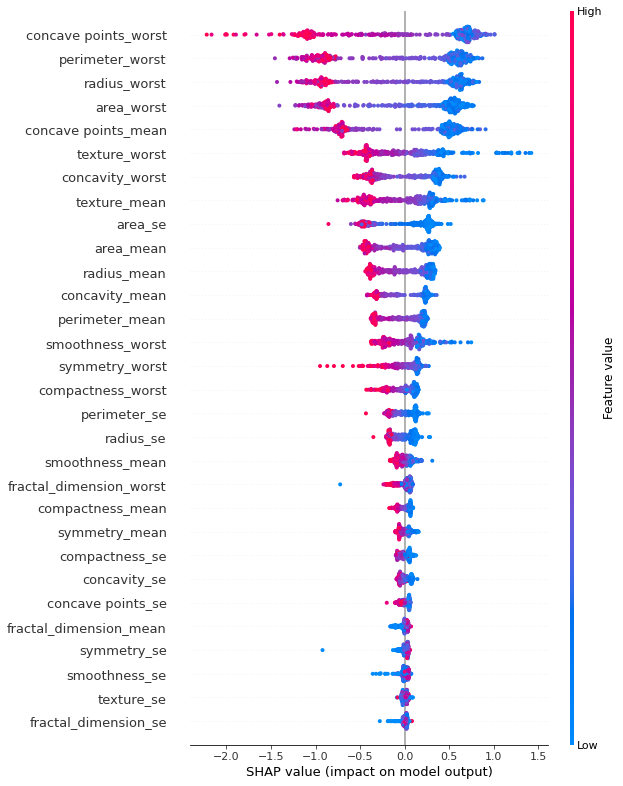

In [7]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, x_train, max_display=len(x.columns), show=False)

plt.savefig('./results/catboost/shap-catboost-image.png')

In [8]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns, vals)),columns=['feature_name','importance_value'])
feature_importance.sort_values(by=['importance_value'],ascending=False,inplace=True)
feature_importance.to_csv('./results/catboost/cancer-breast-shap-catboost.csv')

print(feature_importance.to_latex())

\begin{tabular}{llr}
\toprule
{} &             feature\_name &  importance\_value \\
\midrule
27 &     concave points\_worst &          0.740244 \\
22 &          perimeter\_worst &          0.669129 \\
20 &             radius\_worst &          0.658063 \\
23 &               area\_worst &          0.610135 \\
7  &      concave points\_mean &          0.590276 \\
21 &            texture\_worst &          0.352823 \\
26 &          concavity\_worst &          0.337185 \\
1  &             texture\_mean &          0.307245 \\
13 &                  area\_se &          0.303341 \\
3  &                area\_mean &          0.285331 \\
0  &              radius\_mean &          0.255972 \\
6  &           concavity\_mean &          0.243867 \\
2  &           perimeter\_mean &          0.211958 \\
24 &         smoothness\_worst &          0.182216 \\
28 &           symmetry\_worst &          0.139773 \\
25 &        compactness\_worst &          0.114145 \\
12 &             perimeter\_se &          

In [9]:
import os

measures_data = []
featured_names = []

def print_classification_report(classification_report):
    accuracy = classification_report["accuracy"]
    precision = classification_report["weighted avg"]["precision"]
    f1_score = classification_report["weighted avg"]["f1-score"]
    recall = classification_report["weighted avg"]["recall"]
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1_score}")
    print(f"Recall: {recall}")
    print(f"Training time: {(stop - start) * 1000 }s")

def get_measures(feature, classification_report, training_time, shap_value, storage): 
    accuracy = classification_report["accuracy"]
    precision = classification_report["weighted avg"]["precision"]
    f1_score = classification_report["weighted avg"]["f1-score"]
    recall = classification_report["weighted avg"]["recall"]
    
    measures_data.append([feature, accuracy, precision, recall, f1_score, training_time, shap_value, storage])
    
def train_model(feature, shap_value):
    featured_names.append(feature)
    
    x = df[featured_names]
    y = df['diagnosis'].map({"M": 0, "B": 1})
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

    model = CatBoostClassifier()
    start = time.time()
    model.fit(x_train, y_train)
    stop = time.time()
    
    predict = model.predict(x_test)
    
    storage = get_storage(featured_names)
    training_time = (stop - start) * 1000
    classification = classification_report(y_test, predict, output_dict=True)
    get_measures(feature, classification, training_time, shap_value, storage)
    
def get_storage(features):
    merged_features = ['diagnosis', 'id', 'Unnamed: 32'] + features
    temp = df[merged_features]
    temp.to_csv('./dataset/temp.csv')
    
    return os.stat('./dataset/temp.csv').st_size
            
def shap_all(df):
    for index, row in df.iterrows():
        train_model(row['feature_name'], row['importance_value'])

In [10]:
shap_all(feature_importance)

measures_df = pd.DataFrame(measures_data, columns = ['Feature Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Shap Value', 'Storage'])

measures_df.to_csv('./results/catboost/cancer-breast-catboost-report.csv')

Learning rate set to 0.006952
0:	learn: 0.6804530	total: 921us	remaining: 921ms
1:	learn: 0.6704983	total: 1.71ms	remaining: 854ms
2:	learn: 0.6596607	total: 2.53ms	remaining: 841ms
3:	learn: 0.6488386	total: 3.34ms	remaining: 831ms
4:	learn: 0.6391039	total: 4.23ms	remaining: 842ms
5:	learn: 0.6296141	total: 5.43ms	remaining: 900ms
6:	learn: 0.6197470	total: 6.88ms	remaining: 976ms
7:	learn: 0.6100757	total: 8.01ms	remaining: 993ms
8:	learn: 0.6002535	total: 9.63ms	remaining: 1.06s
9:	learn: 0.5912885	total: 11.1ms	remaining: 1.09s
10:	learn: 0.5814798	total: 12.2ms	remaining: 1.09s
11:	learn: 0.5728492	total: 13ms	remaining: 1.07s
12:	learn: 0.5649345	total: 14.2ms	remaining: 1.07s
13:	learn: 0.5564075	total: 15.2ms	remaining: 1.07s
14:	learn: 0.5475668	total: 16.2ms	remaining: 1.07s
15:	learn: 0.5383206	total: 17.3ms	remaining: 1.06s
16:	learn: 0.5290922	total: 18.3ms	remaining: 1.06s
17:	learn: 0.5207102	total: 19.9ms	remaining: 1.09s
18:	learn: 0.5122130	total: 21.3ms	remaining: 1

164:	learn: 0.1789001	total: 139ms	remaining: 703ms
165:	learn: 0.1785188	total: 140ms	remaining: 704ms
166:	learn: 0.1780739	total: 141ms	remaining: 703ms
167:	learn: 0.1775927	total: 142ms	remaining: 701ms
168:	learn: 0.1773449	total: 142ms	remaining: 700ms
169:	learn: 0.1769807	total: 143ms	remaining: 698ms
170:	learn: 0.1764156	total: 144ms	remaining: 696ms
171:	learn: 0.1760132	total: 144ms	remaining: 695ms
172:	learn: 0.1755213	total: 145ms	remaining: 693ms
173:	learn: 0.1749884	total: 146ms	remaining: 691ms
174:	learn: 0.1746743	total: 146ms	remaining: 689ms
175:	learn: 0.1743036	total: 147ms	remaining: 688ms
176:	learn: 0.1738306	total: 148ms	remaining: 686ms
177:	learn: 0.1734838	total: 148ms	remaining: 684ms
178:	learn: 0.1731110	total: 149ms	remaining: 683ms
179:	learn: 0.1724893	total: 150ms	remaining: 681ms
180:	learn: 0.1722034	total: 150ms	remaining: 680ms
181:	learn: 0.1718871	total: 151ms	remaining: 679ms
182:	learn: 0.1716377	total: 152ms	remaining: 677ms
183:	learn: 

420:	learn: 0.1416592	total: 307ms	remaining: 422ms
421:	learn: 0.1416189	total: 308ms	remaining: 421ms
422:	learn: 0.1415890	total: 308ms	remaining: 421ms
423:	learn: 0.1415454	total: 309ms	remaining: 420ms
424:	learn: 0.1414881	total: 310ms	remaining: 419ms
425:	learn: 0.1414152	total: 310ms	remaining: 418ms
426:	learn: 0.1413420	total: 311ms	remaining: 417ms
427:	learn: 0.1413165	total: 312ms	remaining: 417ms
428:	learn: 0.1412310	total: 312ms	remaining: 416ms
429:	learn: 0.1411614	total: 313ms	remaining: 415ms
430:	learn: 0.1411023	total: 314ms	remaining: 414ms
431:	learn: 0.1410510	total: 314ms	remaining: 413ms
432:	learn: 0.1410205	total: 315ms	remaining: 412ms
433:	learn: 0.1409662	total: 316ms	remaining: 412ms
434:	learn: 0.1408817	total: 316ms	remaining: 411ms
435:	learn: 0.1408043	total: 317ms	remaining: 410ms
436:	learn: 0.1407654	total: 318ms	remaining: 409ms
437:	learn: 0.1407116	total: 318ms	remaining: 409ms
438:	learn: 0.1406755	total: 319ms	remaining: 408ms
439:	learn: 

680:	learn: 0.1302618	total: 475ms	remaining: 223ms
681:	learn: 0.1302530	total: 476ms	remaining: 222ms
682:	learn: 0.1302361	total: 477ms	remaining: 221ms
683:	learn: 0.1301868	total: 478ms	remaining: 221ms
684:	learn: 0.1301547	total: 479ms	remaining: 220ms
685:	learn: 0.1301118	total: 479ms	remaining: 219ms
686:	learn: 0.1300671	total: 480ms	remaining: 219ms
687:	learn: 0.1300213	total: 481ms	remaining: 218ms
688:	learn: 0.1299887	total: 481ms	remaining: 217ms
689:	learn: 0.1299497	total: 482ms	remaining: 216ms
690:	learn: 0.1299161	total: 482ms	remaining: 216ms
691:	learn: 0.1298440	total: 483ms	remaining: 215ms
692:	learn: 0.1297869	total: 484ms	remaining: 214ms
693:	learn: 0.1297221	total: 484ms	remaining: 214ms
694:	learn: 0.1297055	total: 485ms	remaining: 213ms
695:	learn: 0.1296754	total: 486ms	remaining: 212ms
696:	learn: 0.1296216	total: 486ms	remaining: 211ms
697:	learn: 0.1295774	total: 487ms	remaining: 211ms
698:	learn: 0.1295019	total: 487ms	remaining: 210ms
699:	learn: 

939:	learn: 0.1196054	total: 644ms	remaining: 41.1ms
940:	learn: 0.1195585	total: 645ms	remaining: 40.4ms
941:	learn: 0.1195287	total: 646ms	remaining: 39.8ms
942:	learn: 0.1194938	total: 646ms	remaining: 39.1ms
943:	learn: 0.1194593	total: 647ms	remaining: 38.4ms
944:	learn: 0.1194292	total: 648ms	remaining: 37.7ms
945:	learn: 0.1193550	total: 648ms	remaining: 37ms
946:	learn: 0.1193265	total: 649ms	remaining: 36.3ms
947:	learn: 0.1192929	total: 650ms	remaining: 35.6ms
948:	learn: 0.1192775	total: 650ms	remaining: 35ms
949:	learn: 0.1192542	total: 651ms	remaining: 34.3ms
950:	learn: 0.1192127	total: 652ms	remaining: 33.6ms
951:	learn: 0.1191287	total: 652ms	remaining: 32.9ms
952:	learn: 0.1190976	total: 653ms	remaining: 32.2ms
953:	learn: 0.1190870	total: 653ms	remaining: 31.5ms
954:	learn: 0.1190126	total: 654ms	remaining: 30.8ms
955:	learn: 0.1189629	total: 655ms	remaining: 30.1ms
956:	learn: 0.1188895	total: 655ms	remaining: 29.4ms
957:	learn: 0.1188637	total: 656ms	remaining: 28.8

130:	learn: 0.1593275	total: 104ms	remaining: 690ms
131:	learn: 0.1586096	total: 105ms	remaining: 690ms
132:	learn: 0.1579949	total: 106ms	remaining: 690ms
133:	learn: 0.1572721	total: 107ms	remaining: 690ms
134:	learn: 0.1566152	total: 107ms	remaining: 689ms
135:	learn: 0.1556352	total: 108ms	remaining: 688ms
136:	learn: 0.1550218	total: 109ms	remaining: 687ms
137:	learn: 0.1541659	total: 110ms	remaining: 685ms
138:	learn: 0.1534248	total: 111ms	remaining: 685ms
139:	learn: 0.1528140	total: 112ms	remaining: 685ms
140:	learn: 0.1519284	total: 112ms	remaining: 685ms
141:	learn: 0.1512730	total: 113ms	remaining: 685ms
142:	learn: 0.1504723	total: 114ms	remaining: 684ms
143:	learn: 0.1498552	total: 115ms	remaining: 683ms
144:	learn: 0.1492455	total: 116ms	remaining: 682ms
145:	learn: 0.1484329	total: 117ms	remaining: 682ms
146:	learn: 0.1476540	total: 117ms	remaining: 681ms
147:	learn: 0.1470189	total: 118ms	remaining: 680ms
148:	learn: 0.1463947	total: 119ms	remaining: 679ms
149:	learn: 

354:	learn: 0.0952745	total: 276ms	remaining: 501ms
355:	learn: 0.0951911	total: 277ms	remaining: 501ms
356:	learn: 0.0951266	total: 278ms	remaining: 501ms
357:	learn: 0.0950593	total: 279ms	remaining: 501ms
358:	learn: 0.0950041	total: 281ms	remaining: 502ms
359:	learn: 0.0949373	total: 282ms	remaining: 502ms
360:	learn: 0.0947145	total: 283ms	remaining: 501ms
361:	learn: 0.0946593	total: 284ms	remaining: 500ms
362:	learn: 0.0945178	total: 285ms	remaining: 500ms
363:	learn: 0.0943481	total: 286ms	remaining: 499ms
364:	learn: 0.0943002	total: 286ms	remaining: 498ms
365:	learn: 0.0941994	total: 287ms	remaining: 497ms
366:	learn: 0.0941191	total: 288ms	remaining: 496ms
367:	learn: 0.0940074	total: 288ms	remaining: 495ms
368:	learn: 0.0939878	total: 289ms	remaining: 494ms
369:	learn: 0.0939182	total: 290ms	remaining: 494ms
370:	learn: 0.0938226	total: 291ms	remaining: 493ms
371:	learn: 0.0937247	total: 291ms	remaining: 492ms
372:	learn: 0.0936816	total: 292ms	remaining: 491ms
373:	learn: 

576:	learn: 0.0780108	total: 449ms	remaining: 329ms
577:	learn: 0.0779981	total: 450ms	remaining: 329ms
578:	learn: 0.0778756	total: 451ms	remaining: 328ms
579:	learn: 0.0778112	total: 452ms	remaining: 327ms
580:	learn: 0.0777761	total: 453ms	remaining: 327ms
581:	learn: 0.0777562	total: 454ms	remaining: 326ms
582:	learn: 0.0776364	total: 455ms	remaining: 325ms
583:	learn: 0.0776035	total: 455ms	remaining: 324ms
584:	learn: 0.0775544	total: 456ms	remaining: 324ms
585:	learn: 0.0774964	total: 457ms	remaining: 323ms
586:	learn: 0.0774618	total: 458ms	remaining: 322ms
587:	learn: 0.0773717	total: 458ms	remaining: 321ms
588:	learn: 0.0773111	total: 459ms	remaining: 320ms
589:	learn: 0.0772291	total: 460ms	remaining: 320ms
590:	learn: 0.0771514	total: 461ms	remaining: 319ms
591:	learn: 0.0770790	total: 462ms	remaining: 318ms
592:	learn: 0.0770224	total: 462ms	remaining: 317ms
593:	learn: 0.0769680	total: 463ms	remaining: 316ms
594:	learn: 0.0769257	total: 464ms	remaining: 316ms
595:	learn: 

804:	learn: 0.0649478	total: 624ms	remaining: 151ms
805:	learn: 0.0649286	total: 625ms	remaining: 150ms
806:	learn: 0.0648880	total: 625ms	remaining: 150ms
807:	learn: 0.0648674	total: 626ms	remaining: 149ms
808:	learn: 0.0648300	total: 627ms	remaining: 148ms
809:	learn: 0.0647938	total: 628ms	remaining: 147ms
810:	learn: 0.0647375	total: 629ms	remaining: 147ms
811:	learn: 0.0646796	total: 629ms	remaining: 146ms
812:	learn: 0.0646086	total: 630ms	remaining: 145ms
813:	learn: 0.0645838	total: 631ms	remaining: 144ms
814:	learn: 0.0645451	total: 632ms	remaining: 143ms
815:	learn: 0.0645103	total: 632ms	remaining: 143ms
816:	learn: 0.0644622	total: 633ms	remaining: 142ms
817:	learn: 0.0643550	total: 634ms	remaining: 141ms
818:	learn: 0.0643339	total: 635ms	remaining: 140ms
819:	learn: 0.0642175	total: 635ms	remaining: 139ms
820:	learn: 0.0641876	total: 636ms	remaining: 139ms
821:	learn: 0.0641651	total: 637ms	remaining: 138ms
822:	learn: 0.0641551	total: 638ms	remaining: 137ms
823:	learn: 

0:	learn: 0.6802217	total: 1.69ms	remaining: 1.69s
1:	learn: 0.6680439	total: 2.91ms	remaining: 1.45s
2:	learn: 0.6573699	total: 3.59ms	remaining: 1.19s
3:	learn: 0.6455186	total: 4.78ms	remaining: 1.19s
4:	learn: 0.6349895	total: 5.86ms	remaining: 1.17s
5:	learn: 0.6224087	total: 6.94ms	remaining: 1.15s
6:	learn: 0.6123088	total: 8.05ms	remaining: 1.14s
7:	learn: 0.6013239	total: 9.17ms	remaining: 1.14s
8:	learn: 0.5908790	total: 10.4ms	remaining: 1.14s
9:	learn: 0.5813080	total: 11.4ms	remaining: 1.13s
10:	learn: 0.5728236	total: 12.2ms	remaining: 1.1s
11:	learn: 0.5622001	total: 13.1ms	remaining: 1.08s
12:	learn: 0.5521001	total: 14.1ms	remaining: 1.07s
13:	learn: 0.5426392	total: 15.1ms	remaining: 1.06s
14:	learn: 0.5345519	total: 16ms	remaining: 1.05s
15:	learn: 0.5250453	total: 16.8ms	remaining: 1.03s
16:	learn: 0.5161730	total: 17.6ms	remaining: 1.02s
17:	learn: 0.5074391	total: 18.4ms	remaining: 1s
18:	learn: 0.4991575	total: 19.2ms	remaining: 992ms
19:	learn: 0.4912703	total: 

216:	learn: 0.1123528	total: 177ms	remaining: 639ms
217:	learn: 0.1120186	total: 178ms	remaining: 639ms
218:	learn: 0.1116029	total: 179ms	remaining: 639ms
219:	learn: 0.1113189	total: 180ms	remaining: 638ms
220:	learn: 0.1109130	total: 181ms	remaining: 637ms
221:	learn: 0.1106076	total: 182ms	remaining: 637ms
222:	learn: 0.1102755	total: 182ms	remaining: 636ms
223:	learn: 0.1101544	total: 183ms	remaining: 635ms
224:	learn: 0.1098592	total: 184ms	remaining: 634ms
225:	learn: 0.1096948	total: 185ms	remaining: 633ms
226:	learn: 0.1093216	total: 186ms	remaining: 632ms
227:	learn: 0.1090568	total: 186ms	remaining: 631ms
228:	learn: 0.1087619	total: 187ms	remaining: 630ms
229:	learn: 0.1084963	total: 188ms	remaining: 630ms
230:	learn: 0.1082508	total: 189ms	remaining: 629ms
231:	learn: 0.1080512	total: 190ms	remaining: 628ms
232:	learn: 0.1078689	total: 190ms	remaining: 627ms
233:	learn: 0.1075314	total: 191ms	remaining: 626ms
234:	learn: 0.1072868	total: 192ms	remaining: 625ms
235:	learn: 

431:	learn: 0.0775761	total: 351ms	remaining: 462ms
432:	learn: 0.0774960	total: 352ms	remaining: 461ms
433:	learn: 0.0772814	total: 353ms	remaining: 461ms
434:	learn: 0.0772191	total: 354ms	remaining: 460ms
435:	learn: 0.0771167	total: 355ms	remaining: 460ms
436:	learn: 0.0770584	total: 356ms	remaining: 459ms
437:	learn: 0.0769657	total: 357ms	remaining: 458ms
438:	learn: 0.0769017	total: 358ms	remaining: 457ms
439:	learn: 0.0768066	total: 358ms	remaining: 456ms
440:	learn: 0.0767093	total: 359ms	remaining: 455ms
441:	learn: 0.0766417	total: 360ms	remaining: 455ms
442:	learn: 0.0765151	total: 361ms	remaining: 454ms
443:	learn: 0.0763728	total: 362ms	remaining: 453ms
444:	learn: 0.0762967	total: 362ms	remaining: 452ms
445:	learn: 0.0762031	total: 363ms	remaining: 451ms
446:	learn: 0.0761327	total: 364ms	remaining: 450ms
447:	learn: 0.0760346	total: 365ms	remaining: 449ms
448:	learn: 0.0759621	total: 366ms	remaining: 449ms
449:	learn: 0.0759197	total: 366ms	remaining: 448ms
450:	learn: 

648:	learn: 0.0618536	total: 526ms	remaining: 285ms
649:	learn: 0.0617857	total: 527ms	remaining: 284ms
650:	learn: 0.0617487	total: 528ms	remaining: 283ms
651:	learn: 0.0617097	total: 529ms	remaining: 282ms
652:	learn: 0.0616611	total: 530ms	remaining: 282ms
653:	learn: 0.0615816	total: 531ms	remaining: 281ms
654:	learn: 0.0615469	total: 532ms	remaining: 280ms
655:	learn: 0.0614807	total: 533ms	remaining: 279ms
656:	learn: 0.0614338	total: 533ms	remaining: 278ms
657:	learn: 0.0613591	total: 534ms	remaining: 278ms
658:	learn: 0.0612811	total: 535ms	remaining: 277ms
659:	learn: 0.0612127	total: 536ms	remaining: 276ms
660:	learn: 0.0611481	total: 537ms	remaining: 275ms
661:	learn: 0.0610875	total: 537ms	remaining: 274ms
662:	learn: 0.0610332	total: 538ms	remaining: 274ms
663:	learn: 0.0609695	total: 539ms	remaining: 273ms
664:	learn: 0.0609281	total: 540ms	remaining: 272ms
665:	learn: 0.0608260	total: 541ms	remaining: 271ms
666:	learn: 0.0607135	total: 542ms	remaining: 270ms
667:	learn: 

864:	learn: 0.0497607	total: 702ms	remaining: 110ms
865:	learn: 0.0497115	total: 703ms	remaining: 109ms
866:	learn: 0.0496469	total: 704ms	remaining: 108ms
867:	learn: 0.0496054	total: 705ms	remaining: 107ms
868:	learn: 0.0495296	total: 706ms	remaining: 106ms
869:	learn: 0.0494792	total: 707ms	remaining: 106ms
870:	learn: 0.0494281	total: 707ms	remaining: 105ms
871:	learn: 0.0493510	total: 708ms	remaining: 104ms
872:	learn: 0.0492801	total: 709ms	remaining: 103ms
873:	learn: 0.0492110	total: 710ms	remaining: 102ms
874:	learn: 0.0491645	total: 711ms	remaining: 102ms
875:	learn: 0.0491104	total: 712ms	remaining: 101ms
876:	learn: 0.0490413	total: 712ms	remaining: 99.9ms
877:	learn: 0.0490040	total: 713ms	remaining: 99.1ms
878:	learn: 0.0489520	total: 714ms	remaining: 98.3ms
879:	learn: 0.0489067	total: 715ms	remaining: 97.5ms
880:	learn: 0.0488651	total: 716ms	remaining: 96.7ms
881:	learn: 0.0487819	total: 717ms	remaining: 95.9ms
882:	learn: 0.0487238	total: 717ms	remaining: 95ms
883:	le

43:	learn: 0.3425629	total: 38.4ms	remaining: 834ms
44:	learn: 0.3372631	total: 39.3ms	remaining: 835ms
45:	learn: 0.3327484	total: 40.4ms	remaining: 837ms
46:	learn: 0.3286911	total: 41.3ms	remaining: 838ms
47:	learn: 0.3239249	total: 42.2ms	remaining: 838ms
48:	learn: 0.3201294	total: 43.1ms	remaining: 836ms
49:	learn: 0.3164121	total: 44ms	remaining: 836ms
50:	learn: 0.3119697	total: 44.8ms	remaining: 833ms
51:	learn: 0.3077085	total: 45.7ms	remaining: 833ms
52:	learn: 0.3034757	total: 46.5ms	remaining: 832ms
53:	learn: 0.2996089	total: 47.4ms	remaining: 830ms
54:	learn: 0.2956160	total: 48.2ms	remaining: 829ms
55:	learn: 0.2916938	total: 49.1ms	remaining: 828ms
56:	learn: 0.2877893	total: 49.9ms	remaining: 826ms
57:	learn: 0.2841585	total: 50.8ms	remaining: 825ms
58:	learn: 0.2816719	total: 51.7ms	remaining: 824ms
59:	learn: 0.2780668	total: 52.5ms	remaining: 822ms
60:	learn: 0.2745780	total: 53.4ms	remaining: 821ms
61:	learn: 0.2709137	total: 54.3ms	remaining: 821ms
62:	learn: 0.2

252:	learn: 0.0999539	total: 213ms	remaining: 630ms
253:	learn: 0.0997073	total: 214ms	remaining: 630ms
254:	learn: 0.0994144	total: 215ms	remaining: 629ms
255:	learn: 0.0992016	total: 216ms	remaining: 629ms
256:	learn: 0.0990862	total: 217ms	remaining: 628ms
257:	learn: 0.0988524	total: 218ms	remaining: 628ms
258:	learn: 0.0986291	total: 219ms	remaining: 627ms
259:	learn: 0.0984827	total: 220ms	remaining: 626ms
260:	learn: 0.0981868	total: 221ms	remaining: 625ms
261:	learn: 0.0979360	total: 222ms	remaining: 624ms
262:	learn: 0.0977390	total: 223ms	remaining: 624ms
263:	learn: 0.0975820	total: 223ms	remaining: 623ms
264:	learn: 0.0973897	total: 224ms	remaining: 622ms
265:	learn: 0.0972395	total: 225ms	remaining: 621ms
266:	learn: 0.0970012	total: 226ms	remaining: 620ms
267:	learn: 0.0968025	total: 227ms	remaining: 620ms
268:	learn: 0.0966406	total: 228ms	remaining: 619ms
269:	learn: 0.0964918	total: 229ms	remaining: 618ms
270:	learn: 0.0962130	total: 229ms	remaining: 617ms
271:	learn: 

461:	learn: 0.0728844	total: 390ms	remaining: 454ms
462:	learn: 0.0727971	total: 391ms	remaining: 453ms
463:	learn: 0.0727523	total: 392ms	remaining: 453ms
464:	learn: 0.0726282	total: 393ms	remaining: 452ms
465:	learn: 0.0725531	total: 394ms	remaining: 451ms
466:	learn: 0.0724606	total: 394ms	remaining: 450ms
467:	learn: 0.0724012	total: 395ms	remaining: 449ms
468:	learn: 0.0723446	total: 396ms	remaining: 448ms
469:	learn: 0.0722152	total: 397ms	remaining: 448ms
470:	learn: 0.0721697	total: 398ms	remaining: 447ms
471:	learn: 0.0721013	total: 399ms	remaining: 446ms
472:	learn: 0.0719868	total: 399ms	remaining: 445ms
473:	learn: 0.0718310	total: 400ms	remaining: 444ms
474:	learn: 0.0716724	total: 401ms	remaining: 443ms
475:	learn: 0.0715714	total: 402ms	remaining: 442ms
476:	learn: 0.0715473	total: 403ms	remaining: 442ms
477:	learn: 0.0714261	total: 404ms	remaining: 441ms
478:	learn: 0.0713541	total: 404ms	remaining: 440ms
479:	learn: 0.0712837	total: 405ms	remaining: 439ms
480:	learn: 

672:	learn: 0.0593124	total: 567ms	remaining: 276ms
673:	learn: 0.0592724	total: 568ms	remaining: 275ms
674:	learn: 0.0591688	total: 569ms	remaining: 274ms
675:	learn: 0.0591207	total: 570ms	remaining: 273ms
676:	learn: 0.0590233	total: 571ms	remaining: 272ms
677:	learn: 0.0589864	total: 572ms	remaining: 271ms
678:	learn: 0.0589644	total: 572ms	remaining: 271ms
679:	learn: 0.0589370	total: 573ms	remaining: 270ms
680:	learn: 0.0589124	total: 574ms	remaining: 269ms
681:	learn: 0.0588798	total: 575ms	remaining: 268ms
682:	learn: 0.0588528	total: 576ms	remaining: 267ms
683:	learn: 0.0588264	total: 577ms	remaining: 266ms
684:	learn: 0.0587398	total: 577ms	remaining: 265ms
685:	learn: 0.0586690	total: 578ms	remaining: 265ms
686:	learn: 0.0586389	total: 579ms	remaining: 264ms
687:	learn: 0.0585702	total: 580ms	remaining: 263ms
688:	learn: 0.0585044	total: 581ms	remaining: 262ms
689:	learn: 0.0584499	total: 582ms	remaining: 261ms
690:	learn: 0.0583545	total: 582ms	remaining: 260ms
691:	learn: 

882:	learn: 0.0479655	total: 743ms	remaining: 98.5ms
883:	learn: 0.0479221	total: 744ms	remaining: 97.7ms
884:	learn: 0.0478745	total: 745ms	remaining: 96.9ms
885:	learn: 0.0478447	total: 746ms	remaining: 96ms
886:	learn: 0.0478003	total: 747ms	remaining: 95.2ms
887:	learn: 0.0477510	total: 748ms	remaining: 94.4ms
888:	learn: 0.0477184	total: 749ms	remaining: 93.5ms
889:	learn: 0.0476709	total: 750ms	remaining: 92.7ms
890:	learn: 0.0476290	total: 751ms	remaining: 91.8ms
891:	learn: 0.0476107	total: 752ms	remaining: 91ms
892:	learn: 0.0475800	total: 752ms	remaining: 90.1ms
893:	learn: 0.0475638	total: 753ms	remaining: 89.3ms
894:	learn: 0.0475072	total: 754ms	remaining: 88.5ms
895:	learn: 0.0473929	total: 755ms	remaining: 87.6ms
896:	learn: 0.0473487	total: 756ms	remaining: 86.8ms
897:	learn: 0.0473058	total: 757ms	remaining: 85.9ms
898:	learn: 0.0472615	total: 757ms	remaining: 85.1ms
899:	learn: 0.0471415	total: 758ms	remaining: 84.2ms
900:	learn: 0.0471238	total: 759ms	remaining: 83.4

55:	learn: 0.3001307	total: 50.4ms	remaining: 850ms
56:	learn: 0.2962450	total: 51.6ms	remaining: 853ms
57:	learn: 0.2928542	total: 52.7ms	remaining: 855ms
58:	learn: 0.2900483	total: 53.6ms	remaining: 855ms
59:	learn: 0.2871550	total: 54.5ms	remaining: 853ms
60:	learn: 0.2833295	total: 55.3ms	remaining: 852ms
61:	learn: 0.2802819	total: 56.2ms	remaining: 851ms
62:	learn: 0.2771421	total: 57.1ms	remaining: 850ms
63:	learn: 0.2742357	total: 58ms	remaining: 849ms
64:	learn: 0.2710428	total: 59ms	remaining: 848ms
65:	learn: 0.2684419	total: 59.8ms	remaining: 847ms
66:	learn: 0.2656561	total: 60.7ms	remaining: 845ms
67:	learn: 0.2629247	total: 61.6ms	remaining: 844ms
68:	learn: 0.2601456	total: 62.6ms	remaining: 844ms
69:	learn: 0.2579677	total: 63.6ms	remaining: 845ms
70:	learn: 0.2553064	total: 64.6ms	remaining: 845ms
71:	learn: 0.2525776	total: 65.5ms	remaining: 845ms
72:	learn: 0.2498891	total: 66.5ms	remaining: 844ms
73:	learn: 0.2477503	total: 68.1ms	remaining: 852ms
74:	learn: 0.245

254:	learn: 0.1071025	total: 226ms	remaining: 659ms
255:	learn: 0.1069278	total: 227ms	remaining: 659ms
256:	learn: 0.1066633	total: 228ms	remaining: 658ms
257:	learn: 0.1064342	total: 229ms	remaining: 658ms
258:	learn: 0.1061033	total: 230ms	remaining: 657ms
259:	learn: 0.1059183	total: 231ms	remaining: 656ms
260:	learn: 0.1057581	total: 231ms	remaining: 655ms
261:	learn: 0.1054524	total: 232ms	remaining: 654ms
262:	learn: 0.1051784	total: 233ms	remaining: 654ms
263:	learn: 0.1048892	total: 234ms	remaining: 653ms
264:	learn: 0.1046690	total: 235ms	remaining: 652ms
265:	learn: 0.1043711	total: 236ms	remaining: 651ms
266:	learn: 0.1041797	total: 237ms	remaining: 650ms
267:	learn: 0.1038698	total: 238ms	remaining: 649ms
268:	learn: 0.1037386	total: 239ms	remaining: 648ms
269:	learn: 0.1034093	total: 239ms	remaining: 647ms
270:	learn: 0.1032318	total: 240ms	remaining: 646ms
271:	learn: 0.1028993	total: 241ms	remaining: 646ms
272:	learn: 0.1026417	total: 242ms	remaining: 645ms
273:	learn: 

453:	learn: 0.0768952	total: 401ms	remaining: 483ms
454:	learn: 0.0768288	total: 403ms	remaining: 482ms
455:	learn: 0.0767054	total: 404ms	remaining: 482ms
456:	learn: 0.0765726	total: 405ms	remaining: 481ms
457:	learn: 0.0764853	total: 406ms	remaining: 480ms
458:	learn: 0.0764006	total: 407ms	remaining: 479ms
459:	learn: 0.0763413	total: 408ms	remaining: 479ms
460:	learn: 0.0761873	total: 409ms	remaining: 478ms
461:	learn: 0.0760496	total: 409ms	remaining: 477ms
462:	learn: 0.0759864	total: 410ms	remaining: 476ms
463:	learn: 0.0758195	total: 411ms	remaining: 475ms
464:	learn: 0.0757101	total: 412ms	remaining: 474ms
465:	learn: 0.0756766	total: 413ms	remaining: 473ms
466:	learn: 0.0754957	total: 414ms	remaining: 473ms
467:	learn: 0.0753144	total: 415ms	remaining: 472ms
468:	learn: 0.0752461	total: 416ms	remaining: 471ms
469:	learn: 0.0751398	total: 417ms	remaining: 470ms
470:	learn: 0.0750915	total: 418ms	remaining: 469ms
471:	learn: 0.0749285	total: 419ms	remaining: 468ms
472:	learn: 

652:	learn: 0.0610783	total: 577ms	remaining: 307ms
653:	learn: 0.0610135	total: 578ms	remaining: 306ms
654:	learn: 0.0609436	total: 579ms	remaining: 305ms
655:	learn: 0.0609352	total: 580ms	remaining: 304ms
656:	learn: 0.0608748	total: 581ms	remaining: 303ms
657:	learn: 0.0608317	total: 582ms	remaining: 302ms
658:	learn: 0.0607611	total: 583ms	remaining: 302ms
659:	learn: 0.0606826	total: 584ms	remaining: 301ms
660:	learn: 0.0606201	total: 585ms	remaining: 300ms
661:	learn: 0.0604942	total: 586ms	remaining: 299ms
662:	learn: 0.0604125	total: 587ms	remaining: 298ms
663:	learn: 0.0603803	total: 587ms	remaining: 297ms
664:	learn: 0.0603197	total: 588ms	remaining: 296ms
665:	learn: 0.0602471	total: 589ms	remaining: 295ms
666:	learn: 0.0601934	total: 590ms	remaining: 295ms
667:	learn: 0.0601758	total: 591ms	remaining: 294ms
668:	learn: 0.0601564	total: 592ms	remaining: 293ms
669:	learn: 0.0600495	total: 593ms	remaining: 292ms
670:	learn: 0.0600055	total: 594ms	remaining: 291ms
671:	learn: 

853:	learn: 0.0493956	total: 754ms	remaining: 129ms
854:	learn: 0.0493477	total: 755ms	remaining: 128ms
855:	learn: 0.0493278	total: 756ms	remaining: 127ms
856:	learn: 0.0492979	total: 757ms	remaining: 126ms
857:	learn: 0.0492724	total: 758ms	remaining: 125ms
858:	learn: 0.0492256	total: 758ms	remaining: 124ms
859:	learn: 0.0491646	total: 759ms	remaining: 124ms
860:	learn: 0.0490859	total: 760ms	remaining: 123ms
861:	learn: 0.0490583	total: 761ms	remaining: 122ms
862:	learn: 0.0490325	total: 762ms	remaining: 121ms
863:	learn: 0.0489771	total: 763ms	remaining: 120ms
864:	learn: 0.0489550	total: 764ms	remaining: 119ms
865:	learn: 0.0489195	total: 765ms	remaining: 118ms
866:	learn: 0.0488901	total: 765ms	remaining: 117ms
867:	learn: 0.0487769	total: 766ms	remaining: 117ms
868:	learn: 0.0487398	total: 767ms	remaining: 116ms
869:	learn: 0.0487035	total: 768ms	remaining: 115ms
870:	learn: 0.0486655	total: 769ms	remaining: 114ms
871:	learn: 0.0486216	total: 770ms	remaining: 113ms
872:	learn: 

17:	learn: 0.5111024	total: 21.1ms	remaining: 1.15s
18:	learn: 0.5036578	total: 22.4ms	remaining: 1.16s
19:	learn: 0.4953291	total: 23.5ms	remaining: 1.15s
20:	learn: 0.4880672	total: 24.4ms	remaining: 1.14s
21:	learn: 0.4802296	total: 25.3ms	remaining: 1.12s
22:	learn: 0.4723432	total: 26.2ms	remaining: 1.11s
23:	learn: 0.4659173	total: 27.1ms	remaining: 1.1s
24:	learn: 0.4583064	total: 28ms	remaining: 1.09s
25:	learn: 0.4516236	total: 28.9ms	remaining: 1.08s
26:	learn: 0.4440743	total: 29.8ms	remaining: 1.07s
27:	learn: 0.4372792	total: 30.8ms	remaining: 1.07s
28:	learn: 0.4298296	total: 31.7ms	remaining: 1.06s
29:	learn: 0.4234826	total: 32.6ms	remaining: 1.05s
30:	learn: 0.4169500	total: 33.4ms	remaining: 1.04s
31:	learn: 0.4102740	total: 34.4ms	remaining: 1.04s
32:	learn: 0.4043597	total: 35.4ms	remaining: 1.04s
33:	learn: 0.3979152	total: 36.4ms	remaining: 1.03s
34:	learn: 0.3920912	total: 38.2ms	remaining: 1.05s
35:	learn: 0.3863940	total: 39.2ms	remaining: 1.05s
36:	learn: 0.38

210:	learn: 0.0965994	total: 197ms	remaining: 738ms
211:	learn: 0.0962936	total: 198ms	remaining: 737ms
212:	learn: 0.0960033	total: 200ms	remaining: 737ms
213:	learn: 0.0955289	total: 201ms	remaining: 737ms
214:	learn: 0.0951617	total: 202ms	remaining: 736ms
215:	learn: 0.0948228	total: 202ms	remaining: 735ms
216:	learn: 0.0945097	total: 203ms	remaining: 734ms
217:	learn: 0.0942119	total: 204ms	remaining: 733ms
218:	learn: 0.0938704	total: 205ms	remaining: 732ms
219:	learn: 0.0935507	total: 206ms	remaining: 730ms
220:	learn: 0.0932509	total: 207ms	remaining: 729ms
221:	learn: 0.0929572	total: 208ms	remaining: 728ms
222:	learn: 0.0926480	total: 209ms	remaining: 728ms
223:	learn: 0.0924421	total: 210ms	remaining: 727ms
224:	learn: 0.0920628	total: 211ms	remaining: 726ms
225:	learn: 0.0916312	total: 212ms	remaining: 725ms
226:	learn: 0.0912192	total: 213ms	remaining: 724ms
227:	learn: 0.0907980	total: 214ms	remaining: 724ms
228:	learn: 0.0903777	total: 215ms	remaining: 723ms
229:	learn: 

403:	learn: 0.0561274	total: 373ms	remaining: 551ms
404:	learn: 0.0560292	total: 374ms	remaining: 550ms
405:	learn: 0.0559277	total: 376ms	remaining: 550ms
406:	learn: 0.0557849	total: 377ms	remaining: 549ms
407:	learn: 0.0556720	total: 378ms	remaining: 548ms
408:	learn: 0.0554711	total: 379ms	remaining: 547ms
409:	learn: 0.0553760	total: 380ms	remaining: 546ms
410:	learn: 0.0553097	total: 381ms	remaining: 545ms
411:	learn: 0.0551985	total: 381ms	remaining: 544ms
412:	learn: 0.0551655	total: 382ms	remaining: 544ms
413:	learn: 0.0550706	total: 383ms	remaining: 543ms
414:	learn: 0.0549915	total: 384ms	remaining: 542ms
415:	learn: 0.0549069	total: 385ms	remaining: 541ms
416:	learn: 0.0548127	total: 386ms	remaining: 540ms
417:	learn: 0.0546691	total: 387ms	remaining: 539ms
418:	learn: 0.0545152	total: 388ms	remaining: 538ms
419:	learn: 0.0544274	total: 389ms	remaining: 537ms
420:	learn: 0.0543406	total: 390ms	remaining: 536ms
421:	learn: 0.0541810	total: 391ms	remaining: 535ms
422:	learn: 

595:	learn: 0.0405681	total: 550ms	remaining: 373ms
596:	learn: 0.0405311	total: 551ms	remaining: 372ms
597:	learn: 0.0404771	total: 552ms	remaining: 371ms
598:	learn: 0.0403915	total: 553ms	remaining: 370ms
599:	learn: 0.0403640	total: 554ms	remaining: 369ms
600:	learn: 0.0403173	total: 555ms	remaining: 368ms
601:	learn: 0.0402897	total: 556ms	remaining: 368ms
602:	learn: 0.0402440	total: 557ms	remaining: 367ms
603:	learn: 0.0401526	total: 558ms	remaining: 366ms
604:	learn: 0.0400619	total: 559ms	remaining: 365ms
605:	learn: 0.0399959	total: 560ms	remaining: 364ms
606:	learn: 0.0399215	total: 561ms	remaining: 363ms
607:	learn: 0.0398743	total: 562ms	remaining: 362ms
608:	learn: 0.0397695	total: 563ms	remaining: 361ms
609:	learn: 0.0397042	total: 564ms	remaining: 360ms
610:	learn: 0.0396778	total: 564ms	remaining: 359ms
611:	learn: 0.0396190	total: 565ms	remaining: 358ms
612:	learn: 0.0395800	total: 566ms	remaining: 358ms
613:	learn: 0.0394994	total: 568ms	remaining: 357ms
614:	learn: 

787:	learn: 0.0298088	total: 726ms	remaining: 195ms
788:	learn: 0.0297615	total: 727ms	remaining: 195ms
789:	learn: 0.0297128	total: 729ms	remaining: 194ms
790:	learn: 0.0296717	total: 730ms	remaining: 193ms
791:	learn: 0.0296332	total: 731ms	remaining: 192ms
792:	learn: 0.0296092	total: 732ms	remaining: 191ms
793:	learn: 0.0295322	total: 733ms	remaining: 190ms
794:	learn: 0.0294794	total: 734ms	remaining: 189ms
795:	learn: 0.0294473	total: 734ms	remaining: 188ms
796:	learn: 0.0294215	total: 735ms	remaining: 187ms
797:	learn: 0.0293476	total: 736ms	remaining: 186ms
798:	learn: 0.0292961	total: 737ms	remaining: 186ms
799:	learn: 0.0292280	total: 738ms	remaining: 185ms
800:	learn: 0.0291715	total: 739ms	remaining: 184ms
801:	learn: 0.0291227	total: 740ms	remaining: 183ms
802:	learn: 0.0290649	total: 741ms	remaining: 182ms
803:	learn: 0.0290157	total: 742ms	remaining: 181ms
804:	learn: 0.0289964	total: 743ms	remaining: 180ms
805:	learn: 0.0289339	total: 745ms	remaining: 179ms
806:	learn: 

979:	learn: 0.0224510	total: 903ms	remaining: 18.4ms
980:	learn: 0.0224185	total: 904ms	remaining: 17.5ms
981:	learn: 0.0223830	total: 905ms	remaining: 16.6ms
982:	learn: 0.0223641	total: 906ms	remaining: 15.7ms
983:	learn: 0.0223185	total: 907ms	remaining: 14.8ms
984:	learn: 0.0222999	total: 908ms	remaining: 13.8ms
985:	learn: 0.0222897	total: 909ms	remaining: 12.9ms
986:	learn: 0.0222613	total: 910ms	remaining: 12ms
987:	learn: 0.0222230	total: 911ms	remaining: 11.1ms
988:	learn: 0.0221965	total: 912ms	remaining: 10.1ms
989:	learn: 0.0221813	total: 914ms	remaining: 9.23ms
990:	learn: 0.0221545	total: 915ms	remaining: 8.31ms
991:	learn: 0.0221209	total: 917ms	remaining: 7.39ms
992:	learn: 0.0220725	total: 918ms	remaining: 6.47ms
993:	learn: 0.0220644	total: 919ms	remaining: 5.55ms
994:	learn: 0.0220176	total: 921ms	remaining: 4.63ms
995:	learn: 0.0219963	total: 922ms	remaining: 3.7ms
996:	learn: 0.0219570	total: 924ms	remaining: 2.78ms
997:	learn: 0.0219452	total: 925ms	remaining: 1.8

173:	learn: 0.0979795	total: 175ms	remaining: 832ms
174:	learn: 0.0974524	total: 176ms	remaining: 832ms
175:	learn: 0.0967677	total: 178ms	remaining: 831ms
176:	learn: 0.0962488	total: 179ms	remaining: 831ms
177:	learn: 0.0958485	total: 180ms	remaining: 830ms
178:	learn: 0.0952880	total: 181ms	remaining: 828ms
179:	learn: 0.0946326	total: 182ms	remaining: 827ms
180:	learn: 0.0939562	total: 183ms	remaining: 826ms
181:	learn: 0.0934365	total: 184ms	remaining: 825ms
182:	learn: 0.0929308	total: 184ms	remaining: 824ms
183:	learn: 0.0923777	total: 185ms	remaining: 823ms
184:	learn: 0.0917736	total: 186ms	remaining: 821ms
185:	learn: 0.0913283	total: 187ms	remaining: 820ms
186:	learn: 0.0908517	total: 188ms	remaining: 819ms
187:	learn: 0.0903551	total: 189ms	remaining: 818ms
188:	learn: 0.0898479	total: 190ms	remaining: 817ms
189:	learn: 0.0893923	total: 191ms	remaining: 815ms
190:	learn: 0.0890529	total: 192ms	remaining: 814ms
191:	learn: 0.0885146	total: 193ms	remaining: 814ms
192:	learn: 

355:	learn: 0.0470330	total: 352ms	remaining: 636ms
356:	learn: 0.0469358	total: 353ms	remaining: 635ms
357:	learn: 0.0468625	total: 354ms	remaining: 635ms
358:	learn: 0.0467229	total: 355ms	remaining: 634ms
359:	learn: 0.0465536	total: 356ms	remaining: 633ms
360:	learn: 0.0464158	total: 357ms	remaining: 632ms
361:	learn: 0.0463097	total: 358ms	remaining: 631ms
362:	learn: 0.0461898	total: 359ms	remaining: 630ms
363:	learn: 0.0461204	total: 360ms	remaining: 629ms
364:	learn: 0.0459786	total: 361ms	remaining: 628ms
365:	learn: 0.0457920	total: 362ms	remaining: 627ms
366:	learn: 0.0456529	total: 363ms	remaining: 626ms
367:	learn: 0.0455002	total: 364ms	remaining: 625ms
368:	learn: 0.0453544	total: 365ms	remaining: 624ms
369:	learn: 0.0452149	total: 366ms	remaining: 623ms
370:	learn: 0.0450740	total: 367ms	remaining: 622ms
371:	learn: 0.0448901	total: 368ms	remaining: 621ms
372:	learn: 0.0447850	total: 370ms	remaining: 622ms
373:	learn: 0.0446636	total: 371ms	remaining: 621ms
374:	learn: 

536:	learn: 0.0306270	total: 527ms	remaining: 455ms
537:	learn: 0.0305901	total: 529ms	remaining: 454ms
538:	learn: 0.0305157	total: 530ms	remaining: 453ms
539:	learn: 0.0304710	total: 531ms	remaining: 452ms
540:	learn: 0.0304021	total: 532ms	remaining: 451ms
541:	learn: 0.0303480	total: 533ms	remaining: 450ms
542:	learn: 0.0302788	total: 534ms	remaining: 449ms
543:	learn: 0.0302414	total: 535ms	remaining: 448ms
544:	learn: 0.0301518	total: 536ms	remaining: 447ms
545:	learn: 0.0301077	total: 537ms	remaining: 446ms
546:	learn: 0.0300541	total: 538ms	remaining: 445ms
547:	learn: 0.0300162	total: 539ms	remaining: 445ms
548:	learn: 0.0299596	total: 540ms	remaining: 444ms
549:	learn: 0.0298836	total: 541ms	remaining: 443ms
550:	learn: 0.0298254	total: 542ms	remaining: 442ms
551:	learn: 0.0297221	total: 543ms	remaining: 441ms
552:	learn: 0.0296925	total: 544ms	remaining: 440ms
553:	learn: 0.0296343	total: 545ms	remaining: 439ms
554:	learn: 0.0295970	total: 547ms	remaining: 438ms
555:	learn: 

718:	learn: 0.0214855	total: 703ms	remaining: 275ms
719:	learn: 0.0214421	total: 704ms	remaining: 274ms
720:	learn: 0.0213870	total: 706ms	remaining: 273ms
721:	learn: 0.0213463	total: 707ms	remaining: 272ms
722:	learn: 0.0212903	total: 708ms	remaining: 271ms
723:	learn: 0.0212447	total: 709ms	remaining: 270ms
724:	learn: 0.0212121	total: 710ms	remaining: 269ms
725:	learn: 0.0211839	total: 711ms	remaining: 268ms
726:	learn: 0.0211704	total: 712ms	remaining: 267ms
727:	learn: 0.0211314	total: 713ms	remaining: 266ms
728:	learn: 0.0210835	total: 714ms	remaining: 265ms
729:	learn: 0.0210243	total: 715ms	remaining: 264ms
730:	learn: 0.0209972	total: 716ms	remaining: 263ms
731:	learn: 0.0209520	total: 717ms	remaining: 262ms
732:	learn: 0.0209394	total: 718ms	remaining: 261ms
733:	learn: 0.0209005	total: 719ms	remaining: 261ms
734:	learn: 0.0208539	total: 720ms	remaining: 260ms
735:	learn: 0.0208245	total: 722ms	remaining: 259ms
736:	learn: 0.0207568	total: 723ms	remaining: 258ms
737:	learn: 

901:	learn: 0.0155460	total: 880ms	remaining: 95.6ms
902:	learn: 0.0155084	total: 881ms	remaining: 94.7ms
903:	learn: 0.0154870	total: 882ms	remaining: 93.7ms
904:	learn: 0.0154554	total: 883ms	remaining: 92.7ms
905:	learn: 0.0154289	total: 884ms	remaining: 91.8ms
906:	learn: 0.0153898	total: 885ms	remaining: 90.8ms
907:	learn: 0.0153647	total: 886ms	remaining: 89.8ms
908:	learn: 0.0153381	total: 887ms	remaining: 88.8ms
909:	learn: 0.0153119	total: 888ms	remaining: 87.9ms
910:	learn: 0.0152894	total: 889ms	remaining: 86.9ms
911:	learn: 0.0152645	total: 890ms	remaining: 85.9ms
912:	learn: 0.0152391	total: 891ms	remaining: 84.9ms
913:	learn: 0.0151997	total: 892ms	remaining: 83.9ms
914:	learn: 0.0151803	total: 893ms	remaining: 83ms
915:	learn: 0.0151490	total: 894ms	remaining: 82ms
916:	learn: 0.0151139	total: 895ms	remaining: 81ms
917:	learn: 0.0150842	total: 896ms	remaining: 80.1ms
918:	learn: 0.0150573	total: 898ms	remaining: 79.1ms
919:	learn: 0.0150308	total: 899ms	remaining: 78.2ms

160:	learn: 0.1038506	total: 177ms	remaining: 921ms
161:	learn: 0.1031812	total: 178ms	remaining: 922ms
162:	learn: 0.1024251	total: 179ms	remaining: 921ms
163:	learn: 0.1015037	total: 181ms	remaining: 921ms
164:	learn: 0.1008172	total: 182ms	remaining: 920ms
165:	learn: 0.1003231	total: 183ms	remaining: 920ms
166:	learn: 0.0996446	total: 184ms	remaining: 919ms
167:	learn: 0.0991554	total: 186ms	remaining: 919ms
168:	learn: 0.0985043	total: 187ms	remaining: 918ms
169:	learn: 0.0978647	total: 188ms	remaining: 917ms
170:	learn: 0.0974108	total: 189ms	remaining: 916ms
171:	learn: 0.0968172	total: 190ms	remaining: 915ms
172:	learn: 0.0963684	total: 191ms	remaining: 914ms
173:	learn: 0.0957903	total: 192ms	remaining: 913ms
174:	learn: 0.0953623	total: 194ms	remaining: 912ms
175:	learn: 0.0948433	total: 195ms	remaining: 911ms
176:	learn: 0.0943223	total: 196ms	remaining: 910ms
177:	learn: 0.0938084	total: 197ms	remaining: 910ms
178:	learn: 0.0931769	total: 198ms	remaining: 909ms
179:	learn: 

321:	learn: 0.0509816	total: 352ms	remaining: 741ms
322:	learn: 0.0508458	total: 353ms	remaining: 740ms
323:	learn: 0.0507065	total: 355ms	remaining: 740ms
324:	learn: 0.0506004	total: 356ms	remaining: 739ms
325:	learn: 0.0505504	total: 356ms	remaining: 737ms
326:	learn: 0.0503950	total: 358ms	remaining: 736ms
327:	learn: 0.0502253	total: 359ms	remaining: 735ms
328:	learn: 0.0500817	total: 360ms	remaining: 734ms
329:	learn: 0.0499410	total: 361ms	remaining: 733ms
330:	learn: 0.0498137	total: 362ms	remaining: 732ms
331:	learn: 0.0496482	total: 363ms	remaining: 731ms
332:	learn: 0.0495025	total: 364ms	remaining: 730ms
333:	learn: 0.0493126	total: 365ms	remaining: 729ms
334:	learn: 0.0491304	total: 367ms	remaining: 728ms
335:	learn: 0.0489782	total: 368ms	remaining: 727ms
336:	learn: 0.0488185	total: 370ms	remaining: 727ms
337:	learn: 0.0486648	total: 371ms	remaining: 726ms
338:	learn: 0.0484998	total: 372ms	remaining: 725ms
339:	learn: 0.0483594	total: 373ms	remaining: 724ms
340:	learn: 

481:	learn: 0.0333910	total: 525ms	remaining: 564ms
482:	learn: 0.0333273	total: 527ms	remaining: 564ms
483:	learn: 0.0332507	total: 528ms	remaining: 563ms
484:	learn: 0.0331977	total: 529ms	remaining: 562ms
485:	learn: 0.0331189	total: 530ms	remaining: 561ms
486:	learn: 0.0330403	total: 531ms	remaining: 560ms
487:	learn: 0.0330008	total: 532ms	remaining: 558ms
488:	learn: 0.0329105	total: 533ms	remaining: 557ms
489:	learn: 0.0328710	total: 535ms	remaining: 556ms
490:	learn: 0.0327993	total: 536ms	remaining: 555ms
491:	learn: 0.0327393	total: 537ms	remaining: 554ms
492:	learn: 0.0326402	total: 538ms	remaining: 553ms
493:	learn: 0.0325177	total: 539ms	remaining: 552ms
494:	learn: 0.0324690	total: 540ms	remaining: 551ms
495:	learn: 0.0323372	total: 541ms	remaining: 550ms
496:	learn: 0.0322469	total: 543ms	remaining: 550ms
497:	learn: 0.0321797	total: 544ms	remaining: 549ms
498:	learn: 0.0321251	total: 545ms	remaining: 548ms
499:	learn: 0.0320492	total: 546ms	remaining: 546ms
500:	learn: 

645:	learn: 0.0244310	total: 700ms	remaining: 384ms
646:	learn: 0.0243725	total: 702ms	remaining: 383ms
647:	learn: 0.0243180	total: 703ms	remaining: 382ms
648:	learn: 0.0242683	total: 704ms	remaining: 381ms
649:	learn: 0.0242302	total: 705ms	remaining: 380ms
650:	learn: 0.0241979	total: 706ms	remaining: 379ms
651:	learn: 0.0241657	total: 708ms	remaining: 378ms
652:	learn: 0.0241085	total: 709ms	remaining: 377ms
653:	learn: 0.0240778	total: 710ms	remaining: 375ms
654:	learn: 0.0240432	total: 711ms	remaining: 374ms
655:	learn: 0.0240012	total: 712ms	remaining: 373ms
656:	learn: 0.0239437	total: 713ms	remaining: 372ms
657:	learn: 0.0239154	total: 714ms	remaining: 371ms
658:	learn: 0.0238778	total: 716ms	remaining: 370ms
659:	learn: 0.0238432	total: 717ms	remaining: 369ms
660:	learn: 0.0238195	total: 719ms	remaining: 369ms
661:	learn: 0.0237813	total: 720ms	remaining: 367ms
662:	learn: 0.0237554	total: 721ms	remaining: 366ms
663:	learn: 0.0237065	total: 722ms	remaining: 365ms
664:	learn: 

803:	learn: 0.0188738	total: 875ms	remaining: 213ms
804:	learn: 0.0188546	total: 877ms	remaining: 212ms
805:	learn: 0.0188297	total: 878ms	remaining: 211ms
806:	learn: 0.0187977	total: 879ms	remaining: 210ms
807:	learn: 0.0187658	total: 881ms	remaining: 209ms
808:	learn: 0.0187403	total: 882ms	remaining: 208ms
809:	learn: 0.0187133	total: 883ms	remaining: 207ms
810:	learn: 0.0186886	total: 884ms	remaining: 206ms
811:	learn: 0.0186479	total: 885ms	remaining: 205ms
812:	learn: 0.0186198	total: 886ms	remaining: 204ms
813:	learn: 0.0185939	total: 888ms	remaining: 203ms
814:	learn: 0.0185676	total: 889ms	remaining: 202ms
815:	learn: 0.0185342	total: 890ms	remaining: 201ms
816:	learn: 0.0184922	total: 891ms	remaining: 200ms
817:	learn: 0.0184679	total: 892ms	remaining: 199ms
818:	learn: 0.0184419	total: 894ms	remaining: 198ms
819:	learn: 0.0184230	total: 896ms	remaining: 197ms
820:	learn: 0.0183926	total: 897ms	remaining: 196ms
821:	learn: 0.0183696	total: 898ms	remaining: 194ms
822:	learn: 

963:	learn: 0.0147214	total: 1.05s	remaining: 39.3ms
964:	learn: 0.0147061	total: 1.05s	remaining: 38.3ms
965:	learn: 0.0146905	total: 1.06s	remaining: 37.2ms
966:	learn: 0.0146683	total: 1.06s	remaining: 36.1ms
967:	learn: 0.0146500	total: 1.06s	remaining: 35ms
968:	learn: 0.0146394	total: 1.06s	remaining: 33.9ms
969:	learn: 0.0146224	total: 1.06s	remaining: 32.8ms
970:	learn: 0.0146027	total: 1.06s	remaining: 31.7ms
971:	learn: 0.0145716	total: 1.06s	remaining: 30.6ms
972:	learn: 0.0145418	total: 1.06s	remaining: 29.5ms
973:	learn: 0.0145286	total: 1.06s	remaining: 28.4ms
974:	learn: 0.0145060	total: 1.07s	remaining: 27.3ms
975:	learn: 0.0144804	total: 1.07s	remaining: 26.2ms
976:	learn: 0.0144640	total: 1.07s	remaining: 25.2ms
977:	learn: 0.0144490	total: 1.07s	remaining: 24.1ms
978:	learn: 0.0144252	total: 1.07s	remaining: 23ms
979:	learn: 0.0144157	total: 1.07s	remaining: 21.9ms
980:	learn: 0.0143977	total: 1.07s	remaining: 20.8ms
981:	learn: 0.0143791	total: 1.08s	remaining: 19.7

140:	learn: 0.1147351	total: 176ms	remaining: 1.07s
141:	learn: 0.1138730	total: 177ms	remaining: 1.07s
142:	learn: 0.1128016	total: 179ms	remaining: 1.07s
143:	learn: 0.1119457	total: 180ms	remaining: 1.07s
144:	learn: 0.1110155	total: 181ms	remaining: 1.07s
145:	learn: 0.1101506	total: 182ms	remaining: 1.07s
146:	learn: 0.1093861	total: 184ms	remaining: 1.06s
147:	learn: 0.1085663	total: 185ms	remaining: 1.06s
148:	learn: 0.1077644	total: 186ms	remaining: 1.06s
149:	learn: 0.1068794	total: 187ms	remaining: 1.06s
150:	learn: 0.1060838	total: 189ms	remaining: 1.06s
151:	learn: 0.1052075	total: 190ms	remaining: 1.06s
152:	learn: 0.1044769	total: 191ms	remaining: 1.06s
153:	learn: 0.1036721	total: 193ms	remaining: 1.06s
154:	learn: 0.1029181	total: 195ms	remaining: 1.06s
155:	learn: 0.1019772	total: 196ms	remaining: 1.06s
156:	learn: 0.1009941	total: 198ms	remaining: 1.06s
157:	learn: 0.1002919	total: 199ms	remaining: 1.06s
158:	learn: 0.0995957	total: 200ms	remaining: 1.06s
159:	learn: 

363:	learn: 0.0373395	total: 454ms	remaining: 794ms
364:	learn: 0.0372338	total: 456ms	remaining: 793ms
365:	learn: 0.0371133	total: 457ms	remaining: 792ms
366:	learn: 0.0369657	total: 459ms	remaining: 791ms
367:	learn: 0.0368251	total: 460ms	remaining: 790ms
368:	learn: 0.0367162	total: 461ms	remaining: 788ms
369:	learn: 0.0366206	total: 462ms	remaining: 787ms
370:	learn: 0.0365304	total: 463ms	remaining: 785ms
371:	learn: 0.0364275	total: 464ms	remaining: 784ms
372:	learn: 0.0362499	total: 465ms	remaining: 782ms
373:	learn: 0.0361514	total: 467ms	remaining: 781ms
374:	learn: 0.0360242	total: 468ms	remaining: 780ms
375:	learn: 0.0359403	total: 469ms	remaining: 778ms
376:	learn: 0.0358226	total: 470ms	remaining: 777ms
377:	learn: 0.0356554	total: 471ms	remaining: 775ms
378:	learn: 0.0356152	total: 472ms	remaining: 774ms
379:	learn: 0.0354735	total: 473ms	remaining: 773ms
380:	learn: 0.0353245	total: 475ms	remaining: 772ms
381:	learn: 0.0351961	total: 477ms	remaining: 772ms
382:	learn: 

568:	learn: 0.0217506	total: 706ms	remaining: 535ms
569:	learn: 0.0216957	total: 707ms	remaining: 534ms
570:	learn: 0.0216272	total: 709ms	remaining: 533ms
571:	learn: 0.0215817	total: 710ms	remaining: 531ms
572:	learn: 0.0215294	total: 712ms	remaining: 530ms
573:	learn: 0.0214996	total: 713ms	remaining: 529ms
574:	learn: 0.0214493	total: 714ms	remaining: 528ms
575:	learn: 0.0214097	total: 715ms	remaining: 527ms
576:	learn: 0.0213618	total: 717ms	remaining: 526ms
577:	learn: 0.0213015	total: 718ms	remaining: 524ms
578:	learn: 0.0212522	total: 720ms	remaining: 523ms
579:	learn: 0.0212322	total: 721ms	remaining: 522ms
580:	learn: 0.0212009	total: 722ms	remaining: 521ms
581:	learn: 0.0211739	total: 724ms	remaining: 520ms
582:	learn: 0.0211317	total: 725ms	remaining: 519ms
583:	learn: 0.0210786	total: 727ms	remaining: 518ms
584:	learn: 0.0210305	total: 729ms	remaining: 517ms
585:	learn: 0.0209934	total: 730ms	remaining: 516ms
586:	learn: 0.0209453	total: 731ms	remaining: 515ms
587:	learn: 

781:	learn: 0.0139402	total: 984ms	remaining: 274ms
782:	learn: 0.0139105	total: 985ms	remaining: 273ms
783:	learn: 0.0138913	total: 987ms	remaining: 272ms
784:	learn: 0.0138658	total: 988ms	remaining: 271ms
785:	learn: 0.0138458	total: 989ms	remaining: 269ms
786:	learn: 0.0138121	total: 990ms	remaining: 268ms
787:	learn: 0.0137912	total: 992ms	remaining: 267ms
788:	learn: 0.0137691	total: 993ms	remaining: 265ms
789:	learn: 0.0137469	total: 994ms	remaining: 264ms
790:	learn: 0.0137322	total: 995ms	remaining: 263ms
791:	learn: 0.0137171	total: 996ms	remaining: 262ms
792:	learn: 0.0136952	total: 997ms	remaining: 260ms
793:	learn: 0.0136711	total: 998ms	remaining: 259ms
794:	learn: 0.0136625	total: 1000ms	remaining: 258ms
795:	learn: 0.0136370	total: 1s	remaining: 256ms
796:	learn: 0.0136288	total: 1s	remaining: 255ms
797:	learn: 0.0135992	total: 1s	remaining: 254ms
798:	learn: 0.0135791	total: 1s	remaining: 253ms
799:	learn: 0.0135543	total: 1.01s	remaining: 252ms
800:	learn: 0.0135269	t

988:	learn: 0.0099193	total: 1.24s	remaining: 13.7ms
989:	learn: 0.0099053	total: 1.24s	remaining: 12.5ms
990:	learn: 0.0098948	total: 1.24s	remaining: 11.3ms
991:	learn: 0.0098840	total: 1.24s	remaining: 10ms
992:	learn: 0.0098635	total: 1.24s	remaining: 8.75ms
993:	learn: 0.0098512	total: 1.24s	remaining: 7.5ms
994:	learn: 0.0098466	total: 1.24s	remaining: 6.25ms
995:	learn: 0.0098244	total: 1.24s	remaining: 5ms
996:	learn: 0.0098184	total: 1.25s	remaining: 3.75ms
997:	learn: 0.0098140	total: 1.25s	remaining: 2.5ms
998:	learn: 0.0097994	total: 1.25s	remaining: 1.25ms
999:	learn: 0.0097702	total: 1.25s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6820199	total: 1.47ms	remaining: 1.47s
1:	learn: 0.6700830	total: 2.9ms	remaining: 1.45s
2:	learn: 0.6578456	total: 4.32ms	remaining: 1.43s
3:	learn: 0.6466036	total: 5.61ms	remaining: 1.4s
4:	learn: 0.6360348	total: 6.89ms	remaining: 1.37s
5:	learn: 0.6250136	total: 8.34ms	remaining: 1.38s
6:	learn: 0.6137416	total: 9.82ms	remain

177:	learn: 0.0936449	total: 233ms	remaining: 1.08s
178:	learn: 0.0931167	total: 235ms	remaining: 1.08s
179:	learn: 0.0925896	total: 236ms	remaining: 1.08s
180:	learn: 0.0918958	total: 238ms	remaining: 1.07s
181:	learn: 0.0912813	total: 239ms	remaining: 1.07s
182:	learn: 0.0906900	total: 240ms	remaining: 1.07s
183:	learn: 0.0899857	total: 241ms	remaining: 1.07s
184:	learn: 0.0895760	total: 242ms	remaining: 1.07s
185:	learn: 0.0890725	total: 244ms	remaining: 1.06s
186:	learn: 0.0886993	total: 245ms	remaining: 1.06s
187:	learn: 0.0881905	total: 246ms	remaining: 1.06s
188:	learn: 0.0876898	total: 247ms	remaining: 1.06s
189:	learn: 0.0871335	total: 248ms	remaining: 1.06s
190:	learn: 0.0866715	total: 250ms	remaining: 1.06s
191:	learn: 0.0862249	total: 251ms	remaining: 1.06s
192:	learn: 0.0857349	total: 252ms	remaining: 1.05s
193:	learn: 0.0850529	total: 254ms	remaining: 1.05s
194:	learn: 0.0845500	total: 255ms	remaining: 1.05s
195:	learn: 0.0841240	total: 257ms	remaining: 1.05s
196:	learn: 

371:	learn: 0.0390116	total: 484ms	remaining: 817ms
372:	learn: 0.0388631	total: 486ms	remaining: 816ms
373:	learn: 0.0387129	total: 487ms	remaining: 815ms
374:	learn: 0.0385929	total: 488ms	remaining: 814ms
375:	learn: 0.0384672	total: 490ms	remaining: 813ms
376:	learn: 0.0383212	total: 491ms	remaining: 812ms
377:	learn: 0.0381998	total: 492ms	remaining: 810ms
378:	learn: 0.0380878	total: 493ms	remaining: 808ms
379:	learn: 0.0379496	total: 495ms	remaining: 807ms
380:	learn: 0.0378197	total: 496ms	remaining: 806ms
381:	learn: 0.0376717	total: 497ms	remaining: 804ms
382:	learn: 0.0375064	total: 498ms	remaining: 803ms
383:	learn: 0.0373820	total: 500ms	remaining: 801ms
384:	learn: 0.0373077	total: 501ms	remaining: 800ms
385:	learn: 0.0371805	total: 502ms	remaining: 799ms
386:	learn: 0.0370688	total: 504ms	remaining: 798ms
387:	learn: 0.0369636	total: 505ms	remaining: 797ms
388:	learn: 0.0368613	total: 507ms	remaining: 796ms
389:	learn: 0.0367454	total: 508ms	remaining: 795ms
390:	learn: 

582:	learn: 0.0222863	total: 760ms	remaining: 544ms
583:	learn: 0.0222491	total: 762ms	remaining: 543ms
584:	learn: 0.0222066	total: 764ms	remaining: 542ms
585:	learn: 0.0221909	total: 765ms	remaining: 541ms
586:	learn: 0.0221379	total: 767ms	remaining: 539ms
587:	learn: 0.0220815	total: 768ms	remaining: 538ms
588:	learn: 0.0220241	total: 769ms	remaining: 537ms
589:	learn: 0.0219688	total: 771ms	remaining: 536ms
590:	learn: 0.0219324	total: 772ms	remaining: 534ms
591:	learn: 0.0218777	total: 773ms	remaining: 533ms
592:	learn: 0.0218358	total: 775ms	remaining: 532ms
593:	learn: 0.0217854	total: 776ms	remaining: 531ms
594:	learn: 0.0217393	total: 778ms	remaining: 529ms
595:	learn: 0.0217069	total: 779ms	remaining: 528ms
596:	learn: 0.0216250	total: 781ms	remaining: 527ms
597:	learn: 0.0215788	total: 783ms	remaining: 526ms
598:	learn: 0.0215649	total: 784ms	remaining: 525ms
599:	learn: 0.0215109	total: 786ms	remaining: 524ms
600:	learn: 0.0214764	total: 787ms	remaining: 523ms
601:	learn: 

769:	learn: 0.0151054	total: 1.01s	remaining: 302ms
770:	learn: 0.0150667	total: 1.01s	remaining: 301ms
771:	learn: 0.0150402	total: 1.01s	remaining: 300ms
772:	learn: 0.0150179	total: 1.02s	remaining: 298ms
773:	learn: 0.0149880	total: 1.02s	remaining: 297ms
774:	learn: 0.0149444	total: 1.02s	remaining: 296ms
775:	learn: 0.0149084	total: 1.02s	remaining: 294ms
776:	learn: 0.0148851	total: 1.02s	remaining: 293ms
777:	learn: 0.0148491	total: 1.02s	remaining: 292ms
778:	learn: 0.0148202	total: 1.02s	remaining: 290ms
779:	learn: 0.0147849	total: 1.02s	remaining: 289ms
780:	learn: 0.0147713	total: 1.02s	remaining: 288ms
781:	learn: 0.0147589	total: 1.03s	remaining: 286ms
782:	learn: 0.0147210	total: 1.03s	remaining: 285ms
783:	learn: 0.0146954	total: 1.03s	remaining: 284ms
784:	learn: 0.0146671	total: 1.03s	remaining: 282ms
785:	learn: 0.0146426	total: 1.03s	remaining: 281ms
786:	learn: 0.0146126	total: 1.03s	remaining: 280ms
787:	learn: 0.0145960	total: 1.04s	remaining: 279ms
788:	learn: 

981:	learn: 0.0102485	total: 1.29s	remaining: 23.6ms
982:	learn: 0.0102303	total: 1.29s	remaining: 22.3ms
983:	learn: 0.0102163	total: 1.29s	remaining: 21ms
984:	learn: 0.0101983	total: 1.29s	remaining: 19.7ms
985:	learn: 0.0101859	total: 1.29s	remaining: 18.4ms
986:	learn: 0.0101616	total: 1.29s	remaining: 17.1ms
987:	learn: 0.0101425	total: 1.3s	remaining: 15.7ms
988:	learn: 0.0101254	total: 1.3s	remaining: 14.4ms
989:	learn: 0.0101102	total: 1.3s	remaining: 13.1ms
990:	learn: 0.0100886	total: 1.3s	remaining: 11.8ms
991:	learn: 0.0100727	total: 1.3s	remaining: 10.5ms
992:	learn: 0.0100583	total: 1.3s	remaining: 9.18ms
993:	learn: 0.0100482	total: 1.3s	remaining: 7.87ms
994:	learn: 0.0100361	total: 1.3s	remaining: 6.56ms
995:	learn: 0.0100245	total: 1.31s	remaining: 5.25ms
996:	learn: 0.0100059	total: 1.31s	remaining: 3.93ms
997:	learn: 0.0099889	total: 1.31s	remaining: 2.62ms
998:	learn: 0.0099682	total: 1.31s	remaining: 1.31ms
999:	learn: 0.0099439	total: 1.31s	remaining: 0us
Learni

189:	learn: 0.0993826	total: 292ms	remaining: 1.24s
190:	learn: 0.0988936	total: 294ms	remaining: 1.25s
191:	learn: 0.0982964	total: 296ms	remaining: 1.24s
192:	learn: 0.0978677	total: 297ms	remaining: 1.24s
193:	learn: 0.0972973	total: 299ms	remaining: 1.24s
194:	learn: 0.0968080	total: 301ms	remaining: 1.24s
195:	learn: 0.0962795	total: 302ms	remaining: 1.24s
196:	learn: 0.0957432	total: 304ms	remaining: 1.24s
197:	learn: 0.0951222	total: 305ms	remaining: 1.24s
198:	learn: 0.0946083	total: 307ms	remaining: 1.23s
199:	learn: 0.0941444	total: 308ms	remaining: 1.23s
200:	learn: 0.0936942	total: 309ms	remaining: 1.23s
201:	learn: 0.0932352	total: 311ms	remaining: 1.23s
202:	learn: 0.0927810	total: 313ms	remaining: 1.23s
203:	learn: 0.0924324	total: 315ms	remaining: 1.23s
204:	learn: 0.0918657	total: 316ms	remaining: 1.23s
205:	learn: 0.0913614	total: 318ms	remaining: 1.23s
206:	learn: 0.0908409	total: 319ms	remaining: 1.22s
207:	learn: 0.0904442	total: 321ms	remaining: 1.22s
208:	learn: 

389:	learn: 0.0459500	total: 639ms	remaining: 999ms
390:	learn: 0.0457966	total: 641ms	remaining: 998ms
391:	learn: 0.0457045	total: 643ms	remaining: 997ms
392:	learn: 0.0455740	total: 644ms	remaining: 995ms
393:	learn: 0.0454267	total: 646ms	remaining: 993ms
394:	learn: 0.0452708	total: 648ms	remaining: 992ms
395:	learn: 0.0451518	total: 649ms	remaining: 990ms
396:	learn: 0.0450554	total: 651ms	remaining: 988ms
397:	learn: 0.0449130	total: 652ms	remaining: 987ms
398:	learn: 0.0448082	total: 654ms	remaining: 985ms
399:	learn: 0.0446396	total: 655ms	remaining: 983ms
400:	learn: 0.0445438	total: 657ms	remaining: 981ms
401:	learn: 0.0444438	total: 658ms	remaining: 980ms
402:	learn: 0.0443697	total: 660ms	remaining: 978ms
403:	learn: 0.0442727	total: 663ms	remaining: 978ms
404:	learn: 0.0441291	total: 665ms	remaining: 976ms
405:	learn: 0.0440433	total: 666ms	remaining: 975ms
406:	learn: 0.0439330	total: 668ms	remaining: 973ms
407:	learn: 0.0438315	total: 670ms	remaining: 972ms
408:	learn: 

603:	learn: 0.0271632	total: 984ms	remaining: 645ms
604:	learn: 0.0270887	total: 986ms	remaining: 644ms
605:	learn: 0.0270284	total: 988ms	remaining: 642ms
606:	learn: 0.0269906	total: 989ms	remaining: 640ms
607:	learn: 0.0269480	total: 991ms	remaining: 639ms
608:	learn: 0.0268581	total: 992ms	remaining: 637ms
609:	learn: 0.0267682	total: 994ms	remaining: 635ms
610:	learn: 0.0267084	total: 995ms	remaining: 634ms
611:	learn: 0.0266608	total: 997ms	remaining: 632ms
612:	learn: 0.0266269	total: 999ms	remaining: 631ms
613:	learn: 0.0265671	total: 1s	remaining: 629ms
614:	learn: 0.0265317	total: 1s	remaining: 627ms
615:	learn: 0.0264746	total: 1s	remaining: 625ms
616:	learn: 0.0264082	total: 1s	remaining: 624ms
617:	learn: 0.0263244	total: 1.01s	remaining: 622ms
618:	learn: 0.0262829	total: 1.01s	remaining: 620ms
619:	learn: 0.0262471	total: 1.01s	remaining: 619ms
620:	learn: 0.0261894	total: 1.01s	remaining: 617ms
621:	learn: 0.0261552	total: 1.01s	remaining: 615ms
622:	learn: 0.0261021	to

815:	learn: 0.0182577	total: 1.33s	remaining: 300ms
816:	learn: 0.0182253	total: 1.33s	remaining: 298ms
817:	learn: 0.0182054	total: 1.33s	remaining: 297ms
818:	learn: 0.0181658	total: 1.33s	remaining: 295ms
819:	learn: 0.0181266	total: 1.34s	remaining: 293ms
820:	learn: 0.0181039	total: 1.34s	remaining: 292ms
821:	learn: 0.0180604	total: 1.34s	remaining: 290ms
822:	learn: 0.0180191	total: 1.34s	remaining: 289ms
823:	learn: 0.0180009	total: 1.34s	remaining: 287ms
824:	learn: 0.0179903	total: 1.34s	remaining: 285ms
825:	learn: 0.0179684	total: 1.35s	remaining: 284ms
826:	learn: 0.0179350	total: 1.35s	remaining: 282ms
827:	learn: 0.0178915	total: 1.35s	remaining: 280ms
828:	learn: 0.0178789	total: 1.35s	remaining: 279ms
829:	learn: 0.0178438	total: 1.35s	remaining: 277ms
830:	learn: 0.0178006	total: 1.35s	remaining: 275ms
831:	learn: 0.0177569	total: 1.35s	remaining: 274ms
832:	learn: 0.0177363	total: 1.36s	remaining: 272ms
833:	learn: 0.0177176	total: 1.36s	remaining: 270ms
834:	learn: 

978:	learn: 0.0139802	total: 1.58s	remaining: 33.8ms
979:	learn: 0.0139754	total: 1.58s	remaining: 32.2ms
980:	learn: 0.0139631	total: 1.58s	remaining: 30.6ms
981:	learn: 0.0139464	total: 1.58s	remaining: 29ms
982:	learn: 0.0139245	total: 1.58s	remaining: 27.4ms
983:	learn: 0.0138986	total: 1.58s	remaining: 25.8ms
984:	learn: 0.0138772	total: 1.59s	remaining: 24.2ms
985:	learn: 0.0138713	total: 1.59s	remaining: 22.5ms
986:	learn: 0.0138572	total: 1.59s	remaining: 20.9ms
987:	learn: 0.0138349	total: 1.59s	remaining: 19.3ms
988:	learn: 0.0138017	total: 1.59s	remaining: 17.7ms
989:	learn: 0.0137768	total: 1.59s	remaining: 16.1ms
990:	learn: 0.0137595	total: 1.59s	remaining: 14.5ms
991:	learn: 0.0137466	total: 1.6s	remaining: 12.9ms
992:	learn: 0.0137216	total: 1.6s	remaining: 11.3ms
993:	learn: 0.0137084	total: 1.6s	remaining: 9.66ms
994:	learn: 0.0136976	total: 1.6s	remaining: 8.05ms
995:	learn: 0.0136712	total: 1.6s	remaining: 6.44ms
996:	learn: 0.0136434	total: 1.6s	remaining: 4.83ms
9

138:	learn: 0.1369497	total: 208ms	remaining: 1.29s
139:	learn: 0.1360685	total: 210ms	remaining: 1.29s
140:	learn: 0.1351156	total: 212ms	remaining: 1.29s
141:	learn: 0.1344438	total: 213ms	remaining: 1.29s
142:	learn: 0.1334412	total: 215ms	remaining: 1.29s
143:	learn: 0.1325663	total: 216ms	remaining: 1.28s
144:	learn: 0.1319180	total: 218ms	remaining: 1.28s
145:	learn: 0.1310150	total: 219ms	remaining: 1.28s
146:	learn: 0.1300321	total: 221ms	remaining: 1.28s
147:	learn: 0.1291284	total: 222ms	remaining: 1.28s
148:	learn: 0.1283777	total: 224ms	remaining: 1.28s
149:	learn: 0.1275806	total: 226ms	remaining: 1.28s
150:	learn: 0.1267432	total: 228ms	remaining: 1.28s
151:	learn: 0.1256081	total: 229ms	remaining: 1.28s
152:	learn: 0.1248779	total: 231ms	remaining: 1.28s
153:	learn: 0.1240591	total: 232ms	remaining: 1.27s
154:	learn: 0.1232666	total: 234ms	remaining: 1.27s
155:	learn: 0.1223726	total: 235ms	remaining: 1.27s
156:	learn: 0.1214366	total: 237ms	remaining: 1.27s
157:	learn: 

304:	learn: 0.0597716	total: 455ms	remaining: 1.04s
305:	learn: 0.0595847	total: 457ms	remaining: 1.03s
306:	learn: 0.0594061	total: 458ms	remaining: 1.03s
307:	learn: 0.0592266	total: 460ms	remaining: 1.03s
308:	learn: 0.0589866	total: 461ms	remaining: 1.03s
309:	learn: 0.0587560	total: 463ms	remaining: 1.03s
310:	learn: 0.0585901	total: 464ms	remaining: 1.03s
311:	learn: 0.0583666	total: 466ms	remaining: 1.03s
312:	learn: 0.0581923	total: 467ms	remaining: 1.02s
313:	learn: 0.0580068	total: 469ms	remaining: 1.02s
314:	learn: 0.0578358	total: 471ms	remaining: 1.02s
315:	learn: 0.0576974	total: 472ms	remaining: 1.02s
316:	learn: 0.0574802	total: 475ms	remaining: 1.02s
317:	learn: 0.0572831	total: 476ms	remaining: 1.02s
318:	learn: 0.0570414	total: 478ms	remaining: 1.02s
319:	learn: 0.0568084	total: 479ms	remaining: 1.02s
320:	learn: 0.0566685	total: 481ms	remaining: 1.02s
321:	learn: 0.0564837	total: 482ms	remaining: 1.01s
322:	learn: 0.0562496	total: 484ms	remaining: 1.01s
323:	learn: 

482:	learn: 0.0350706	total: 725ms	remaining: 776ms
483:	learn: 0.0349955	total: 727ms	remaining: 775ms
484:	learn: 0.0349254	total: 728ms	remaining: 773ms
485:	learn: 0.0348195	total: 730ms	remaining: 772ms
486:	learn: 0.0347027	total: 731ms	remaining: 770ms
487:	learn: 0.0346117	total: 732ms	remaining: 768ms
488:	learn: 0.0345786	total: 734ms	remaining: 767ms
489:	learn: 0.0344838	total: 735ms	remaining: 765ms
490:	learn: 0.0343916	total: 736ms	remaining: 763ms
491:	learn: 0.0343004	total: 738ms	remaining: 762ms
492:	learn: 0.0342336	total: 739ms	remaining: 760ms
493:	learn: 0.0341798	total: 741ms	remaining: 759ms
494:	learn: 0.0341192	total: 743ms	remaining: 758ms
495:	learn: 0.0340476	total: 744ms	remaining: 756ms
496:	learn: 0.0340072	total: 746ms	remaining: 755ms
497:	learn: 0.0339189	total: 748ms	remaining: 754ms
498:	learn: 0.0338276	total: 749ms	remaining: 752ms
499:	learn: 0.0337176	total: 751ms	remaining: 751ms
500:	learn: 0.0336616	total: 752ms	remaining: 749ms
501:	learn: 

659:	learn: 0.0235450	total: 973ms	remaining: 501ms
660:	learn: 0.0235095	total: 975ms	remaining: 500ms
661:	learn: 0.0234546	total: 977ms	remaining: 499ms
662:	learn: 0.0234149	total: 978ms	remaining: 497ms
663:	learn: 0.0233536	total: 980ms	remaining: 496ms
664:	learn: 0.0233138	total: 981ms	remaining: 494ms
665:	learn: 0.0232698	total: 983ms	remaining: 493ms
666:	learn: 0.0232307	total: 984ms	remaining: 491ms
667:	learn: 0.0231962	total: 986ms	remaining: 490ms
668:	learn: 0.0231492	total: 987ms	remaining: 488ms
669:	learn: 0.0231073	total: 988ms	remaining: 487ms
670:	learn: 0.0230763	total: 990ms	remaining: 485ms
671:	learn: 0.0230422	total: 992ms	remaining: 484ms
672:	learn: 0.0229822	total: 994ms	remaining: 483ms
673:	learn: 0.0229125	total: 995ms	remaining: 481ms
674:	learn: 0.0228572	total: 997ms	remaining: 480ms
675:	learn: 0.0227903	total: 998ms	remaining: 478ms
676:	learn: 0.0227317	total: 1000ms	remaining: 477ms
677:	learn: 0.0227142	total: 1s	remaining: 476ms
678:	learn: 0.

853:	learn: 0.0161314	total: 1.24s	remaining: 212ms
854:	learn: 0.0160997	total: 1.24s	remaining: 211ms
855:	learn: 0.0160679	total: 1.25s	remaining: 210ms
856:	learn: 0.0160448	total: 1.25s	remaining: 208ms
857:	learn: 0.0160184	total: 1.25s	remaining: 207ms
858:	learn: 0.0159902	total: 1.25s	remaining: 205ms
859:	learn: 0.0159753	total: 1.25s	remaining: 204ms
860:	learn: 0.0159502	total: 1.25s	remaining: 202ms
861:	learn: 0.0159138	total: 1.25s	remaining: 201ms
862:	learn: 0.0158801	total: 1.25s	remaining: 199ms
863:	learn: 0.0158542	total: 1.26s	remaining: 198ms
864:	learn: 0.0158260	total: 1.26s	remaining: 196ms
865:	learn: 0.0157947	total: 1.26s	remaining: 195ms
866:	learn: 0.0157556	total: 1.26s	remaining: 194ms
867:	learn: 0.0157231	total: 1.26s	remaining: 192ms
868:	learn: 0.0156941	total: 1.26s	remaining: 191ms
869:	learn: 0.0156792	total: 1.27s	remaining: 189ms
870:	learn: 0.0156402	total: 1.27s	remaining: 188ms
871:	learn: 0.0156066	total: 1.27s	remaining: 186ms
872:	learn: 

71:	learn: 0.2322940	total: 108ms	remaining: 1.39s
72:	learn: 0.2296538	total: 110ms	remaining: 1.39s
73:	learn: 0.2263524	total: 111ms	remaining: 1.39s
74:	learn: 0.2232572	total: 113ms	remaining: 1.39s
75:	learn: 0.2202474	total: 114ms	remaining: 1.39s
76:	learn: 0.2175512	total: 116ms	remaining: 1.39s
77:	learn: 0.2153647	total: 117ms	remaining: 1.39s
78:	learn: 0.2126848	total: 119ms	remaining: 1.39s
79:	learn: 0.2100269	total: 121ms	remaining: 1.39s
80:	learn: 0.2074925	total: 122ms	remaining: 1.39s
81:	learn: 0.2052058	total: 124ms	remaining: 1.38s
82:	learn: 0.2023191	total: 125ms	remaining: 1.38s
83:	learn: 0.1999477	total: 127ms	remaining: 1.38s
84:	learn: 0.1974072	total: 128ms	remaining: 1.38s
85:	learn: 0.1950231	total: 130ms	remaining: 1.38s
86:	learn: 0.1932856	total: 132ms	remaining: 1.39s
87:	learn: 0.1913568	total: 133ms	remaining: 1.38s
88:	learn: 0.1892348	total: 135ms	remaining: 1.39s
89:	learn: 0.1869140	total: 137ms	remaining: 1.38s
90:	learn: 0.1847912	total: 138

238:	learn: 0.0603091	total: 356ms	remaining: 1.13s
239:	learn: 0.0600009	total: 358ms	remaining: 1.13s
240:	learn: 0.0597402	total: 359ms	remaining: 1.13s
241:	learn: 0.0594398	total: 361ms	remaining: 1.13s
242:	learn: 0.0591741	total: 362ms	remaining: 1.13s
243:	learn: 0.0588301	total: 364ms	remaining: 1.13s
244:	learn: 0.0585655	total: 365ms	remaining: 1.13s
245:	learn: 0.0582981	total: 367ms	remaining: 1.12s
246:	learn: 0.0579600	total: 368ms	remaining: 1.12s
247:	learn: 0.0576119	total: 370ms	remaining: 1.12s
248:	learn: 0.0572968	total: 371ms	remaining: 1.12s
249:	learn: 0.0570656	total: 373ms	remaining: 1.12s
250:	learn: 0.0567658	total: 375ms	remaining: 1.12s
251:	learn: 0.0564367	total: 377ms	remaining: 1.12s
252:	learn: 0.0560969	total: 378ms	remaining: 1.12s
253:	learn: 0.0558695	total: 379ms	remaining: 1.11s
254:	learn: 0.0554572	total: 381ms	remaining: 1.11s
255:	learn: 0.0551662	total: 382ms	remaining: 1.11s
256:	learn: 0.0549141	total: 384ms	remaining: 1.11s
257:	learn: 

422:	learn: 0.0295828	total: 623ms	remaining: 850ms
423:	learn: 0.0295025	total: 625ms	remaining: 849ms
424:	learn: 0.0294086	total: 626ms	remaining: 847ms
425:	learn: 0.0293106	total: 628ms	remaining: 846ms
426:	learn: 0.0292631	total: 629ms	remaining: 844ms
427:	learn: 0.0291683	total: 631ms	remaining: 843ms
428:	learn: 0.0290849	total: 632ms	remaining: 842ms
429:	learn: 0.0290213	total: 634ms	remaining: 840ms
430:	learn: 0.0289681	total: 635ms	remaining: 839ms
431:	learn: 0.0288970	total: 637ms	remaining: 837ms
432:	learn: 0.0288036	total: 639ms	remaining: 836ms
433:	learn: 0.0286836	total: 640ms	remaining: 835ms
434:	learn: 0.0285754	total: 642ms	remaining: 834ms
435:	learn: 0.0284785	total: 644ms	remaining: 833ms
436:	learn: 0.0283804	total: 646ms	remaining: 832ms
437:	learn: 0.0282706	total: 647ms	remaining: 830ms
438:	learn: 0.0282008	total: 649ms	remaining: 829ms
439:	learn: 0.0281349	total: 650ms	remaining: 828ms
440:	learn: 0.0280260	total: 652ms	remaining: 826ms
441:	learn: 

590:	learn: 0.0187381	total: 872ms	remaining: 604ms
591:	learn: 0.0187022	total: 874ms	remaining: 602ms
592:	learn: 0.0186805	total: 875ms	remaining: 601ms
593:	learn: 0.0186381	total: 877ms	remaining: 599ms
594:	learn: 0.0185931	total: 878ms	remaining: 598ms
595:	learn: 0.0185542	total: 879ms	remaining: 596ms
596:	learn: 0.0185145	total: 881ms	remaining: 594ms
597:	learn: 0.0184763	total: 882ms	remaining: 593ms
598:	learn: 0.0184431	total: 884ms	remaining: 592ms
599:	learn: 0.0184055	total: 885ms	remaining: 590ms
600:	learn: 0.0183516	total: 887ms	remaining: 589ms
601:	learn: 0.0183043	total: 888ms	remaining: 587ms
602:	learn: 0.0182696	total: 890ms	remaining: 586ms
603:	learn: 0.0182400	total: 892ms	remaining: 585ms
604:	learn: 0.0181995	total: 894ms	remaining: 583ms
605:	learn: 0.0181691	total: 895ms	remaining: 582ms
606:	learn: 0.0181350	total: 897ms	remaining: 581ms
607:	learn: 0.0180874	total: 898ms	remaining: 579ms
608:	learn: 0.0180329	total: 900ms	remaining: 578ms
609:	learn: 

774:	learn: 0.0128141	total: 1.14s	remaining: 331ms
775:	learn: 0.0127984	total: 1.14s	remaining: 330ms
776:	learn: 0.0127768	total: 1.14s	remaining: 328ms
777:	learn: 0.0127440	total: 1.15s	remaining: 327ms
778:	learn: 0.0127249	total: 1.15s	remaining: 325ms
779:	learn: 0.0127003	total: 1.15s	remaining: 324ms
780:	learn: 0.0126800	total: 1.15s	remaining: 322ms
781:	learn: 0.0126610	total: 1.15s	remaining: 321ms
782:	learn: 0.0126364	total: 1.15s	remaining: 319ms
783:	learn: 0.0126084	total: 1.15s	remaining: 318ms
784:	learn: 0.0125869	total: 1.16s	remaining: 316ms
785:	learn: 0.0125638	total: 1.16s	remaining: 315ms
786:	learn: 0.0125465	total: 1.16s	remaining: 314ms
787:	learn: 0.0125136	total: 1.16s	remaining: 312ms
788:	learn: 0.0124908	total: 1.16s	remaining: 311ms
789:	learn: 0.0124646	total: 1.16s	remaining: 309ms
790:	learn: 0.0124344	total: 1.17s	remaining: 308ms
791:	learn: 0.0124180	total: 1.17s	remaining: 306ms
792:	learn: 0.0123880	total: 1.17s	remaining: 305ms
793:	learn: 

945:	learn: 0.0093988	total: 1.39s	remaining: 79.3ms
946:	learn: 0.0093864	total: 1.39s	remaining: 77.9ms
947:	learn: 0.0093728	total: 1.39s	remaining: 76.4ms
948:	learn: 0.0093548	total: 1.39s	remaining: 74.9ms
949:	learn: 0.0093393	total: 1.4s	remaining: 73.5ms
950:	learn: 0.0093229	total: 1.4s	remaining: 72ms
951:	learn: 0.0093033	total: 1.4s	remaining: 70.5ms
952:	learn: 0.0092787	total: 1.4s	remaining: 69.1ms
953:	learn: 0.0092620	total: 1.4s	remaining: 67.6ms
954:	learn: 0.0092451	total: 1.4s	remaining: 66.1ms
955:	learn: 0.0092290	total: 1.4s	remaining: 64.7ms
956:	learn: 0.0092123	total: 1.41s	remaining: 63.2ms
957:	learn: 0.0091903	total: 1.41s	remaining: 61.7ms
958:	learn: 0.0091754	total: 1.41s	remaining: 60.3ms
959:	learn: 0.0091614	total: 1.41s	remaining: 58.8ms
960:	learn: 0.0091417	total: 1.41s	remaining: 57.4ms
961:	learn: 0.0091243	total: 1.42s	remaining: 55.9ms
962:	learn: 0.0091122	total: 1.42s	remaining: 54.4ms
963:	learn: 0.0090996	total: 1.42s	remaining: 53ms
964:

114:	learn: 0.1472516	total: 170ms	remaining: 1.31s
115:	learn: 0.1461336	total: 172ms	remaining: 1.31s
116:	learn: 0.1451859	total: 173ms	remaining: 1.31s
117:	learn: 0.1436980	total: 175ms	remaining: 1.31s
118:	learn: 0.1424380	total: 176ms	remaining: 1.3s
119:	learn: 0.1411543	total: 178ms	remaining: 1.3s
120:	learn: 0.1399733	total: 179ms	remaining: 1.3s
121:	learn: 0.1385251	total: 181ms	remaining: 1.3s
122:	learn: 0.1370419	total: 183ms	remaining: 1.3s
123:	learn: 0.1356992	total: 184ms	remaining: 1.3s
124:	learn: 0.1347018	total: 186ms	remaining: 1.3s
125:	learn: 0.1333368	total: 187ms	remaining: 1.3s
126:	learn: 0.1324144	total: 189ms	remaining: 1.3s
127:	learn: 0.1310021	total: 191ms	remaining: 1.3s
128:	learn: 0.1300009	total: 193ms	remaining: 1.3s
129:	learn: 0.1288222	total: 194ms	remaining: 1.3s
130:	learn: 0.1275955	total: 196ms	remaining: 1.3s
131:	learn: 0.1263377	total: 197ms	remaining: 1.3s
132:	learn: 0.1253614	total: 199ms	remaining: 1.29s
133:	learn: 0.1247000	tota

342:	learn: 0.0414666	total: 516ms	remaining: 988ms
343:	learn: 0.0412956	total: 517ms	remaining: 987ms
344:	learn: 0.0411582	total: 519ms	remaining: 985ms
345:	learn: 0.0409557	total: 520ms	remaining: 984ms
346:	learn: 0.0407920	total: 522ms	remaining: 982ms
347:	learn: 0.0406975	total: 523ms	remaining: 981ms
348:	learn: 0.0405734	total: 525ms	remaining: 979ms
349:	learn: 0.0404672	total: 526ms	remaining: 978ms
350:	learn: 0.0403118	total: 528ms	remaining: 976ms
351:	learn: 0.0401947	total: 530ms	remaining: 975ms
352:	learn: 0.0400295	total: 531ms	remaining: 974ms
353:	learn: 0.0399125	total: 533ms	remaining: 972ms
354:	learn: 0.0397836	total: 535ms	remaining: 971ms
355:	learn: 0.0396726	total: 536ms	remaining: 970ms
356:	learn: 0.0395323	total: 538ms	remaining: 969ms
357:	learn: 0.0394187	total: 540ms	remaining: 968ms
358:	learn: 0.0392338	total: 541ms	remaining: 967ms
359:	learn: 0.0390642	total: 543ms	remaining: 965ms
360:	learn: 0.0389555	total: 545ms	remaining: 964ms
361:	learn: 

569:	learn: 0.0209726	total: 860ms	remaining: 649ms
570:	learn: 0.0209140	total: 862ms	remaining: 648ms
571:	learn: 0.0208584	total: 864ms	remaining: 646ms
572:	learn: 0.0208219	total: 865ms	remaining: 645ms
573:	learn: 0.0207671	total: 867ms	remaining: 643ms
574:	learn: 0.0207299	total: 868ms	remaining: 642ms
575:	learn: 0.0206569	total: 870ms	remaining: 640ms
576:	learn: 0.0206080	total: 871ms	remaining: 639ms
577:	learn: 0.0205375	total: 873ms	remaining: 637ms
578:	learn: 0.0204804	total: 874ms	remaining: 636ms
579:	learn: 0.0204139	total: 876ms	remaining: 634ms
580:	learn: 0.0203725	total: 878ms	remaining: 633ms
581:	learn: 0.0203202	total: 879ms	remaining: 631ms
582:	learn: 0.0202695	total: 881ms	remaining: 630ms
583:	learn: 0.0202209	total: 882ms	remaining: 628ms
584:	learn: 0.0201772	total: 884ms	remaining: 627ms
585:	learn: 0.0201375	total: 886ms	remaining: 626ms
586:	learn: 0.0200861	total: 888ms	remaining: 625ms
587:	learn: 0.0200285	total: 889ms	remaining: 623ms
588:	learn: 

800:	learn: 0.0126529	total: 1.21s	remaining: 300ms
801:	learn: 0.0126254	total: 1.21s	remaining: 298ms
802:	learn: 0.0126072	total: 1.21s	remaining: 297ms
803:	learn: 0.0125770	total: 1.21s	remaining: 295ms
804:	learn: 0.0125576	total: 1.21s	remaining: 294ms
805:	learn: 0.0125327	total: 1.21s	remaining: 292ms
806:	learn: 0.0125148	total: 1.22s	remaining: 291ms
807:	learn: 0.0124974	total: 1.22s	remaining: 289ms
808:	learn: 0.0124759	total: 1.22s	remaining: 288ms
809:	learn: 0.0124546	total: 1.22s	remaining: 286ms
810:	learn: 0.0124272	total: 1.22s	remaining: 285ms
811:	learn: 0.0123973	total: 1.22s	remaining: 283ms
812:	learn: 0.0123708	total: 1.22s	remaining: 282ms
813:	learn: 0.0123570	total: 1.23s	remaining: 280ms
814:	learn: 0.0123269	total: 1.23s	remaining: 279ms
815:	learn: 0.0122999	total: 1.23s	remaining: 277ms
816:	learn: 0.0122797	total: 1.23s	remaining: 276ms
817:	learn: 0.0122500	total: 1.23s	remaining: 274ms
818:	learn: 0.0122315	total: 1.24s	remaining: 273ms
819:	learn: 

7:	learn: 0.6033098	total: 12.4ms	remaining: 1.54s
8:	learn: 0.5924471	total: 14.5ms	remaining: 1.59s
9:	learn: 0.5818779	total: 16.2ms	remaining: 1.6s
10:	learn: 0.5717885	total: 17.8ms	remaining: 1.6s
11:	learn: 0.5622852	total: 19.5ms	remaining: 1.61s
12:	learn: 0.5525265	total: 21.2ms	remaining: 1.61s
13:	learn: 0.5435910	total: 22.7ms	remaining: 1.6s
14:	learn: 0.5348421	total: 24.5ms	remaining: 1.61s
15:	learn: 0.5249794	total: 26.2ms	remaining: 1.61s
16:	learn: 0.5160244	total: 28.1ms	remaining: 1.62s
17:	learn: 0.5073520	total: 29.7ms	remaining: 1.62s
18:	learn: 0.4990525	total: 31.4ms	remaining: 1.62s
19:	learn: 0.4910858	total: 33.3ms	remaining: 1.63s
20:	learn: 0.4828237	total: 35.8ms	remaining: 1.67s
21:	learn: 0.4753917	total: 37.3ms	remaining: 1.66s
22:	learn: 0.4674535	total: 38.8ms	remaining: 1.65s
23:	learn: 0.4604459	total: 40.1ms	remaining: 1.63s
24:	learn: 0.4539675	total: 41.6ms	remaining: 1.62s
25:	learn: 0.4478259	total: 43.1ms	remaining: 1.61s
26:	learn: 0.44067

224:	learn: 0.0756296	total: 360ms	remaining: 1.24s
225:	learn: 0.0752794	total: 362ms	remaining: 1.24s
226:	learn: 0.0748440	total: 364ms	remaining: 1.24s
227:	learn: 0.0744488	total: 365ms	remaining: 1.24s
228:	learn: 0.0741082	total: 367ms	remaining: 1.24s
229:	learn: 0.0737955	total: 369ms	remaining: 1.24s
230:	learn: 0.0733846	total: 371ms	remaining: 1.23s
231:	learn: 0.0730478	total: 373ms	remaining: 1.23s
232:	learn: 0.0726667	total: 375ms	remaining: 1.23s
233:	learn: 0.0723061	total: 377ms	remaining: 1.23s
234:	learn: 0.0719328	total: 379ms	remaining: 1.23s
235:	learn: 0.0717187	total: 381ms	remaining: 1.23s
236:	learn: 0.0713280	total: 383ms	remaining: 1.23s
237:	learn: 0.0710009	total: 385ms	remaining: 1.23s
238:	learn: 0.0705624	total: 387ms	remaining: 1.23s
239:	learn: 0.0702434	total: 389ms	remaining: 1.23s
240:	learn: 0.0699094	total: 390ms	remaining: 1.23s
241:	learn: 0.0695206	total: 392ms	remaining: 1.23s
242:	learn: 0.0691190	total: 396ms	remaining: 1.23s
243:	learn: 

435:	learn: 0.0349401	total: 709ms	remaining: 917ms
436:	learn: 0.0347929	total: 711ms	remaining: 916ms
437:	learn: 0.0346559	total: 713ms	remaining: 915ms
438:	learn: 0.0345582	total: 715ms	remaining: 913ms
439:	learn: 0.0344607	total: 716ms	remaining: 912ms
440:	learn: 0.0343711	total: 718ms	remaining: 910ms
441:	learn: 0.0342606	total: 720ms	remaining: 909ms
442:	learn: 0.0341462	total: 721ms	remaining: 907ms
443:	learn: 0.0340402	total: 723ms	remaining: 906ms
444:	learn: 0.0339517	total: 725ms	remaining: 904ms
445:	learn: 0.0338877	total: 727ms	remaining: 903ms
446:	learn: 0.0338315	total: 728ms	remaining: 901ms
447:	learn: 0.0337768	total: 730ms	remaining: 900ms
448:	learn: 0.0337032	total: 733ms	remaining: 899ms
449:	learn: 0.0335994	total: 735ms	remaining: 898ms
450:	learn: 0.0335363	total: 737ms	remaining: 897ms
451:	learn: 0.0334798	total: 738ms	remaining: 895ms
452:	learn: 0.0334271	total: 740ms	remaining: 894ms
453:	learn: 0.0333311	total: 742ms	remaining: 893ms
454:	learn: 

629:	learn: 0.0217581	total: 1.06s	remaining: 622ms
630:	learn: 0.0217012	total: 1.06s	remaining: 621ms
631:	learn: 0.0216506	total: 1.06s	remaining: 620ms
632:	learn: 0.0216096	total: 1.06s	remaining: 618ms
633:	learn: 0.0215459	total: 1.07s	remaining: 616ms
634:	learn: 0.0215141	total: 1.07s	remaining: 614ms
635:	learn: 0.0214661	total: 1.07s	remaining: 613ms
636:	learn: 0.0214266	total: 1.07s	remaining: 611ms
637:	learn: 0.0213838	total: 1.07s	remaining: 609ms
638:	learn: 0.0213454	total: 1.07s	remaining: 608ms
639:	learn: 0.0212962	total: 1.08s	remaining: 606ms
640:	learn: 0.0212578	total: 1.08s	remaining: 604ms
641:	learn: 0.0212054	total: 1.08s	remaining: 603ms
642:	learn: 0.0211662	total: 1.08s	remaining: 601ms
643:	learn: 0.0211265	total: 1.08s	remaining: 600ms
644:	learn: 0.0210739	total: 1.09s	remaining: 598ms
645:	learn: 0.0210303	total: 1.09s	remaining: 596ms
646:	learn: 0.0209946	total: 1.09s	remaining: 595ms
647:	learn: 0.0209722	total: 1.09s	remaining: 593ms
648:	learn: 

845:	learn: 0.0141543	total: 1.41s	remaining: 256ms
846:	learn: 0.0141234	total: 1.41s	remaining: 255ms
847:	learn: 0.0141133	total: 1.41s	remaining: 253ms
848:	learn: 0.0141048	total: 1.41s	remaining: 252ms
849:	learn: 0.0140844	total: 1.42s	remaining: 250ms
850:	learn: 0.0140512	total: 1.42s	remaining: 248ms
851:	learn: 0.0140299	total: 1.42s	remaining: 247ms
852:	learn: 0.0140007	total: 1.42s	remaining: 245ms
853:	learn: 0.0139675	total: 1.42s	remaining: 243ms
854:	learn: 0.0139381	total: 1.42s	remaining: 242ms
855:	learn: 0.0139299	total: 1.43s	remaining: 240ms
856:	learn: 0.0139193	total: 1.43s	remaining: 238ms
857:	learn: 0.0139002	total: 1.43s	remaining: 237ms
858:	learn: 0.0138889	total: 1.43s	remaining: 235ms
859:	learn: 0.0138741	total: 1.43s	remaining: 233ms
860:	learn: 0.0138604	total: 1.44s	remaining: 232ms
861:	learn: 0.0138170	total: 1.44s	remaining: 230ms
862:	learn: 0.0137940	total: 1.44s	remaining: 228ms
863:	learn: 0.0137725	total: 1.44s	remaining: 227ms
864:	learn: 

42:	learn: 0.3563710	total: 66.2ms	remaining: 1.47s
43:	learn: 0.3512346	total: 68.4ms	remaining: 1.49s
44:	learn: 0.3457946	total: 70.2ms	remaining: 1.49s
45:	learn: 0.3408233	total: 71.9ms	remaining: 1.49s
46:	learn: 0.3369003	total: 73.7ms	remaining: 1.49s
47:	learn: 0.3321649	total: 75.6ms	remaining: 1.5s
48:	learn: 0.3275159	total: 77.4ms	remaining: 1.5s
49:	learn: 0.3223196	total: 79.1ms	remaining: 1.5s
50:	learn: 0.3183179	total: 81ms	remaining: 1.51s
51:	learn: 0.3149687	total: 82.7ms	remaining: 1.51s
52:	learn: 0.3109032	total: 84.6ms	remaining: 1.51s
53:	learn: 0.3063458	total: 86.6ms	remaining: 1.52s
54:	learn: 0.3022984	total: 88.9ms	remaining: 1.53s
55:	learn: 0.2982909	total: 90.4ms	remaining: 1.52s
56:	learn: 0.2947025	total: 92ms	remaining: 1.52s
57:	learn: 0.2913225	total: 93.4ms	remaining: 1.52s
58:	learn: 0.2876158	total: 94.9ms	remaining: 1.51s
59:	learn: 0.2838913	total: 96.4ms	remaining: 1.51s
60:	learn: 0.2804480	total: 97.9ms	remaining: 1.51s
61:	learn: 0.276669

256:	learn: 0.0671146	total: 412ms	remaining: 1.19s
257:	learn: 0.0668431	total: 414ms	remaining: 1.19s
258:	learn: 0.0665771	total: 416ms	remaining: 1.19s
259:	learn: 0.0662255	total: 417ms	remaining: 1.19s
260:	learn: 0.0659461	total: 419ms	remaining: 1.19s
261:	learn: 0.0657822	total: 421ms	remaining: 1.19s
262:	learn: 0.0654679	total: 423ms	remaining: 1.18s
263:	learn: 0.0653099	total: 424ms	remaining: 1.18s
264:	learn: 0.0650958	total: 426ms	remaining: 1.18s
265:	learn: 0.0648215	total: 428ms	remaining: 1.18s
266:	learn: 0.0645555	total: 430ms	remaining: 1.18s
267:	learn: 0.0642585	total: 432ms	remaining: 1.18s
268:	learn: 0.0638665	total: 433ms	remaining: 1.18s
269:	learn: 0.0636486	total: 436ms	remaining: 1.18s
270:	learn: 0.0633372	total: 437ms	remaining: 1.18s
271:	learn: 0.0630837	total: 439ms	remaining: 1.17s
272:	learn: 0.0628670	total: 440ms	remaining: 1.17s
273:	learn: 0.0626356	total: 442ms	remaining: 1.17s
274:	learn: 0.0624161	total: 443ms	remaining: 1.17s
275:	learn: 

467:	learn: 0.0338222	total: 756ms	remaining: 860ms
468:	learn: 0.0337147	total: 759ms	remaining: 859ms
469:	learn: 0.0336729	total: 761ms	remaining: 858ms
470:	learn: 0.0336043	total: 762ms	remaining: 856ms
471:	learn: 0.0335235	total: 764ms	remaining: 855ms
472:	learn: 0.0334457	total: 766ms	remaining: 853ms
473:	learn: 0.0333314	total: 768ms	remaining: 852ms
474:	learn: 0.0332624	total: 770ms	remaining: 851ms
475:	learn: 0.0332216	total: 771ms	remaining: 849ms
476:	learn: 0.0331243	total: 773ms	remaining: 848ms
477:	learn: 0.0329734	total: 775ms	remaining: 847ms
478:	learn: 0.0328815	total: 777ms	remaining: 845ms
479:	learn: 0.0327991	total: 779ms	remaining: 844ms
480:	learn: 0.0327306	total: 781ms	remaining: 843ms
481:	learn: 0.0326025	total: 783ms	remaining: 841ms
482:	learn: 0.0325188	total: 784ms	remaining: 840ms
483:	learn: 0.0324401	total: 786ms	remaining: 838ms
484:	learn: 0.0323385	total: 788ms	remaining: 836ms
485:	learn: 0.0322537	total: 790ms	remaining: 835ms
486:	learn: 

682:	learn: 0.0206571	total: 1.1s	remaining: 513ms
683:	learn: 0.0206112	total: 1.11s	remaining: 511ms
684:	learn: 0.0205572	total: 1.11s	remaining: 510ms
685:	learn: 0.0205238	total: 1.11s	remaining: 508ms
686:	learn: 0.0204719	total: 1.11s	remaining: 507ms
687:	learn: 0.0204023	total: 1.11s	remaining: 505ms
688:	learn: 0.0203927	total: 1.11s	remaining: 503ms
689:	learn: 0.0203617	total: 1.12s	remaining: 502ms
690:	learn: 0.0203333	total: 1.12s	remaining: 500ms
691:	learn: 0.0203019	total: 1.12s	remaining: 499ms
692:	learn: 0.0202696	total: 1.12s	remaining: 497ms
693:	learn: 0.0202391	total: 1.12s	remaining: 496ms
694:	learn: 0.0202045	total: 1.13s	remaining: 494ms
695:	learn: 0.0201498	total: 1.13s	remaining: 493ms
696:	learn: 0.0201058	total: 1.13s	remaining: 491ms
697:	learn: 0.0200698	total: 1.13s	remaining: 489ms
698:	learn: 0.0200359	total: 1.13s	remaining: 488ms
699:	learn: 0.0200064	total: 1.13s	remaining: 486ms
700:	learn: 0.0199772	total: 1.14s	remaining: 484ms
701:	learn: 0

892:	learn: 0.0145946	total: 1.45s	remaining: 174ms
893:	learn: 0.0145670	total: 1.45s	remaining: 172ms
894:	learn: 0.0145401	total: 1.46s	remaining: 171ms
895:	learn: 0.0145186	total: 1.46s	remaining: 169ms
896:	learn: 0.0144936	total: 1.46s	remaining: 168ms
897:	learn: 0.0144709	total: 1.46s	remaining: 166ms
898:	learn: 0.0144471	total: 1.46s	remaining: 164ms
899:	learn: 0.0144287	total: 1.46s	remaining: 163ms
900:	learn: 0.0144116	total: 1.47s	remaining: 161ms
901:	learn: 0.0143782	total: 1.47s	remaining: 159ms
902:	learn: 0.0143717	total: 1.47s	remaining: 158ms
903:	learn: 0.0143334	total: 1.47s	remaining: 156ms
904:	learn: 0.0143168	total: 1.47s	remaining: 155ms
905:	learn: 0.0142982	total: 1.48s	remaining: 153ms
906:	learn: 0.0142690	total: 1.48s	remaining: 151ms
907:	learn: 0.0142289	total: 1.48s	remaining: 150ms
908:	learn: 0.0142120	total: 1.48s	remaining: 148ms
909:	learn: 0.0141853	total: 1.48s	remaining: 147ms
910:	learn: 0.0141707	total: 1.48s	remaining: 145ms
911:	learn: 

74:	learn: 0.2243585	total: 130ms	remaining: 1.61s
75:	learn: 0.2219312	total: 132ms	remaining: 1.61s
76:	learn: 0.2187126	total: 134ms	remaining: 1.61s
77:	learn: 0.2159893	total: 136ms	remaining: 1.61s
78:	learn: 0.2138984	total: 138ms	remaining: 1.61s
79:	learn: 0.2113025	total: 140ms	remaining: 1.6s
80:	learn: 0.2090629	total: 141ms	remaining: 1.6s
81:	learn: 0.2061531	total: 143ms	remaining: 1.6s
82:	learn: 0.2035402	total: 145ms	remaining: 1.6s
83:	learn: 0.2012998	total: 147ms	remaining: 1.6s
84:	learn: 0.1989997	total: 148ms	remaining: 1.6s
85:	learn: 0.1969506	total: 150ms	remaining: 1.6s
86:	learn: 0.1947700	total: 153ms	remaining: 1.6s
87:	learn: 0.1930005	total: 154ms	remaining: 1.6s
88:	learn: 0.1910230	total: 156ms	remaining: 1.6s
89:	learn: 0.1888587	total: 158ms	remaining: 1.6s
90:	learn: 0.1868651	total: 160ms	remaining: 1.59s
91:	learn: 0.1844292	total: 161ms	remaining: 1.59s
92:	learn: 0.1826702	total: 163ms	remaining: 1.59s
93:	learn: 0.1804108	total: 165ms	remainin

273:	learn: 0.0539323	total: 478ms	remaining: 1.26s
274:	learn: 0.0536858	total: 480ms	remaining: 1.26s
275:	learn: 0.0534336	total: 482ms	remaining: 1.26s
276:	learn: 0.0531870	total: 484ms	remaining: 1.26s
277:	learn: 0.0530211	total: 486ms	remaining: 1.26s
278:	learn: 0.0527626	total: 488ms	remaining: 1.26s
279:	learn: 0.0525643	total: 489ms	remaining: 1.26s
280:	learn: 0.0523642	total: 491ms	remaining: 1.26s
281:	learn: 0.0521800	total: 493ms	remaining: 1.25s
282:	learn: 0.0519776	total: 495ms	remaining: 1.25s
283:	learn: 0.0516782	total: 496ms	remaining: 1.25s
284:	learn: 0.0515047	total: 498ms	remaining: 1.25s
285:	learn: 0.0512748	total: 500ms	remaining: 1.25s
286:	learn: 0.0510375	total: 503ms	remaining: 1.25s
287:	learn: 0.0508772	total: 504ms	remaining: 1.25s
288:	learn: 0.0507030	total: 506ms	remaining: 1.24s
289:	learn: 0.0505383	total: 508ms	remaining: 1.24s
290:	learn: 0.0503175	total: 509ms	remaining: 1.24s
291:	learn: 0.0500524	total: 511ms	remaining: 1.24s
292:	learn: 

471:	learn: 0.0294941	total: 827ms	remaining: 925ms
472:	learn: 0.0294156	total: 829ms	remaining: 924ms
473:	learn: 0.0293412	total: 831ms	remaining: 922ms
474:	learn: 0.0292216	total: 833ms	remaining: 921ms
475:	learn: 0.0291507	total: 835ms	remaining: 919ms
476:	learn: 0.0290664	total: 837ms	remaining: 918ms
477:	learn: 0.0289849	total: 839ms	remaining: 916ms
478:	learn: 0.0288602	total: 841ms	remaining: 914ms
479:	learn: 0.0288026	total: 842ms	remaining: 913ms
480:	learn: 0.0287463	total: 844ms	remaining: 911ms
481:	learn: 0.0286485	total: 846ms	remaining: 909ms
482:	learn: 0.0285865	total: 848ms	remaining: 908ms
483:	learn: 0.0285233	total: 850ms	remaining: 906ms
484:	learn: 0.0284372	total: 852ms	remaining: 905ms
485:	learn: 0.0283760	total: 854ms	remaining: 903ms
486:	learn: 0.0282982	total: 856ms	remaining: 901ms
487:	learn: 0.0282594	total: 857ms	remaining: 900ms
488:	learn: 0.0281784	total: 860ms	remaining: 898ms
489:	learn: 0.0281271	total: 861ms	remaining: 896ms
490:	learn: 

669:	learn: 0.0190863	total: 1.18s	remaining: 581ms
670:	learn: 0.0190494	total: 1.18s	remaining: 579ms
671:	learn: 0.0190125	total: 1.18s	remaining: 577ms
672:	learn: 0.0189465	total: 1.18s	remaining: 576ms
673:	learn: 0.0189208	total: 1.19s	remaining: 574ms
674:	learn: 0.0188766	total: 1.19s	remaining: 572ms
675:	learn: 0.0188415	total: 1.19s	remaining: 570ms
676:	learn: 0.0188042	total: 1.19s	remaining: 569ms
677:	learn: 0.0187824	total: 1.19s	remaining: 567ms
678:	learn: 0.0187589	total: 1.2s	remaining: 565ms
679:	learn: 0.0187092	total: 1.2s	remaining: 564ms
680:	learn: 0.0186749	total: 1.2s	remaining: 562ms
681:	learn: 0.0186295	total: 1.2s	remaining: 560ms
682:	learn: 0.0186236	total: 1.2s	remaining: 559ms
683:	learn: 0.0185964	total: 1.21s	remaining: 557ms
684:	learn: 0.0185592	total: 1.21s	remaining: 555ms
685:	learn: 0.0185382	total: 1.21s	remaining: 553ms
686:	learn: 0.0184928	total: 1.21s	remaining: 552ms
687:	learn: 0.0184735	total: 1.21s	remaining: 550ms
688:	learn: 0.018

866:	learn: 0.0136872	total: 1.53s	remaining: 235ms
867:	learn: 0.0136722	total: 1.53s	remaining: 233ms
868:	learn: 0.0136397	total: 1.53s	remaining: 231ms
869:	learn: 0.0136359	total: 1.54s	remaining: 230ms
870:	learn: 0.0136212	total: 1.54s	remaining: 228ms
871:	learn: 0.0136000	total: 1.54s	remaining: 226ms
872:	learn: 0.0135834	total: 1.54s	remaining: 224ms
873:	learn: 0.0135688	total: 1.54s	remaining: 223ms
874:	learn: 0.0135441	total: 1.54s	remaining: 221ms
875:	learn: 0.0135114	total: 1.55s	remaining: 219ms
876:	learn: 0.0134867	total: 1.55s	remaining: 217ms
877:	learn: 0.0134566	total: 1.55s	remaining: 216ms
878:	learn: 0.0134531	total: 1.55s	remaining: 214ms
879:	learn: 0.0134282	total: 1.55s	remaining: 212ms
880:	learn: 0.0133875	total: 1.56s	remaining: 210ms
881:	learn: 0.0133689	total: 1.56s	remaining: 209ms
882:	learn: 0.0133371	total: 1.56s	remaining: 207ms
883:	learn: 0.0133125	total: 1.56s	remaining: 205ms
884:	learn: 0.0132983	total: 1.57s	remaining: 204ms
885:	learn: 

29:	learn: 0.4231707	total: 52.6ms	remaining: 1.7s
30:	learn: 0.4164209	total: 54.9ms	remaining: 1.72s
31:	learn: 0.4100165	total: 56.8ms	remaining: 1.72s
32:	learn: 0.4038607	total: 58.8ms	remaining: 1.72s
33:	learn: 0.3981367	total: 60.4ms	remaining: 1.72s
34:	learn: 0.3918308	total: 62.2ms	remaining: 1.72s
35:	learn: 0.3857169	total: 64.1ms	remaining: 1.72s
36:	learn: 0.3806734	total: 66ms	remaining: 1.72s
37:	learn: 0.3756241	total: 67.8ms	remaining: 1.72s
38:	learn: 0.3699587	total: 69.9ms	remaining: 1.72s
39:	learn: 0.3654054	total: 71.8ms	remaining: 1.72s
40:	learn: 0.3600195	total: 74.6ms	remaining: 1.75s
41:	learn: 0.3550202	total: 76.9ms	remaining: 1.75s
42:	learn: 0.3506432	total: 78.9ms	remaining: 1.75s
43:	learn: 0.3452577	total: 81.3ms	remaining: 1.76s
44:	learn: 0.3400046	total: 83.3ms	remaining: 1.77s
45:	learn: 0.3350087	total: 85.1ms	remaining: 1.76s
46:	learn: 0.3305680	total: 86.9ms	remaining: 1.76s
47:	learn: 0.3254493	total: 89.1ms	remaining: 1.77s
48:	learn: 0.32

221:	learn: 0.0722512	total: 404ms	remaining: 1.41s
222:	learn: 0.0718085	total: 406ms	remaining: 1.41s
223:	learn: 0.0713289	total: 408ms	remaining: 1.41s
224:	learn: 0.0710879	total: 409ms	remaining: 1.41s
225:	learn: 0.0707264	total: 411ms	remaining: 1.41s
226:	learn: 0.0703321	total: 413ms	remaining: 1.41s
227:	learn: 0.0699043	total: 415ms	remaining: 1.41s
228:	learn: 0.0695636	total: 417ms	remaining: 1.4s
229:	learn: 0.0691888	total: 419ms	remaining: 1.4s
230:	learn: 0.0688941	total: 421ms	remaining: 1.4s
231:	learn: 0.0685331	total: 423ms	remaining: 1.4s
232:	learn: 0.0681530	total: 425ms	remaining: 1.4s
233:	learn: 0.0679325	total: 427ms	remaining: 1.4s
234:	learn: 0.0676364	total: 429ms	remaining: 1.4s
235:	learn: 0.0674121	total: 430ms	remaining: 1.39s
236:	learn: 0.0669877	total: 432ms	remaining: 1.39s
237:	learn: 0.0667468	total: 434ms	remaining: 1.39s
238:	learn: 0.0663908	total: 436ms	remaining: 1.39s
239:	learn: 0.0659729	total: 437ms	remaining: 1.39s
240:	learn: 0.06563

414:	learn: 0.0323743	total: 752ms	remaining: 1.06s
415:	learn: 0.0322452	total: 754ms	remaining: 1.06s
416:	learn: 0.0321208	total: 756ms	remaining: 1.06s
417:	learn: 0.0320008	total: 758ms	remaining: 1.05s
418:	learn: 0.0318893	total: 760ms	remaining: 1.05s
419:	learn: 0.0318175	total: 762ms	remaining: 1.05s
420:	learn: 0.0316493	total: 763ms	remaining: 1.05s
421:	learn: 0.0316087	total: 765ms	remaining: 1.05s
422:	learn: 0.0315425	total: 767ms	remaining: 1.05s
423:	learn: 0.0314053	total: 769ms	remaining: 1.04s
424:	learn: 0.0313158	total: 770ms	remaining: 1.04s
425:	learn: 0.0312366	total: 772ms	remaining: 1.04s
426:	learn: 0.0311393	total: 775ms	remaining: 1.04s
427:	learn: 0.0310426	total: 777ms	remaining: 1.04s
428:	learn: 0.0309433	total: 778ms	remaining: 1.03s
429:	learn: 0.0308265	total: 780ms	remaining: 1.03s
430:	learn: 0.0307546	total: 782ms	remaining: 1.03s
431:	learn: 0.0306689	total: 784ms	remaining: 1.03s
432:	learn: 0.0305723	total: 785ms	remaining: 1.03s
433:	learn: 

607:	learn: 0.0191855	total: 1.1s	remaining: 709ms
608:	learn: 0.0191394	total: 1.1s	remaining: 708ms
609:	learn: 0.0191008	total: 1.1s	remaining: 706ms
610:	learn: 0.0190778	total: 1.11s	remaining: 705ms
611:	learn: 0.0190303	total: 1.11s	remaining: 703ms
612:	learn: 0.0190145	total: 1.11s	remaining: 701ms
613:	learn: 0.0189858	total: 1.11s	remaining: 699ms
614:	learn: 0.0189489	total: 1.11s	remaining: 698ms
615:	learn: 0.0189072	total: 1.11s	remaining: 696ms
616:	learn: 0.0188520	total: 1.12s	remaining: 694ms
617:	learn: 0.0187981	total: 1.12s	remaining: 692ms
618:	learn: 0.0187398	total: 1.12s	remaining: 690ms
619:	learn: 0.0187091	total: 1.12s	remaining: 689ms
620:	learn: 0.0186810	total: 1.13s	remaining: 687ms
621:	learn: 0.0186387	total: 1.13s	remaining: 685ms
622:	learn: 0.0186012	total: 1.13s	remaining: 683ms
623:	learn: 0.0185414	total: 1.13s	remaining: 681ms
624:	learn: 0.0185068	total: 1.13s	remaining: 679ms
625:	learn: 0.0184632	total: 1.13s	remaining: 678ms
626:	learn: 0.0

801:	learn: 0.0128765	total: 1.45s	remaining: 358ms
802:	learn: 0.0128572	total: 1.45s	remaining: 356ms
803:	learn: 0.0128250	total: 1.45s	remaining: 354ms
804:	learn: 0.0127986	total: 1.46s	remaining: 353ms
805:	learn: 0.0127797	total: 1.46s	remaining: 351ms
806:	learn: 0.0127579	total: 1.46s	remaining: 349ms
807:	learn: 0.0127344	total: 1.46s	remaining: 347ms
808:	learn: 0.0126932	total: 1.46s	remaining: 345ms
809:	learn: 0.0126758	total: 1.47s	remaining: 344ms
810:	learn: 0.0126405	total: 1.47s	remaining: 342ms
811:	learn: 0.0126194	total: 1.47s	remaining: 340ms
812:	learn: 0.0125956	total: 1.47s	remaining: 338ms
813:	learn: 0.0125694	total: 1.47s	remaining: 337ms
814:	learn: 0.0125457	total: 1.47s	remaining: 335ms
815:	learn: 0.0125217	total: 1.48s	remaining: 333ms
816:	learn: 0.0125099	total: 1.48s	remaining: 331ms
817:	learn: 0.0124791	total: 1.48s	remaining: 329ms
818:	learn: 0.0124632	total: 1.48s	remaining: 328ms
819:	learn: 0.0124373	total: 1.48s	remaining: 326ms
820:	learn: 

994:	learn: 0.0090373	total: 1.8s	remaining: 9.04ms
995:	learn: 0.0090232	total: 1.8s	remaining: 7.24ms
996:	learn: 0.0090086	total: 1.8s	remaining: 5.43ms
997:	learn: 0.0089956	total: 1.8s	remaining: 3.62ms
998:	learn: 0.0089804	total: 1.81s	remaining: 1.81ms
999:	learn: 0.0089655	total: 1.81s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6810802	total: 1.9ms	remaining: 1.9s
1:	learn: 0.6706017	total: 3.68ms	remaining: 1.83s
2:	learn: 0.6579246	total: 5.45ms	remaining: 1.81s
3:	learn: 0.6463494	total: 7.23ms	remaining: 1.8s
4:	learn: 0.6339778	total: 9.15ms	remaining: 1.82s
5:	learn: 0.6226813	total: 11ms	remaining: 1.83s
6:	learn: 0.6133945	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6032786	total: 14.6ms	remaining: 1.81s
8:	learn: 0.5927405	total: 16.4ms	remaining: 1.8s
9:	learn: 0.5826603	total: 18ms	remaining: 1.78s
10:	learn: 0.5729162	total: 20.5ms	remaining: 1.84s
11:	learn: 0.5637857	total: 22.7ms	remaining: 1.87s
12:	learn: 0.5530285	total: 24.5ms	remaining: 1.86s
1

166:	learn: 0.0998486	total: 306ms	remaining: 1.53s
167:	learn: 0.0990746	total: 308ms	remaining: 1.53s
168:	learn: 0.0983686	total: 310ms	remaining: 1.52s
169:	learn: 0.0977212	total: 312ms	remaining: 1.52s
170:	learn: 0.0971917	total: 314ms	remaining: 1.52s
171:	learn: 0.0967115	total: 316ms	remaining: 1.52s
172:	learn: 0.0960562	total: 318ms	remaining: 1.52s
173:	learn: 0.0954051	total: 320ms	remaining: 1.52s
174:	learn: 0.0948088	total: 321ms	remaining: 1.51s
175:	learn: 0.0942889	total: 323ms	remaining: 1.51s
176:	learn: 0.0937972	total: 325ms	remaining: 1.51s
177:	learn: 0.0931809	total: 328ms	remaining: 1.51s
178:	learn: 0.0925129	total: 330ms	remaining: 1.51s
179:	learn: 0.0919032	total: 332ms	remaining: 1.51s
180:	learn: 0.0913250	total: 334ms	remaining: 1.51s
181:	learn: 0.0908120	total: 336ms	remaining: 1.51s
182:	learn: 0.0902110	total: 337ms	remaining: 1.5s
183:	learn: 0.0897368	total: 339ms	remaining: 1.5s
184:	learn: 0.0893075	total: 341ms	remaining: 1.5s
185:	learn: 0.0

355:	learn: 0.0420311	total: 655ms	remaining: 1.18s
356:	learn: 0.0418709	total: 657ms	remaining: 1.18s
357:	learn: 0.0418358	total: 659ms	remaining: 1.18s
358:	learn: 0.0417486	total: 661ms	remaining: 1.18s
359:	learn: 0.0416217	total: 663ms	remaining: 1.18s
360:	learn: 0.0414478	total: 665ms	remaining: 1.18s
361:	learn: 0.0412582	total: 667ms	remaining: 1.17s
362:	learn: 0.0411578	total: 669ms	remaining: 1.17s
363:	learn: 0.0410353	total: 670ms	remaining: 1.17s
364:	learn: 0.0409175	total: 672ms	remaining: 1.17s
365:	learn: 0.0408189	total: 674ms	remaining: 1.17s
366:	learn: 0.0406968	total: 676ms	remaining: 1.17s
367:	learn: 0.0405867	total: 679ms	remaining: 1.17s
368:	learn: 0.0404499	total: 680ms	remaining: 1.16s
369:	learn: 0.0403248	total: 682ms	remaining: 1.16s
370:	learn: 0.0401931	total: 684ms	remaining: 1.16s
371:	learn: 0.0400652	total: 686ms	remaining: 1.16s
372:	learn: 0.0398758	total: 687ms	remaining: 1.16s
373:	learn: 0.0397140	total: 690ms	remaining: 1.15s
374:	learn: 

545:	learn: 0.0244663	total: 1s	remaining: 836ms
546:	learn: 0.0244357	total: 1.01s	remaining: 835ms
547:	learn: 0.0243776	total: 1.01s	remaining: 833ms
548:	learn: 0.0243174	total: 1.01s	remaining: 831ms
549:	learn: 0.0242733	total: 1.01s	remaining: 829ms
550:	learn: 0.0242231	total: 1.01s	remaining: 827ms
551:	learn: 0.0241574	total: 1.02s	remaining: 825ms
552:	learn: 0.0240742	total: 1.02s	remaining: 823ms
553:	learn: 0.0240137	total: 1.02s	remaining: 822ms
554:	learn: 0.0239307	total: 1.02s	remaining: 820ms
555:	learn: 0.0238894	total: 1.02s	remaining: 818ms
556:	learn: 0.0238211	total: 1.03s	remaining: 816ms
557:	learn: 0.0237739	total: 1.03s	remaining: 815ms
558:	learn: 0.0237306	total: 1.03s	remaining: 813ms
559:	learn: 0.0236619	total: 1.03s	remaining: 811ms
560:	learn: 0.0235825	total: 1.03s	remaining: 809ms
561:	learn: 0.0235313	total: 1.03s	remaining: 807ms
562:	learn: 0.0234737	total: 1.04s	remaining: 805ms
563:	learn: 0.0234041	total: 1.04s	remaining: 803ms
564:	learn: 0.0

731:	learn: 0.0162012	total: 1.35s	remaining: 494ms
732:	learn: 0.0161783	total: 1.35s	remaining: 493ms
733:	learn: 0.0161472	total: 1.35s	remaining: 491ms
734:	learn: 0.0161173	total: 1.36s	remaining: 489ms
735:	learn: 0.0160962	total: 1.36s	remaining: 487ms
736:	learn: 0.0160600	total: 1.36s	remaining: 486ms
737:	learn: 0.0160236	total: 1.36s	remaining: 484ms
738:	learn: 0.0159987	total: 1.36s	remaining: 482ms
739:	learn: 0.0159552	total: 1.37s	remaining: 480ms
740:	learn: 0.0159134	total: 1.37s	remaining: 478ms
741:	learn: 0.0158847	total: 1.37s	remaining: 476ms
742:	learn: 0.0158485	total: 1.37s	remaining: 475ms
743:	learn: 0.0158100	total: 1.37s	remaining: 473ms
744:	learn: 0.0157630	total: 1.38s	remaining: 471ms
745:	learn: 0.0157413	total: 1.38s	remaining: 469ms
746:	learn: 0.0157190	total: 1.38s	remaining: 467ms
747:	learn: 0.0156957	total: 1.38s	remaining: 465ms
748:	learn: 0.0156664	total: 1.38s	remaining: 464ms
749:	learn: 0.0156255	total: 1.38s	remaining: 462ms
750:	learn: 

922:	learn: 0.0113106	total: 1.7s	remaining: 142ms
923:	learn: 0.0112994	total: 1.7s	remaining: 140ms
924:	learn: 0.0112813	total: 1.71s	remaining: 138ms
925:	learn: 0.0112678	total: 1.71s	remaining: 136ms
926:	learn: 0.0112402	total: 1.71s	remaining: 135ms
927:	learn: 0.0112208	total: 1.71s	remaining: 133ms
928:	learn: 0.0112001	total: 1.71s	remaining: 131ms
929:	learn: 0.0111738	total: 1.72s	remaining: 129ms
930:	learn: 0.0111665	total: 1.72s	remaining: 127ms
931:	learn: 0.0111518	total: 1.72s	remaining: 125ms
932:	learn: 0.0111379	total: 1.72s	remaining: 124ms
933:	learn: 0.0111184	total: 1.72s	remaining: 122ms
934:	learn: 0.0110971	total: 1.73s	remaining: 120ms
935:	learn: 0.0110780	total: 1.73s	remaining: 118ms
936:	learn: 0.0110541	total: 1.73s	remaining: 116ms
937:	learn: 0.0110375	total: 1.73s	remaining: 114ms
938:	learn: 0.0110226	total: 1.73s	remaining: 113ms
939:	learn: 0.0110025	total: 1.73s	remaining: 111ms
940:	learn: 0.0109763	total: 1.74s	remaining: 109ms
941:	learn: 0.

94:	learn: 0.2007714	total: 175ms	remaining: 1.67s
95:	learn: 0.1989946	total: 178ms	remaining: 1.67s
96:	learn: 0.1969289	total: 180ms	remaining: 1.67s
97:	learn: 0.1955015	total: 182ms	remaining: 1.67s
98:	learn: 0.1934353	total: 184ms	remaining: 1.67s
99:	learn: 0.1914905	total: 185ms	remaining: 1.67s
100:	learn: 0.1896800	total: 187ms	remaining: 1.67s
101:	learn: 0.1879863	total: 189ms	remaining: 1.66s
102:	learn: 0.1860877	total: 191ms	remaining: 1.66s
103:	learn: 0.1844832	total: 193ms	remaining: 1.66s
104:	learn: 0.1826804	total: 195ms	remaining: 1.66s
105:	learn: 0.1812868	total: 197ms	remaining: 1.66s
106:	learn: 0.1791828	total: 199ms	remaining: 1.66s
107:	learn: 0.1780833	total: 201ms	remaining: 1.66s
108:	learn: 0.1762486	total: 203ms	remaining: 1.66s
109:	learn: 0.1749731	total: 205ms	remaining: 1.66s
110:	learn: 0.1735078	total: 206ms	remaining: 1.65s
111:	learn: 0.1717097	total: 208ms	remaining: 1.65s
112:	learn: 0.1700275	total: 210ms	remaining: 1.65s
113:	learn: 0.1682

284:	learn: 0.0613630	total: 531ms	remaining: 1.33s
285:	learn: 0.0612068	total: 534ms	remaining: 1.33s
286:	learn: 0.0608977	total: 536ms	remaining: 1.33s
287:	learn: 0.0606818	total: 538ms	remaining: 1.33s
288:	learn: 0.0604333	total: 540ms	remaining: 1.33s
289:	learn: 0.0602026	total: 541ms	remaining: 1.32s
290:	learn: 0.0600071	total: 543ms	remaining: 1.32s
291:	learn: 0.0598003	total: 545ms	remaining: 1.32s
292:	learn: 0.0595502	total: 547ms	remaining: 1.32s
293:	learn: 0.0592996	total: 549ms	remaining: 1.32s
294:	learn: 0.0591166	total: 551ms	remaining: 1.32s
295:	learn: 0.0588464	total: 553ms	remaining: 1.32s
296:	learn: 0.0586156	total: 555ms	remaining: 1.31s
297:	learn: 0.0582994	total: 557ms	remaining: 1.31s
298:	learn: 0.0581148	total: 559ms	remaining: 1.31s
299:	learn: 0.0578821	total: 561ms	remaining: 1.31s
300:	learn: 0.0576720	total: 563ms	remaining: 1.31s
301:	learn: 0.0573431	total: 565ms	remaining: 1.3s
302:	learn: 0.0571694	total: 566ms	remaining: 1.3s
303:	learn: 0.

471:	learn: 0.0332572	total: 883ms	remaining: 987ms
472:	learn: 0.0331739	total: 885ms	remaining: 986ms
473:	learn: 0.0331168	total: 887ms	remaining: 984ms
474:	learn: 0.0329850	total: 889ms	remaining: 982ms
475:	learn: 0.0329476	total: 891ms	remaining: 981ms
476:	learn: 0.0328611	total: 893ms	remaining: 979ms
477:	learn: 0.0327740	total: 895ms	remaining: 977ms
478:	learn: 0.0326691	total: 896ms	remaining: 975ms
479:	learn: 0.0325755	total: 898ms	remaining: 973ms
480:	learn: 0.0324755	total: 900ms	remaining: 971ms
481:	learn: 0.0323823	total: 902ms	remaining: 970ms
482:	learn: 0.0323182	total: 905ms	remaining: 968ms
483:	learn: 0.0322168	total: 907ms	remaining: 967ms
484:	learn: 0.0321128	total: 908ms	remaining: 965ms
485:	learn: 0.0320185	total: 910ms	remaining: 963ms
486:	learn: 0.0319268	total: 912ms	remaining: 961ms
487:	learn: 0.0318728	total: 914ms	remaining: 959ms
488:	learn: 0.0317912	total: 916ms	remaining: 957ms
489:	learn: 0.0317155	total: 918ms	remaining: 955ms
490:	learn: 

657:	learn: 0.0214029	total: 1.23s	remaining: 641ms
658:	learn: 0.0213627	total: 1.24s	remaining: 640ms
659:	learn: 0.0213213	total: 1.24s	remaining: 638ms
660:	learn: 0.0212908	total: 1.24s	remaining: 636ms
661:	learn: 0.0212223	total: 1.24s	remaining: 634ms
662:	learn: 0.0211736	total: 1.24s	remaining: 632ms
663:	learn: 0.0211403	total: 1.25s	remaining: 630ms
664:	learn: 0.0211050	total: 1.25s	remaining: 628ms
665:	learn: 0.0210658	total: 1.25s	remaining: 627ms
666:	learn: 0.0210108	total: 1.25s	remaining: 625ms
667:	learn: 0.0209660	total: 1.25s	remaining: 623ms
668:	learn: 0.0209241	total: 1.26s	remaining: 621ms
669:	learn: 0.0208671	total: 1.26s	remaining: 620ms
670:	learn: 0.0208265	total: 1.26s	remaining: 618ms
671:	learn: 0.0207916	total: 1.26s	remaining: 616ms
672:	learn: 0.0207590	total: 1.26s	remaining: 614ms
673:	learn: 0.0206948	total: 1.26s	remaining: 612ms
674:	learn: 0.0206461	total: 1.27s	remaining: 610ms
675:	learn: 0.0205903	total: 1.27s	remaining: 608ms
676:	learn: 

843:	learn: 0.0147931	total: 1.58s	remaining: 293ms
844:	learn: 0.0147623	total: 1.59s	remaining: 291ms
845:	learn: 0.0147298	total: 1.59s	remaining: 289ms
846:	learn: 0.0147061	total: 1.59s	remaining: 287ms
847:	learn: 0.0146822	total: 1.59s	remaining: 285ms
848:	learn: 0.0146565	total: 1.59s	remaining: 283ms
849:	learn: 0.0146288	total: 1.59s	remaining: 282ms
850:	learn: 0.0145967	total: 1.6s	remaining: 280ms
851:	learn: 0.0145729	total: 1.6s	remaining: 278ms
852:	learn: 0.0145620	total: 1.6s	remaining: 276ms
853:	learn: 0.0145299	total: 1.6s	remaining: 274ms
854:	learn: 0.0144968	total: 1.6s	remaining: 272ms
855:	learn: 0.0144646	total: 1.61s	remaining: 270ms
856:	learn: 0.0144412	total: 1.61s	remaining: 269ms
857:	learn: 0.0144205	total: 1.61s	remaining: 267ms
858:	learn: 0.0143996	total: 1.61s	remaining: 265ms
859:	learn: 0.0143900	total: 1.61s	remaining: 263ms
860:	learn: 0.0143612	total: 1.62s	remaining: 261ms
861:	learn: 0.0143372	total: 1.62s	remaining: 259ms
862:	learn: 0.014

9:	learn: 0.5916703	total: 19.3ms	remaining: 1.91s
10:	learn: 0.5815154	total: 21.5ms	remaining: 1.93s
11:	learn: 0.5747416	total: 23.5ms	remaining: 1.93s
12:	learn: 0.5651696	total: 25.4ms	remaining: 1.93s
13:	learn: 0.5567440	total: 27.4ms	remaining: 1.93s
14:	learn: 0.5494876	total: 29.4ms	remaining: 1.93s
15:	learn: 0.5416769	total: 31.3ms	remaining: 1.93s
16:	learn: 0.5341893	total: 33.3ms	remaining: 1.93s
17:	learn: 0.5259073	total: 35.5ms	remaining: 1.94s
18:	learn: 0.5173862	total: 37.6ms	remaining: 1.94s
19:	learn: 0.5089515	total: 39.8ms	remaining: 1.95s
20:	learn: 0.4997639	total: 41.6ms	remaining: 1.94s
21:	learn: 0.4915880	total: 43.5ms	remaining: 1.93s
22:	learn: 0.4845170	total: 45.3ms	remaining: 1.92s
23:	learn: 0.4783808	total: 47.3ms	remaining: 1.92s
24:	learn: 0.4713595	total: 49.2ms	remaining: 1.92s
25:	learn: 0.4644984	total: 51ms	remaining: 1.91s
26:	learn: 0.4568037	total: 53.3ms	remaining: 1.92s
27:	learn: 0.4500600	total: 55.4ms	remaining: 1.92s
28:	learn: 0.44

192:	learn: 0.0928643	total: 369ms	remaining: 1.54s
193:	learn: 0.0922952	total: 372ms	remaining: 1.54s
194:	learn: 0.0918054	total: 374ms	remaining: 1.54s
195:	learn: 0.0912381	total: 376ms	remaining: 1.54s
196:	learn: 0.0908386	total: 378ms	remaining: 1.54s
197:	learn: 0.0902262	total: 380ms	remaining: 1.54s
198:	learn: 0.0895453	total: 382ms	remaining: 1.54s
199:	learn: 0.0890824	total: 384ms	remaining: 1.53s
200:	learn: 0.0885458	total: 386ms	remaining: 1.53s
201:	learn: 0.0880408	total: 388ms	remaining: 1.53s
202:	learn: 0.0875239	total: 390ms	remaining: 1.53s
203:	learn: 0.0869466	total: 393ms	remaining: 1.53s
204:	learn: 0.0863536	total: 395ms	remaining: 1.53s
205:	learn: 0.0858371	total: 396ms	remaining: 1.53s
206:	learn: 0.0854040	total: 399ms	remaining: 1.53s
207:	learn: 0.0850118	total: 401ms	remaining: 1.52s
208:	learn: 0.0844275	total: 403ms	remaining: 1.52s
209:	learn: 0.0839759	total: 404ms	remaining: 1.52s
210:	learn: 0.0836437	total: 406ms	remaining: 1.52s
211:	learn: 

376:	learn: 0.0420743	total: 722ms	remaining: 1.19s
377:	learn: 0.0419368	total: 724ms	remaining: 1.19s
378:	learn: 0.0417780	total: 726ms	remaining: 1.19s
379:	learn: 0.0417110	total: 728ms	remaining: 1.19s
380:	learn: 0.0415829	total: 730ms	remaining: 1.19s
381:	learn: 0.0414252	total: 732ms	remaining: 1.18s
382:	learn: 0.0412838	total: 734ms	remaining: 1.18s
383:	learn: 0.0411862	total: 736ms	remaining: 1.18s
384:	learn: 0.0410780	total: 738ms	remaining: 1.18s
385:	learn: 0.0409738	total: 740ms	remaining: 1.18s
386:	learn: 0.0408231	total: 742ms	remaining: 1.18s
387:	learn: 0.0406873	total: 745ms	remaining: 1.17s
388:	learn: 0.0405972	total: 746ms	remaining: 1.17s
389:	learn: 0.0404546	total: 748ms	remaining: 1.17s
390:	learn: 0.0403005	total: 750ms	remaining: 1.17s
391:	learn: 0.0401385	total: 752ms	remaining: 1.17s
392:	learn: 0.0400056	total: 754ms	remaining: 1.16s
393:	learn: 0.0398686	total: 756ms	remaining: 1.16s
394:	learn: 0.0397523	total: 758ms	remaining: 1.16s
395:	learn: 

559:	learn: 0.0255881	total: 1.07s	remaining: 842ms
560:	learn: 0.0255101	total: 1.07s	remaining: 841ms
561:	learn: 0.0254347	total: 1.08s	remaining: 839ms
562:	learn: 0.0253601	total: 1.08s	remaining: 837ms
563:	learn: 0.0253255	total: 1.08s	remaining: 835ms
564:	learn: 0.0252811	total: 1.08s	remaining: 833ms
565:	learn: 0.0252334	total: 1.08s	remaining: 831ms
566:	learn: 0.0251842	total: 1.09s	remaining: 830ms
567:	learn: 0.0251466	total: 1.09s	remaining: 828ms
568:	learn: 0.0250887	total: 1.09s	remaining: 826ms
569:	learn: 0.0250253	total: 1.09s	remaining: 824ms
570:	learn: 0.0249709	total: 1.09s	remaining: 822ms
571:	learn: 0.0249355	total: 1.1s	remaining: 821ms
572:	learn: 0.0248770	total: 1.1s	remaining: 819ms
573:	learn: 0.0247985	total: 1.1s	remaining: 817ms
574:	learn: 0.0247330	total: 1.1s	remaining: 815ms
575:	learn: 0.0246788	total: 1.1s	remaining: 813ms
576:	learn: 0.0245980	total: 1.11s	remaining: 811ms
577:	learn: 0.0245676	total: 1.11s	remaining: 809ms
578:	learn: 0.024

743:	learn: 0.0174424	total: 1.42s	remaining: 490ms
744:	learn: 0.0174143	total: 1.43s	remaining: 488ms
745:	learn: 0.0174080	total: 1.43s	remaining: 486ms
746:	learn: 0.0173789	total: 1.43s	remaining: 484ms
747:	learn: 0.0173245	total: 1.43s	remaining: 482ms
748:	learn: 0.0172929	total: 1.43s	remaining: 480ms
749:	learn: 0.0172612	total: 1.44s	remaining: 478ms
750:	learn: 0.0172439	total: 1.44s	remaining: 477ms
751:	learn: 0.0172060	total: 1.44s	remaining: 475ms
752:	learn: 0.0171579	total: 1.44s	remaining: 473ms
753:	learn: 0.0171506	total: 1.44s	remaining: 471ms
754:	learn: 0.0171152	total: 1.45s	remaining: 469ms
755:	learn: 0.0170775	total: 1.45s	remaining: 468ms
756:	learn: 0.0170479	total: 1.45s	remaining: 466ms
757:	learn: 0.0170261	total: 1.45s	remaining: 464ms
758:	learn: 0.0170042	total: 1.45s	remaining: 462ms
759:	learn: 0.0169813	total: 1.46s	remaining: 460ms
760:	learn: 0.0169585	total: 1.46s	remaining: 458ms
761:	learn: 0.0169260	total: 1.46s	remaining: 456ms
762:	learn: 

927:	learn: 0.0127152	total: 1.77s	remaining: 138ms
928:	learn: 0.0126945	total: 1.78s	remaining: 136ms
929:	learn: 0.0126639	total: 1.78s	remaining: 134ms
930:	learn: 0.0126424	total: 1.78s	remaining: 132ms
931:	learn: 0.0126308	total: 1.78s	remaining: 130ms
932:	learn: 0.0126261	total: 1.78s	remaining: 128ms
933:	learn: 0.0125955	total: 1.79s	remaining: 126ms
934:	learn: 0.0125676	total: 1.79s	remaining: 124ms
935:	learn: 0.0125635	total: 1.79s	remaining: 123ms
936:	learn: 0.0125500	total: 1.79s	remaining: 121ms
937:	learn: 0.0125264	total: 1.8s	remaining: 119ms
938:	learn: 0.0125117	total: 1.8s	remaining: 117ms
939:	learn: 0.0124873	total: 1.8s	remaining: 115ms
940:	learn: 0.0124718	total: 1.8s	remaining: 113ms
941:	learn: 0.0124614	total: 1.8s	remaining: 111ms
942:	learn: 0.0124448	total: 1.81s	remaining: 109ms
943:	learn: 0.0124287	total: 1.81s	remaining: 107ms
944:	learn: 0.0124201	total: 1.81s	remaining: 105ms
945:	learn: 0.0124149	total: 1.81s	remaining: 103ms
946:	learn: 0.012

91:	learn: 0.1913252	total: 179ms	remaining: 1.76s
92:	learn: 0.1893954	total: 181ms	remaining: 1.77s
93:	learn: 0.1878618	total: 183ms	remaining: 1.77s
94:	learn: 0.1857128	total: 185ms	remaining: 1.77s
95:	learn: 0.1837704	total: 188ms	remaining: 1.77s
96:	learn: 0.1817400	total: 190ms	remaining: 1.77s
97:	learn: 0.1796540	total: 192ms	remaining: 1.77s
98:	learn: 0.1780297	total: 194ms	remaining: 1.76s
99:	learn: 0.1760479	total: 196ms	remaining: 1.76s
100:	learn: 0.1746799	total: 198ms	remaining: 1.76s
101:	learn: 0.1728636	total: 201ms	remaining: 1.77s
102:	learn: 0.1715056	total: 203ms	remaining: 1.76s
103:	learn: 0.1697830	total: 205ms	remaining: 1.76s
104:	learn: 0.1684277	total: 207ms	remaining: 1.76s
105:	learn: 0.1670660	total: 209ms	remaining: 1.76s
106:	learn: 0.1652260	total: 211ms	remaining: 1.76s
107:	learn: 0.1635582	total: 213ms	remaining: 1.76s
108:	learn: 0.1617535	total: 215ms	remaining: 1.75s
109:	learn: 0.1599032	total: 217ms	remaining: 1.75s
110:	learn: 0.1583948

266:	learn: 0.0566907	total: 531ms	remaining: 1.46s
267:	learn: 0.0565370	total: 533ms	remaining: 1.46s
268:	learn: 0.0563674	total: 535ms	remaining: 1.45s
269:	learn: 0.0561081	total: 537ms	remaining: 1.45s
270:	learn: 0.0559130	total: 540ms	remaining: 1.45s
271:	learn: 0.0555523	total: 542ms	remaining: 1.45s
272:	learn: 0.0553291	total: 544ms	remaining: 1.45s
273:	learn: 0.0550886	total: 546ms	remaining: 1.45s
274:	learn: 0.0548468	total: 548ms	remaining: 1.45s
275:	learn: 0.0545600	total: 551ms	remaining: 1.44s
276:	learn: 0.0543395	total: 553ms	remaining: 1.44s
277:	learn: 0.0540522	total: 555ms	remaining: 1.44s
278:	learn: 0.0538858	total: 557ms	remaining: 1.44s
279:	learn: 0.0536535	total: 559ms	remaining: 1.44s
280:	learn: 0.0534728	total: 561ms	remaining: 1.43s
281:	learn: 0.0531845	total: 563ms	remaining: 1.43s
282:	learn: 0.0529968	total: 565ms	remaining: 1.43s
283:	learn: 0.0528116	total: 567ms	remaining: 1.43s
284:	learn: 0.0525979	total: 569ms	remaining: 1.43s
285:	learn: 

444:	learn: 0.0295935	total: 884ms	remaining: 1.1s
445:	learn: 0.0295244	total: 886ms	remaining: 1.1s
446:	learn: 0.0294542	total: 889ms	remaining: 1.1s
447:	learn: 0.0293346	total: 891ms	remaining: 1.1s
448:	learn: 0.0292247	total: 893ms	remaining: 1.09s
449:	learn: 0.0291255	total: 895ms	remaining: 1.09s
450:	learn: 0.0290582	total: 897ms	remaining: 1.09s
451:	learn: 0.0289779	total: 899ms	remaining: 1.09s
452:	learn: 0.0289249	total: 901ms	remaining: 1.09s
453:	learn: 0.0288542	total: 903ms	remaining: 1.09s
454:	learn: 0.0287984	total: 906ms	remaining: 1.08s
455:	learn: 0.0287114	total: 908ms	remaining: 1.08s
456:	learn: 0.0286266	total: 910ms	remaining: 1.08s
457:	learn: 0.0285398	total: 912ms	remaining: 1.08s
458:	learn: 0.0284239	total: 914ms	remaining: 1.08s
459:	learn: 0.0283141	total: 916ms	remaining: 1.07s
460:	learn: 0.0282266	total: 918ms	remaining: 1.07s
461:	learn: 0.0281474	total: 920ms	remaining: 1.07s
462:	learn: 0.0280892	total: 922ms	remaining: 1.07s
463:	learn: 0.02

625:	learn: 0.0185246	total: 1.24s	remaining: 741ms
626:	learn: 0.0184882	total: 1.24s	remaining: 739ms
627:	learn: 0.0184562	total: 1.24s	remaining: 737ms
628:	learn: 0.0183998	total: 1.25s	remaining: 735ms
629:	learn: 0.0183578	total: 1.25s	remaining: 733ms
630:	learn: 0.0183143	total: 1.25s	remaining: 731ms
631:	learn: 0.0182646	total: 1.25s	remaining: 729ms
632:	learn: 0.0182173	total: 1.25s	remaining: 727ms
633:	learn: 0.0181624	total: 1.26s	remaining: 725ms
634:	learn: 0.0181147	total: 1.26s	remaining: 724ms
635:	learn: 0.0180775	total: 1.26s	remaining: 722ms
636:	learn: 0.0180546	total: 1.26s	remaining: 720ms
637:	learn: 0.0180134	total: 1.26s	remaining: 718ms
638:	learn: 0.0179602	total: 1.27s	remaining: 716ms
639:	learn: 0.0179288	total: 1.27s	remaining: 714ms
640:	learn: 0.0178730	total: 1.27s	remaining: 712ms
641:	learn: 0.0178242	total: 1.27s	remaining: 710ms
642:	learn: 0.0177713	total: 1.27s	remaining: 708ms
643:	learn: 0.0177297	total: 1.28s	remaining: 706ms
644:	learn: 

805:	learn: 0.0129138	total: 1.59s	remaining: 384ms
806:	learn: 0.0128767	total: 1.59s	remaining: 382ms
807:	learn: 0.0128572	total: 1.6s	remaining: 380ms
808:	learn: 0.0128260	total: 1.6s	remaining: 378ms
809:	learn: 0.0127997	total: 1.6s	remaining: 376ms
810:	learn: 0.0127899	total: 1.6s	remaining: 374ms
811:	learn: 0.0127646	total: 1.6s	remaining: 372ms
812:	learn: 0.0127186	total: 1.61s	remaining: 370ms
813:	learn: 0.0126904	total: 1.61s	remaining: 368ms
814:	learn: 0.0126839	total: 1.61s	remaining: 366ms
815:	learn: 0.0126630	total: 1.61s	remaining: 364ms
816:	learn: 0.0126453	total: 1.62s	remaining: 362ms
817:	learn: 0.0126206	total: 1.62s	remaining: 360ms
818:	learn: 0.0126150	total: 1.62s	remaining: 358ms
819:	learn: 0.0125886	total: 1.62s	remaining: 356ms
820:	learn: 0.0125585	total: 1.62s	remaining: 354ms
821:	learn: 0.0125484	total: 1.63s	remaining: 352ms
822:	learn: 0.0125311	total: 1.63s	remaining: 350ms
823:	learn: 0.0125113	total: 1.63s	remaining: 348ms
824:	learn: 0.012

987:	learn: 0.0098634	total: 1.95s	remaining: 23.6ms
988:	learn: 0.0098597	total: 1.95s	remaining: 21.7ms
989:	learn: 0.0098419	total: 1.95s	remaining: 19.7ms
990:	learn: 0.0098406	total: 1.95s	remaining: 17.7ms
991:	learn: 0.0098380	total: 1.96s	remaining: 15.8ms
992:	learn: 0.0098349	total: 1.96s	remaining: 13.8ms
993:	learn: 0.0098337	total: 1.96s	remaining: 11.8ms
994:	learn: 0.0098108	total: 1.96s	remaining: 9.86ms
995:	learn: 0.0098075	total: 1.96s	remaining: 7.89ms
996:	learn: 0.0097801	total: 1.97s	remaining: 5.92ms
997:	learn: 0.0097685	total: 1.97s	remaining: 3.94ms
998:	learn: 0.0097516	total: 1.97s	remaining: 1.97ms
999:	learn: 0.0097368	total: 1.97s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6811785	total: 2.02ms	remaining: 2.02s
1:	learn: 0.6700239	total: 4.36ms	remaining: 2.17s
2:	learn: 0.6604587	total: 6.63ms	remaining: 2.2s
3:	learn: 0.6489107	total: 9.35ms	remaining: 2.33s
4:	learn: 0.6380923	total: 11.7ms	remaining: 2.33s
5:	learn: 0.6258635	total: 13.

175:	learn: 0.1001582	total: 352ms	remaining: 1.65s
176:	learn: 0.0994843	total: 355ms	remaining: 1.65s
177:	learn: 0.0988724	total: 357ms	remaining: 1.65s
178:	learn: 0.0980589	total: 359ms	remaining: 1.65s
179:	learn: 0.0973570	total: 361ms	remaining: 1.65s
180:	learn: 0.0969152	total: 363ms	remaining: 1.64s
181:	learn: 0.0963981	total: 365ms	remaining: 1.64s
182:	learn: 0.0957171	total: 368ms	remaining: 1.64s
183:	learn: 0.0950332	total: 370ms	remaining: 1.64s
184:	learn: 0.0943400	total: 372ms	remaining: 1.64s
185:	learn: 0.0938041	total: 374ms	remaining: 1.64s
186:	learn: 0.0930389	total: 377ms	remaining: 1.64s
187:	learn: 0.0925476	total: 379ms	remaining: 1.64s
188:	learn: 0.0919826	total: 381ms	remaining: 1.63s
189:	learn: 0.0914673	total: 383ms	remaining: 1.63s
190:	learn: 0.0908873	total: 385ms	remaining: 1.63s
191:	learn: 0.0903539	total: 387ms	remaining: 1.63s
192:	learn: 0.0897641	total: 389ms	remaining: 1.63s
193:	learn: 0.0894142	total: 391ms	remaining: 1.62s
194:	learn: 

354:	learn: 0.0431433	total: 709ms	remaining: 1.29s
355:	learn: 0.0429572	total: 711ms	remaining: 1.29s
356:	learn: 0.0428189	total: 713ms	remaining: 1.28s
357:	learn: 0.0426558	total: 716ms	remaining: 1.28s
358:	learn: 0.0424453	total: 718ms	remaining: 1.28s
359:	learn: 0.0422524	total: 720ms	remaining: 1.28s
360:	learn: 0.0421420	total: 722ms	remaining: 1.28s
361:	learn: 0.0419338	total: 724ms	remaining: 1.28s
362:	learn: 0.0417848	total: 726ms	remaining: 1.27s
363:	learn: 0.0416616	total: 729ms	remaining: 1.27s
364:	learn: 0.0415312	total: 731ms	remaining: 1.27s
365:	learn: 0.0413930	total: 733ms	remaining: 1.27s
366:	learn: 0.0412518	total: 735ms	remaining: 1.27s
367:	learn: 0.0411509	total: 737ms	remaining: 1.27s
368:	learn: 0.0410156	total: 739ms	remaining: 1.26s
369:	learn: 0.0408716	total: 741ms	remaining: 1.26s
370:	learn: 0.0407665	total: 743ms	remaining: 1.26s
371:	learn: 0.0405516	total: 745ms	remaining: 1.26s
372:	learn: 0.0403794	total: 747ms	remaining: 1.25s
373:	learn: 

529:	learn: 0.0250747	total: 1.06s	remaining: 942ms
530:	learn: 0.0249898	total: 1.06s	remaining: 940ms
531:	learn: 0.0249225	total: 1.07s	remaining: 938ms
532:	learn: 0.0248649	total: 1.07s	remaining: 936ms
533:	learn: 0.0247922	total: 1.07s	remaining: 935ms
534:	learn: 0.0247072	total: 1.07s	remaining: 933ms
535:	learn: 0.0246514	total: 1.07s	remaining: 931ms
536:	learn: 0.0245819	total: 1.08s	remaining: 929ms
537:	learn: 0.0245117	total: 1.08s	remaining: 927ms
538:	learn: 0.0244195	total: 1.08s	remaining: 925ms
539:	learn: 0.0243703	total: 1.08s	remaining: 924ms
540:	learn: 0.0243179	total: 1.09s	remaining: 922ms
541:	learn: 0.0242693	total: 1.09s	remaining: 920ms
542:	learn: 0.0242302	total: 1.09s	remaining: 918ms
543:	learn: 0.0241591	total: 1.09s	remaining: 916ms
544:	learn: 0.0240827	total: 1.09s	remaining: 914ms
545:	learn: 0.0240262	total: 1.1s	remaining: 911ms
546:	learn: 0.0239702	total: 1.1s	remaining: 910ms
547:	learn: 0.0239362	total: 1.1s	remaining: 908ms
548:	learn: 0.0

707:	learn: 0.0165794	total: 1.42s	remaining: 585ms
708:	learn: 0.0165486	total: 1.42s	remaining: 583ms
709:	learn: 0.0165085	total: 1.42s	remaining: 581ms
710:	learn: 0.0164660	total: 1.43s	remaining: 579ms
711:	learn: 0.0164247	total: 1.43s	remaining: 577ms
712:	learn: 0.0163934	total: 1.43s	remaining: 576ms
713:	learn: 0.0163407	total: 1.43s	remaining: 574ms
714:	learn: 0.0163034	total: 1.43s	remaining: 572ms
715:	learn: 0.0162735	total: 1.44s	remaining: 570ms
716:	learn: 0.0162434	total: 1.44s	remaining: 568ms
717:	learn: 0.0162217	total: 1.44s	remaining: 566ms
718:	learn: 0.0161801	total: 1.44s	remaining: 564ms
719:	learn: 0.0161444	total: 1.45s	remaining: 562ms
720:	learn: 0.0161228	total: 1.45s	remaining: 560ms
721:	learn: 0.0160921	total: 1.45s	remaining: 558ms
722:	learn: 0.0160569	total: 1.45s	remaining: 556ms
723:	learn: 0.0160373	total: 1.45s	remaining: 554ms
724:	learn: 0.0160139	total: 1.46s	remaining: 552ms
725:	learn: 0.0159868	total: 1.46s	remaining: 550ms
726:	learn: 

886:	learn: 0.0116357	total: 1.77s	remaining: 226ms
887:	learn: 0.0116090	total: 1.78s	remaining: 224ms
888:	learn: 0.0115747	total: 1.78s	remaining: 222ms
889:	learn: 0.0115475	total: 1.78s	remaining: 220ms
890:	learn: 0.0115286	total: 1.78s	remaining: 218ms
891:	learn: 0.0115000	total: 1.78s	remaining: 216ms
892:	learn: 0.0114834	total: 1.79s	remaining: 214ms
893:	learn: 0.0114566	total: 1.79s	remaining: 212ms
894:	learn: 0.0114350	total: 1.79s	remaining: 210ms
895:	learn: 0.0114185	total: 1.79s	remaining: 208ms
896:	learn: 0.0113876	total: 1.8s	remaining: 206ms
897:	learn: 0.0113643	total: 1.8s	remaining: 204ms
898:	learn: 0.0113375	total: 1.8s	remaining: 202ms
899:	learn: 0.0113314	total: 1.8s	remaining: 200ms
900:	learn: 0.0113130	total: 1.8s	remaining: 198ms
901:	learn: 0.0112964	total: 1.81s	remaining: 196ms
902:	learn: 0.0112764	total: 1.81s	remaining: 194ms
903:	learn: 0.0112568	total: 1.81s	remaining: 192ms
904:	learn: 0.0112404	total: 1.81s	remaining: 190ms
905:	learn: 0.011

100:	learn: 0.1913248	total: 201ms	remaining: 1.79s
101:	learn: 0.1897217	total: 204ms	remaining: 1.79s
102:	learn: 0.1879516	total: 206ms	remaining: 1.8s
103:	learn: 0.1862436	total: 208ms	remaining: 1.8s
104:	learn: 0.1846644	total: 211ms	remaining: 1.79s
105:	learn: 0.1829342	total: 213ms	remaining: 1.79s
106:	learn: 0.1816213	total: 215ms	remaining: 1.79s
107:	learn: 0.1798925	total: 217ms	remaining: 1.79s
108:	learn: 0.1780923	total: 219ms	remaining: 1.79s
109:	learn: 0.1764612	total: 221ms	remaining: 1.79s
110:	learn: 0.1747307	total: 224ms	remaining: 1.79s
111:	learn: 0.1734320	total: 226ms	remaining: 1.79s
112:	learn: 0.1720262	total: 228ms	remaining: 1.79s
113:	learn: 0.1705603	total: 230ms	remaining: 1.78s
114:	learn: 0.1691694	total: 232ms	remaining: 1.78s
115:	learn: 0.1676684	total: 234ms	remaining: 1.78s
116:	learn: 0.1660819	total: 236ms	remaining: 1.78s
117:	learn: 0.1646314	total: 238ms	remaining: 1.78s
118:	learn: 0.1632293	total: 240ms	remaining: 1.77s
119:	learn: 0.

280:	learn: 0.0634507	total: 557ms	remaining: 1.42s
281:	learn: 0.0632134	total: 559ms	remaining: 1.42s
282:	learn: 0.0630178	total: 562ms	remaining: 1.42s
283:	learn: 0.0627033	total: 564ms	remaining: 1.42s
284:	learn: 0.0625096	total: 566ms	remaining: 1.42s
285:	learn: 0.0622222	total: 568ms	remaining: 1.42s
286:	learn: 0.0618933	total: 570ms	remaining: 1.42s
287:	learn: 0.0616270	total: 573ms	remaining: 1.42s
288:	learn: 0.0613717	total: 575ms	remaining: 1.41s
289:	learn: 0.0611572	total: 577ms	remaining: 1.41s
290:	learn: 0.0609275	total: 580ms	remaining: 1.41s
291:	learn: 0.0606362	total: 581ms	remaining: 1.41s
292:	learn: 0.0603760	total: 583ms	remaining: 1.41s
293:	learn: 0.0601305	total: 585ms	remaining: 1.4s
294:	learn: 0.0598675	total: 587ms	remaining: 1.4s
295:	learn: 0.0596167	total: 589ms	remaining: 1.4s
296:	learn: 0.0593540	total: 591ms	remaining: 1.4s
297:	learn: 0.0591185	total: 593ms	remaining: 1.4s
298:	learn: 0.0588651	total: 595ms	remaining: 1.4s
299:	learn: 0.0587

458:	learn: 0.0348736	total: 909ms	remaining: 1.07s
459:	learn: 0.0347560	total: 912ms	remaining: 1.07s
460:	learn: 0.0346661	total: 914ms	remaining: 1.07s
461:	learn: 0.0345747	total: 916ms	remaining: 1.07s
462:	learn: 0.0345247	total: 918ms	remaining: 1.06s
463:	learn: 0.0343810	total: 921ms	remaining: 1.06s
464:	learn: 0.0342819	total: 923ms	remaining: 1.06s
465:	learn: 0.0341575	total: 925ms	remaining: 1.06s
466:	learn: 0.0340458	total: 927ms	remaining: 1.06s
467:	learn: 0.0339659	total: 930ms	remaining: 1.06s
468:	learn: 0.0338281	total: 932ms	remaining: 1.05s
469:	learn: 0.0337486	total: 934ms	remaining: 1.05s
470:	learn: 0.0336432	total: 937ms	remaining: 1.05s
471:	learn: 0.0335758	total: 939ms	remaining: 1.05s
472:	learn: 0.0335057	total: 941ms	remaining: 1.05s
473:	learn: 0.0334162	total: 942ms	remaining: 1.04s
474:	learn: 0.0333000	total: 944ms	remaining: 1.04s
475:	learn: 0.0332247	total: 946ms	remaining: 1.04s
476:	learn: 0.0331771	total: 948ms	remaining: 1.04s
477:	learn: 

637:	learn: 0.0224754	total: 1.26s	remaining: 716ms
638:	learn: 0.0224551	total: 1.26s	remaining: 714ms
639:	learn: 0.0224379	total: 1.27s	remaining: 713ms
640:	learn: 0.0224106	total: 1.27s	remaining: 711ms
641:	learn: 0.0223634	total: 1.27s	remaining: 709ms
642:	learn: 0.0223141	total: 1.27s	remaining: 707ms
643:	learn: 0.0222733	total: 1.28s	remaining: 705ms
644:	learn: 0.0222262	total: 1.28s	remaining: 704ms
645:	learn: 0.0222133	total: 1.28s	remaining: 702ms
646:	learn: 0.0221530	total: 1.28s	remaining: 700ms
647:	learn: 0.0221051	total: 1.28s	remaining: 699ms
648:	learn: 0.0220556	total: 1.29s	remaining: 697ms
649:	learn: 0.0220245	total: 1.29s	remaining: 695ms
650:	learn: 0.0220059	total: 1.29s	remaining: 693ms
651:	learn: 0.0219665	total: 1.29s	remaining: 691ms
652:	learn: 0.0219100	total: 1.29s	remaining: 689ms
653:	learn: 0.0218572	total: 1.3s	remaining: 686ms
654:	learn: 0.0218209	total: 1.3s	remaining: 685ms
655:	learn: 0.0217688	total: 1.3s	remaining: 683ms
656:	learn: 0.0

815:	learn: 0.0160399	total: 1.61s	remaining: 364ms
816:	learn: 0.0160151	total: 1.62s	remaining: 362ms
817:	learn: 0.0159850	total: 1.62s	remaining: 360ms
818:	learn: 0.0159548	total: 1.62s	remaining: 358ms
819:	learn: 0.0159307	total: 1.62s	remaining: 356ms
820:	learn: 0.0158891	total: 1.63s	remaining: 355ms
821:	learn: 0.0158561	total: 1.63s	remaining: 353ms
822:	learn: 0.0158186	total: 1.63s	remaining: 351ms
823:	learn: 0.0157734	total: 1.63s	remaining: 349ms
824:	learn: 0.0157403	total: 1.63s	remaining: 347ms
825:	learn: 0.0157379	total: 1.64s	remaining: 345ms
826:	learn: 0.0157019	total: 1.64s	remaining: 343ms
827:	learn: 0.0156774	total: 1.64s	remaining: 341ms
828:	learn: 0.0156582	total: 1.64s	remaining: 339ms
829:	learn: 0.0156253	total: 1.65s	remaining: 337ms
830:	learn: 0.0155980	total: 1.65s	remaining: 335ms
831:	learn: 0.0155952	total: 1.65s	remaining: 333ms
832:	learn: 0.0155582	total: 1.65s	remaining: 331ms
833:	learn: 0.0155217	total: 1.65s	remaining: 329ms
834:	learn: 

995:	learn: 0.0120243	total: 1.97s	remaining: 7.92ms
996:	learn: 0.0120038	total: 1.97s	remaining: 5.94ms
997:	learn: 0.0119845	total: 1.98s	remaining: 3.96ms
998:	learn: 0.0119527	total: 1.98s	remaining: 1.98ms
999:	learn: 0.0119394	total: 1.98s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6799976	total: 2.14ms	remaining: 2.14s
1:	learn: 0.6676256	total: 4.22ms	remaining: 2.11s
2:	learn: 0.6577557	total: 6.24ms	remaining: 2.07s
3:	learn: 0.6467071	total: 8.15ms	remaining: 2.03s
4:	learn: 0.6354764	total: 10.1ms	remaining: 2s
5:	learn: 0.6242048	total: 12ms	remaining: 1.99s
6:	learn: 0.6136191	total: 13.9ms	remaining: 1.97s
7:	learn: 0.6028295	total: 15.8ms	remaining: 1.96s
8:	learn: 0.5942963	total: 18ms	remaining: 1.98s
9:	learn: 0.5839929	total: 20.3ms	remaining: 2.01s
10:	learn: 0.5755927	total: 22.7ms	remaining: 2.04s
11:	learn: 0.5672806	total: 25ms	remaining: 2.06s
12:	learn: 0.5587661	total: 27.2ms	remaining: 2.07s
13:	learn: 0.5496186	total: 29.4ms	remaining: 2.07s

181:	learn: 0.0939271	total: 379ms	remaining: 1.7s
182:	learn: 0.0932827	total: 382ms	remaining: 1.7s
183:	learn: 0.0927069	total: 384ms	remaining: 1.7s
184:	learn: 0.0920769	total: 386ms	remaining: 1.7s
185:	learn: 0.0916540	total: 389ms	remaining: 1.7s
186:	learn: 0.0911912	total: 391ms	remaining: 1.7s
187:	learn: 0.0905270	total: 393ms	remaining: 1.7s
188:	learn: 0.0898256	total: 395ms	remaining: 1.7s
189:	learn: 0.0893187	total: 398ms	remaining: 1.7s
190:	learn: 0.0889509	total: 400ms	remaining: 1.7s
191:	learn: 0.0883015	total: 403ms	remaining: 1.7s
192:	learn: 0.0877125	total: 406ms	remaining: 1.7s
193:	learn: 0.0872707	total: 408ms	remaining: 1.69s
194:	learn: 0.0866724	total: 410ms	remaining: 1.69s
195:	learn: 0.0860868	total: 412ms	remaining: 1.69s
196:	learn: 0.0856622	total: 414ms	remaining: 1.69s
197:	learn: 0.0851860	total: 416ms	remaining: 1.68s
198:	learn: 0.0846946	total: 418ms	remaining: 1.68s
199:	learn: 0.0841937	total: 420ms	remaining: 1.68s
200:	learn: 0.0836941	to

349:	learn: 0.0421308	total: 736ms	remaining: 1.37s
350:	learn: 0.0420111	total: 738ms	remaining: 1.36s
351:	learn: 0.0418292	total: 740ms	remaining: 1.36s
352:	learn: 0.0416533	total: 743ms	remaining: 1.36s
353:	learn: 0.0415051	total: 745ms	remaining: 1.36s
354:	learn: 0.0413397	total: 747ms	remaining: 1.36s
355:	learn: 0.0411876	total: 750ms	remaining: 1.36s
356:	learn: 0.0410579	total: 752ms	remaining: 1.35s
357:	learn: 0.0409238	total: 754ms	remaining: 1.35s
358:	learn: 0.0407586	total: 757ms	remaining: 1.35s
359:	learn: 0.0406463	total: 759ms	remaining: 1.35s
360:	learn: 0.0405413	total: 761ms	remaining: 1.35s
361:	learn: 0.0404484	total: 763ms	remaining: 1.34s
362:	learn: 0.0403055	total: 765ms	remaining: 1.34s
363:	learn: 0.0401281	total: 767ms	remaining: 1.34s
364:	learn: 0.0400218	total: 769ms	remaining: 1.34s
365:	learn: 0.0398372	total: 772ms	remaining: 1.34s
366:	learn: 0.0396469	total: 774ms	remaining: 1.33s
367:	learn: 0.0395190	total: 776ms	remaining: 1.33s
368:	learn: 

518:	learn: 0.0248297	total: 1.09s	remaining: 1.01s
519:	learn: 0.0247556	total: 1.09s	remaining: 1.01s
520:	learn: 0.0246849	total: 1.1s	remaining: 1.01s
521:	learn: 0.0245982	total: 1.1s	remaining: 1s
522:	learn: 0.0245304	total: 1.1s	remaining: 1s
523:	learn: 0.0244616	total: 1.1s	remaining: 1s
524:	learn: 0.0243808	total: 1.1s	remaining: 1000ms
525:	learn: 0.0243123	total: 1.11s	remaining: 998ms
526:	learn: 0.0242393	total: 1.11s	remaining: 996ms
527:	learn: 0.0241592	total: 1.11s	remaining: 994ms
528:	learn: 0.0240964	total: 1.11s	remaining: 993ms
529:	learn: 0.0240296	total: 1.12s	remaining: 991ms
530:	learn: 0.0239910	total: 1.12s	remaining: 989ms
531:	learn: 0.0239515	total: 1.12s	remaining: 987ms
532:	learn: 0.0239077	total: 1.12s	remaining: 985ms
533:	learn: 0.0238416	total: 1.13s	remaining: 983ms
534:	learn: 0.0237627	total: 1.13s	remaining: 980ms
535:	learn: 0.0237152	total: 1.13s	remaining: 980ms
536:	learn: 0.0236616	total: 1.13s	remaining: 978ms
537:	learn: 0.0236003	tot

687:	learn: 0.0164439	total: 1.45s	remaining: 659ms
688:	learn: 0.0164127	total: 1.45s	remaining: 657ms
689:	learn: 0.0163653	total: 1.46s	remaining: 655ms
690:	learn: 0.0163268	total: 1.46s	remaining: 653ms
691:	learn: 0.0162864	total: 1.46s	remaining: 650ms
692:	learn: 0.0162632	total: 1.46s	remaining: 648ms
693:	learn: 0.0162289	total: 1.47s	remaining: 646ms
694:	learn: 0.0162081	total: 1.47s	remaining: 644ms
695:	learn: 0.0161897	total: 1.47s	remaining: 642ms
696:	learn: 0.0161499	total: 1.47s	remaining: 640ms
697:	learn: 0.0160978	total: 1.48s	remaining: 638ms
698:	learn: 0.0160605	total: 1.48s	remaining: 636ms
699:	learn: 0.0160298	total: 1.48s	remaining: 634ms
700:	learn: 0.0159929	total: 1.48s	remaining: 632ms
701:	learn: 0.0159544	total: 1.48s	remaining: 630ms
702:	learn: 0.0159271	total: 1.49s	remaining: 628ms
703:	learn: 0.0158950	total: 1.49s	remaining: 625ms
704:	learn: 0.0158773	total: 1.49s	remaining: 623ms
705:	learn: 0.0158417	total: 1.49s	remaining: 621ms
706:	learn: 

858:	learn: 0.0116907	total: 1.81s	remaining: 297ms
859:	learn: 0.0116684	total: 1.81s	remaining: 295ms
860:	learn: 0.0116561	total: 1.81s	remaining: 293ms
861:	learn: 0.0116410	total: 1.81s	remaining: 291ms
862:	learn: 0.0116245	total: 1.82s	remaining: 289ms
863:	learn: 0.0116082	total: 1.82s	remaining: 286ms
864:	learn: 0.0115859	total: 1.82s	remaining: 284ms
865:	learn: 0.0115673	total: 1.82s	remaining: 282ms
866:	learn: 0.0115495	total: 1.83s	remaining: 280ms
867:	learn: 0.0115326	total: 1.83s	remaining: 278ms
868:	learn: 0.0115115	total: 1.83s	remaining: 276ms
869:	learn: 0.0114927	total: 1.83s	remaining: 274ms
870:	learn: 0.0114844	total: 1.84s	remaining: 272ms
871:	learn: 0.0114740	total: 1.84s	remaining: 270ms
872:	learn: 0.0114601	total: 1.84s	remaining: 268ms
873:	learn: 0.0114398	total: 1.84s	remaining: 266ms
874:	learn: 0.0114236	total: 1.84s	remaining: 264ms
875:	learn: 0.0113972	total: 1.85s	remaining: 261ms
876:	learn: 0.0113805	total: 1.85s	remaining: 259ms
877:	learn: 

61:	learn: 0.2858182	total: 131ms	remaining: 1.99s
62:	learn: 0.2823822	total: 134ms	remaining: 1.99s
63:	learn: 0.2787656	total: 136ms	remaining: 1.99s
64:	learn: 0.2754569	total: 138ms	remaining: 1.99s
65:	learn: 0.2724430	total: 141ms	remaining: 1.99s
66:	learn: 0.2686128	total: 143ms	remaining: 1.99s
67:	learn: 0.2649152	total: 145ms	remaining: 1.99s
68:	learn: 0.2613675	total: 147ms	remaining: 1.99s
69:	learn: 0.2584027	total: 149ms	remaining: 1.98s
70:	learn: 0.2550908	total: 152ms	remaining: 1.98s
71:	learn: 0.2522750	total: 154ms	remaining: 1.98s
72:	learn: 0.2488253	total: 157ms	remaining: 1.99s
73:	learn: 0.2461867	total: 159ms	remaining: 1.99s
74:	learn: 0.2436866	total: 161ms	remaining: 1.98s
75:	learn: 0.2407822	total: 163ms	remaining: 1.98s
76:	learn: 0.2378353	total: 165ms	remaining: 1.98s
77:	learn: 0.2349865	total: 167ms	remaining: 1.98s
78:	learn: 0.2327801	total: 170ms	remaining: 1.98s
79:	learn: 0.2298932	total: 172ms	remaining: 1.98s
80:	learn: 0.2275621	total: 174

228:	learn: 0.0737516	total: 491ms	remaining: 1.65s
229:	learn: 0.0734460	total: 493ms	remaining: 1.65s
230:	learn: 0.0730541	total: 495ms	remaining: 1.65s
231:	learn: 0.0726043	total: 498ms	remaining: 1.65s
232:	learn: 0.0722479	total: 500ms	remaining: 1.65s
233:	learn: 0.0718461	total: 502ms	remaining: 1.64s
234:	learn: 0.0715198	total: 504ms	remaining: 1.64s
235:	learn: 0.0709484	total: 507ms	remaining: 1.64s
236:	learn: 0.0706462	total: 509ms	remaining: 1.64s
237:	learn: 0.0703267	total: 511ms	remaining: 1.64s
238:	learn: 0.0699539	total: 514ms	remaining: 1.64s
239:	learn: 0.0695521	total: 516ms	remaining: 1.63s
240:	learn: 0.0692790	total: 518ms	remaining: 1.63s
241:	learn: 0.0689027	total: 521ms	remaining: 1.63s
242:	learn: 0.0685695	total: 523ms	remaining: 1.63s
243:	learn: 0.0683491	total: 526ms	remaining: 1.63s
244:	learn: 0.0680127	total: 528ms	remaining: 1.63s
245:	learn: 0.0676676	total: 530ms	remaining: 1.62s
246:	learn: 0.0672263	total: 532ms	remaining: 1.62s
247:	learn: 

395:	learn: 0.0384921	total: 848ms	remaining: 1.29s
396:	learn: 0.0383952	total: 851ms	remaining: 1.29s
397:	learn: 0.0383088	total: 853ms	remaining: 1.29s
398:	learn: 0.0381632	total: 855ms	remaining: 1.29s
399:	learn: 0.0380649	total: 858ms	remaining: 1.29s
400:	learn: 0.0379745	total: 860ms	remaining: 1.28s
401:	learn: 0.0378720	total: 862ms	remaining: 1.28s
402:	learn: 0.0377296	total: 864ms	remaining: 1.28s
403:	learn: 0.0376685	total: 867ms	remaining: 1.28s
404:	learn: 0.0375596	total: 869ms	remaining: 1.28s
405:	learn: 0.0374637	total: 872ms	remaining: 1.27s
406:	learn: 0.0373461	total: 874ms	remaining: 1.27s
407:	learn: 0.0372629	total: 876ms	remaining: 1.27s
408:	learn: 0.0371830	total: 878ms	remaining: 1.27s
409:	learn: 0.0370815	total: 880ms	remaining: 1.27s
410:	learn: 0.0370129	total: 881ms	remaining: 1.26s
411:	learn: 0.0369302	total: 883ms	remaining: 1.26s
412:	learn: 0.0368469	total: 886ms	remaining: 1.26s
413:	learn: 0.0367529	total: 888ms	remaining: 1.26s
414:	learn: 

561:	learn: 0.0251160	total: 1.21s	remaining: 940ms
562:	learn: 0.0250535	total: 1.21s	remaining: 938ms
563:	learn: 0.0249905	total: 1.21s	remaining: 936ms
564:	learn: 0.0249396	total: 1.21s	remaining: 934ms
565:	learn: 0.0248558	total: 1.21s	remaining: 931ms
566:	learn: 0.0248072	total: 1.22s	remaining: 929ms
567:	learn: 0.0247891	total: 1.22s	remaining: 927ms
568:	learn: 0.0247193	total: 1.22s	remaining: 925ms
569:	learn: 0.0247133	total: 1.22s	remaining: 923ms
570:	learn: 0.0246555	total: 1.23s	remaining: 922ms
571:	learn: 0.0246023	total: 1.23s	remaining: 919ms
572:	learn: 0.0245741	total: 1.23s	remaining: 917ms
573:	learn: 0.0245081	total: 1.23s	remaining: 915ms
574:	learn: 0.0244365	total: 1.24s	remaining: 913ms
575:	learn: 0.0243952	total: 1.24s	remaining: 911ms
576:	learn: 0.0243404	total: 1.24s	remaining: 909ms
577:	learn: 0.0242960	total: 1.24s	remaining: 907ms
578:	learn: 0.0242560	total: 1.24s	remaining: 905ms
579:	learn: 0.0241654	total: 1.25s	remaining: 902ms
580:	learn: 

728:	learn: 0.0180973	total: 1.56s	remaining: 581ms
729:	learn: 0.0180679	total: 1.57s	remaining: 579ms
730:	learn: 0.0180386	total: 1.57s	remaining: 577ms
731:	learn: 0.0180007	total: 1.57s	remaining: 575ms
732:	learn: 0.0179970	total: 1.57s	remaining: 573ms
733:	learn: 0.0179579	total: 1.57s	remaining: 571ms
734:	learn: 0.0179483	total: 1.58s	remaining: 569ms
735:	learn: 0.0179093	total: 1.58s	remaining: 567ms
736:	learn: 0.0178525	total: 1.58s	remaining: 565ms
737:	learn: 0.0178089	total: 1.58s	remaining: 563ms
738:	learn: 0.0177936	total: 1.59s	remaining: 560ms
739:	learn: 0.0177588	total: 1.59s	remaining: 558ms
740:	learn: 0.0177409	total: 1.59s	remaining: 556ms
741:	learn: 0.0177159	total: 1.59s	remaining: 554ms
742:	learn: 0.0177122	total: 1.59s	remaining: 552ms
743:	learn: 0.0176770	total: 1.6s	remaining: 550ms
744:	learn: 0.0176499	total: 1.6s	remaining: 548ms
745:	learn: 0.0175753	total: 1.6s	remaining: 545ms
746:	learn: 0.0175200	total: 1.6s	remaining: 543ms
747:	learn: 0.01

895:	learn: 0.0143339	total: 1.92s	remaining: 223ms
896:	learn: 0.0143322	total: 1.92s	remaining: 221ms
897:	learn: 0.0143289	total: 1.92s	remaining: 219ms
898:	learn: 0.0143082	total: 1.93s	remaining: 216ms
899:	learn: 0.0142688	total: 1.93s	remaining: 214ms
900:	learn: 0.0142642	total: 1.93s	remaining: 212ms
901:	learn: 0.0142318	total: 1.93s	remaining: 210ms
902:	learn: 0.0142048	total: 1.94s	remaining: 208ms
903:	learn: 0.0141721	total: 1.94s	remaining: 206ms
904:	learn: 0.0141681	total: 1.94s	remaining: 204ms
905:	learn: 0.0141647	total: 1.94s	remaining: 202ms
906:	learn: 0.0141244	total: 1.94s	remaining: 199ms
907:	learn: 0.0141020	total: 1.95s	remaining: 197ms
908:	learn: 0.0140772	total: 1.95s	remaining: 195ms
909:	learn: 0.0140412	total: 1.95s	remaining: 193ms
910:	learn: 0.0140202	total: 1.95s	remaining: 191ms
911:	learn: 0.0139957	total: 1.96s	remaining: 189ms
912:	learn: 0.0139635	total: 1.96s	remaining: 187ms
913:	learn: 0.0139490	total: 1.96s	remaining: 184ms
914:	learn: 

81:	learn: 0.2353241	total: 178ms	remaining: 1.99s
82:	learn: 0.2331983	total: 180ms	remaining: 1.99s
83:	learn: 0.2311098	total: 183ms	remaining: 1.99s
84:	learn: 0.2283933	total: 185ms	remaining: 1.99s
85:	learn: 0.2260932	total: 187ms	remaining: 1.99s
86:	learn: 0.2238989	total: 190ms	remaining: 1.99s
87:	learn: 0.2216998	total: 192ms	remaining: 1.99s
88:	learn: 0.2197922	total: 194ms	remaining: 1.99s
89:	learn: 0.2174131	total: 197ms	remaining: 1.99s
90:	learn: 0.2151307	total: 199ms	remaining: 1.99s
91:	learn: 0.2129787	total: 202ms	remaining: 1.99s
92:	learn: 0.2107527	total: 204ms	remaining: 1.99s
93:	learn: 0.2089675	total: 206ms	remaining: 1.99s
94:	learn: 0.2070624	total: 208ms	remaining: 1.99s
95:	learn: 0.2053519	total: 211ms	remaining: 1.98s
96:	learn: 0.2029355	total: 213ms	remaining: 1.98s
97:	learn: 0.2012528	total: 215ms	remaining: 1.98s
98:	learn: 0.1996383	total: 217ms	remaining: 1.98s
99:	learn: 0.1976129	total: 219ms	remaining: 1.98s
100:	learn: 0.1956665	total: 22

243:	learn: 0.0780861	total: 535ms	remaining: 1.66s
244:	learn: 0.0777168	total: 537ms	remaining: 1.66s
245:	learn: 0.0774717	total: 540ms	remaining: 1.65s
246:	learn: 0.0770614	total: 542ms	remaining: 1.65s
247:	learn: 0.0766811	total: 545ms	remaining: 1.65s
248:	learn: 0.0764251	total: 547ms	remaining: 1.65s
249:	learn: 0.0759287	total: 549ms	remaining: 1.65s
250:	learn: 0.0754883	total: 552ms	remaining: 1.65s
251:	learn: 0.0751761	total: 554ms	remaining: 1.64s
252:	learn: 0.0748426	total: 557ms	remaining: 1.64s
253:	learn: 0.0745107	total: 559ms	remaining: 1.64s
254:	learn: 0.0740574	total: 561ms	remaining: 1.64s
255:	learn: 0.0736855	total: 563ms	remaining: 1.64s
256:	learn: 0.0733525	total: 566ms	remaining: 1.64s
257:	learn: 0.0730731	total: 569ms	remaining: 1.64s
258:	learn: 0.0727046	total: 571ms	remaining: 1.63s
259:	learn: 0.0722904	total: 573ms	remaining: 1.63s
260:	learn: 0.0720603	total: 575ms	remaining: 1.63s
261:	learn: 0.0717272	total: 577ms	remaining: 1.63s
262:	learn: 

406:	learn: 0.0420309	total: 893ms	remaining: 1.3s
407:	learn: 0.0418945	total: 896ms	remaining: 1.3s
408:	learn: 0.0417354	total: 898ms	remaining: 1.3s
409:	learn: 0.0416056	total: 900ms	remaining: 1.29s
410:	learn: 0.0414484	total: 903ms	remaining: 1.29s
411:	learn: 0.0413221	total: 905ms	remaining: 1.29s
412:	learn: 0.0412153	total: 907ms	remaining: 1.29s
413:	learn: 0.0410648	total: 910ms	remaining: 1.29s
414:	learn: 0.0409715	total: 912ms	remaining: 1.28s
415:	learn: 0.0408731	total: 914ms	remaining: 1.28s
416:	learn: 0.0407542	total: 917ms	remaining: 1.28s
417:	learn: 0.0406577	total: 919ms	remaining: 1.28s
418:	learn: 0.0405830	total: 921ms	remaining: 1.28s
419:	learn: 0.0404912	total: 923ms	remaining: 1.27s
420:	learn: 0.0403461	total: 926ms	remaining: 1.27s
421:	learn: 0.0402058	total: 928ms	remaining: 1.27s
422:	learn: 0.0401027	total: 930ms	remaining: 1.27s
423:	learn: 0.0399641	total: 932ms	remaining: 1.26s
424:	learn: 0.0398775	total: 934ms	remaining: 1.26s
425:	learn: 0.0

570:	learn: 0.0268940	total: 1.25s	remaining: 940ms
571:	learn: 0.0268487	total: 1.25s	remaining: 938ms
572:	learn: 0.0267821	total: 1.26s	remaining: 936ms
573:	learn: 0.0267104	total: 1.26s	remaining: 934ms
574:	learn: 0.0266774	total: 1.26s	remaining: 932ms
575:	learn: 0.0266125	total: 1.26s	remaining: 930ms
576:	learn: 0.0265504	total: 1.26s	remaining: 928ms
577:	learn: 0.0264743	total: 1.27s	remaining: 926ms
578:	learn: 0.0264018	total: 1.27s	remaining: 924ms
579:	learn: 0.0263194	total: 1.27s	remaining: 922ms
580:	learn: 0.0262530	total: 1.27s	remaining: 919ms
581:	learn: 0.0262023	total: 1.28s	remaining: 917ms
582:	learn: 0.0261435	total: 1.28s	remaining: 915ms
583:	learn: 0.0260742	total: 1.28s	remaining: 913ms
584:	learn: 0.0260207	total: 1.28s	remaining: 911ms
585:	learn: 0.0259340	total: 1.28s	remaining: 908ms
586:	learn: 0.0258837	total: 1.29s	remaining: 906ms
587:	learn: 0.0258111	total: 1.29s	remaining: 904ms
588:	learn: 0.0257671	total: 1.29s	remaining: 901ms
589:	learn: 

737:	learn: 0.0185768	total: 1.61s	remaining: 571ms
738:	learn: 0.0185559	total: 1.61s	remaining: 569ms
739:	learn: 0.0185111	total: 1.61s	remaining: 567ms
740:	learn: 0.0184770	total: 1.62s	remaining: 565ms
741:	learn: 0.0184273	total: 1.62s	remaining: 563ms
742:	learn: 0.0183889	total: 1.62s	remaining: 561ms
743:	learn: 0.0183629	total: 1.62s	remaining: 559ms
744:	learn: 0.0183398	total: 1.63s	remaining: 556ms
745:	learn: 0.0183072	total: 1.63s	remaining: 554ms
746:	learn: 0.0182732	total: 1.63s	remaining: 552ms
747:	learn: 0.0182339	total: 1.63s	remaining: 550ms
748:	learn: 0.0182069	total: 1.64s	remaining: 548ms
749:	learn: 0.0181708	total: 1.64s	remaining: 546ms
750:	learn: 0.0181451	total: 1.64s	remaining: 544ms
751:	learn: 0.0181016	total: 1.64s	remaining: 542ms
752:	learn: 0.0180667	total: 1.64s	remaining: 540ms
753:	learn: 0.0180297	total: 1.65s	remaining: 537ms
754:	learn: 0.0180009	total: 1.65s	remaining: 535ms
755:	learn: 0.0179656	total: 1.65s	remaining: 533ms
756:	learn: 

901:	learn: 0.0137617	total: 1.97s	remaining: 214ms
902:	learn: 0.0137406	total: 1.97s	remaining: 212ms
903:	learn: 0.0137152	total: 1.97s	remaining: 210ms
904:	learn: 0.0136895	total: 1.98s	remaining: 207ms
905:	learn: 0.0136695	total: 1.98s	remaining: 205ms
906:	learn: 0.0136421	total: 1.98s	remaining: 203ms
907:	learn: 0.0136226	total: 1.98s	remaining: 201ms
908:	learn: 0.0136014	total: 1.98s	remaining: 199ms
909:	learn: 0.0135771	total: 1.99s	remaining: 197ms
910:	learn: 0.0135488	total: 1.99s	remaining: 194ms
911:	learn: 0.0135243	total: 1.99s	remaining: 192ms
912:	learn: 0.0134909	total: 1.99s	remaining: 190ms
913:	learn: 0.0134899	total: 2s	remaining: 188ms
914:	learn: 0.0134614	total: 2s	remaining: 186ms
915:	learn: 0.0134379	total: 2s	remaining: 183ms
916:	learn: 0.0134152	total: 2s	remaining: 181ms
917:	learn: 0.0133871	total: 2s	remaining: 179ms
918:	learn: 0.0133838	total: 2.01s	remaining: 177ms
919:	learn: 0.0133559	total: 2.01s	remaining: 175ms
920:	learn: 0.0133214	total

89:	learn: 0.2167994	total: 199ms	remaining: 2.01s
90:	learn: 0.2141816	total: 202ms	remaining: 2.02s
91:	learn: 0.2118691	total: 204ms	remaining: 2.01s
92:	learn: 0.2094905	total: 206ms	remaining: 2.01s
93:	learn: 0.2074919	total: 209ms	remaining: 2.01s
94:	learn: 0.2051085	total: 211ms	remaining: 2.01s
95:	learn: 0.2033853	total: 213ms	remaining: 2.01s
96:	learn: 0.2014943	total: 216ms	remaining: 2.01s
97:	learn: 0.1991986	total: 218ms	remaining: 2s
98:	learn: 0.1972356	total: 220ms	remaining: 2s
99:	learn: 0.1952666	total: 223ms	remaining: 2.01s
100:	learn: 0.1931414	total: 225ms	remaining: 2s
101:	learn: 0.1911566	total: 227ms	remaining: 2s
102:	learn: 0.1894414	total: 230ms	remaining: 2s
103:	learn: 0.1878929	total: 232ms	remaining: 2s
104:	learn: 0.1867586	total: 234ms	remaining: 2s
105:	learn: 0.1850758	total: 237ms	remaining: 2s
106:	learn: 0.1834141	total: 239ms	remaining: 1.99s
107:	learn: 0.1817323	total: 241ms	remaining: 1.99s
108:	learn: 0.1797274	total: 244ms	remaining: 1

251:	learn: 0.0712485	total: 558ms	remaining: 1.66s
252:	learn: 0.0708942	total: 561ms	remaining: 1.66s
253:	learn: 0.0705958	total: 563ms	remaining: 1.65s
254:	learn: 0.0704215	total: 566ms	remaining: 1.65s
255:	learn: 0.0701052	total: 568ms	remaining: 1.65s
256:	learn: 0.0698435	total: 570ms	remaining: 1.65s
257:	learn: 0.0696479	total: 572ms	remaining: 1.65s
258:	learn: 0.0692609	total: 574ms	remaining: 1.64s
259:	learn: 0.0689377	total: 577ms	remaining: 1.64s
260:	learn: 0.0686664	total: 580ms	remaining: 1.64s
261:	learn: 0.0682953	total: 582ms	remaining: 1.64s
262:	learn: 0.0679504	total: 584ms	remaining: 1.64s
263:	learn: 0.0676271	total: 586ms	remaining: 1.63s
264:	learn: 0.0673412	total: 589ms	remaining: 1.63s
265:	learn: 0.0669772	total: 591ms	remaining: 1.63s
266:	learn: 0.0667076	total: 593ms	remaining: 1.63s
267:	learn: 0.0664187	total: 595ms	remaining: 1.63s
268:	learn: 0.0661359	total: 597ms	remaining: 1.62s
269:	learn: 0.0657770	total: 599ms	remaining: 1.62s
270:	learn: 

414:	learn: 0.0389378	total: 915ms	remaining: 1.29s
415:	learn: 0.0388381	total: 918ms	remaining: 1.29s
416:	learn: 0.0387437	total: 920ms	remaining: 1.29s
417:	learn: 0.0386366	total: 923ms	remaining: 1.28s
418:	learn: 0.0384922	total: 925ms	remaining: 1.28s
419:	learn: 0.0383770	total: 927ms	remaining: 1.28s
420:	learn: 0.0382626	total: 929ms	remaining: 1.28s
421:	learn: 0.0381586	total: 932ms	remaining: 1.28s
422:	learn: 0.0380511	total: 934ms	remaining: 1.27s
423:	learn: 0.0379218	total: 937ms	remaining: 1.27s
424:	learn: 0.0378575	total: 939ms	remaining: 1.27s
425:	learn: 0.0377552	total: 942ms	remaining: 1.27s
426:	learn: 0.0376369	total: 944ms	remaining: 1.27s
427:	learn: 0.0375417	total: 946ms	remaining: 1.26s
428:	learn: 0.0374953	total: 948ms	remaining: 1.26s
429:	learn: 0.0374393	total: 951ms	remaining: 1.26s
430:	learn: 0.0372773	total: 953ms	remaining: 1.26s
431:	learn: 0.0372266	total: 955ms	remaining: 1.25s
432:	learn: 0.0371212	total: 957ms	remaining: 1.25s
433:	learn: 

596:	learn: 0.0239017	total: 1.36s	remaining: 918ms
597:	learn: 0.0238712	total: 1.36s	remaining: 916ms
598:	learn: 0.0238042	total: 1.36s	remaining: 914ms
599:	learn: 0.0237505	total: 1.37s	remaining: 912ms
600:	learn: 0.0236920	total: 1.37s	remaining: 910ms
601:	learn: 0.0236655	total: 1.37s	remaining: 907ms
602:	learn: 0.0236097	total: 1.37s	remaining: 905ms
603:	learn: 0.0235444	total: 1.38s	remaining: 903ms
604:	learn: 0.0235013	total: 1.38s	remaining: 900ms
605:	learn: 0.0234760	total: 1.38s	remaining: 898ms
606:	learn: 0.0234321	total: 1.38s	remaining: 896ms
607:	learn: 0.0233932	total: 1.39s	remaining: 894ms
608:	learn: 0.0233511	total: 1.39s	remaining: 892ms
609:	learn: 0.0232904	total: 1.39s	remaining: 889ms
610:	learn: 0.0232519	total: 1.39s	remaining: 887ms
611:	learn: 0.0231940	total: 1.4s	remaining: 885ms
612:	learn: 0.0231454	total: 1.4s	remaining: 882ms
613:	learn: 0.0230969	total: 1.4s	remaining: 880ms
614:	learn: 0.0230261	total: 1.4s	remaining: 878ms
615:	learn: 0.02

760:	learn: 0.0169494	total: 1.72s	remaining: 540ms
761:	learn: 0.0168994	total: 1.72s	remaining: 538ms
762:	learn: 0.0168673	total: 1.72s	remaining: 536ms
763:	learn: 0.0168502	total: 1.73s	remaining: 533ms
764:	learn: 0.0168157	total: 1.73s	remaining: 531ms
765:	learn: 0.0167737	total: 1.73s	remaining: 529ms
766:	learn: 0.0167425	total: 1.73s	remaining: 527ms
767:	learn: 0.0166915	total: 1.74s	remaining: 524ms
768:	learn: 0.0166549	total: 1.74s	remaining: 522ms
769:	learn: 0.0166399	total: 1.74s	remaining: 520ms
770:	learn: 0.0166153	total: 1.74s	remaining: 518ms
771:	learn: 0.0165766	total: 1.75s	remaining: 515ms
772:	learn: 0.0165486	total: 1.75s	remaining: 513ms
773:	learn: 0.0165208	total: 1.75s	remaining: 511ms
774:	learn: 0.0164936	total: 1.75s	remaining: 509ms
775:	learn: 0.0164919	total: 1.75s	remaining: 506ms
776:	learn: 0.0164443	total: 1.76s	remaining: 504ms
777:	learn: 0.0164174	total: 1.76s	remaining: 502ms
778:	learn: 0.0163865	total: 1.76s	remaining: 499ms
779:	learn: 

924:	learn: 0.0124705	total: 2.08s	remaining: 169ms
925:	learn: 0.0124493	total: 2.08s	remaining: 166ms
926:	learn: 0.0124333	total: 2.08s	remaining: 164ms
927:	learn: 0.0124213	total: 2.09s	remaining: 162ms
928:	learn: 0.0124041	total: 2.09s	remaining: 160ms
929:	learn: 0.0123995	total: 2.09s	remaining: 157ms
930:	learn: 0.0123636	total: 2.09s	remaining: 155ms
931:	learn: 0.0123448	total: 2.09s	remaining: 153ms
932:	learn: 0.0123333	total: 2.1s	remaining: 151ms
933:	learn: 0.0123088	total: 2.1s	remaining: 148ms
934:	learn: 0.0122738	total: 2.1s	remaining: 146ms
935:	learn: 0.0122589	total: 2.1s	remaining: 144ms
936:	learn: 0.0122514	total: 2.11s	remaining: 142ms
937:	learn: 0.0122205	total: 2.11s	remaining: 139ms
938:	learn: 0.0121970	total: 2.11s	remaining: 137ms
939:	learn: 0.0121639	total: 2.11s	remaining: 135ms
940:	learn: 0.0121454	total: 2.12s	remaining: 133ms
941:	learn: 0.0121348	total: 2.12s	remaining: 130ms
942:	learn: 0.0121125	total: 2.12s	remaining: 128ms
943:	learn: 0.01

110:	learn: 0.1787001	total: 249ms	remaining: 1.99s
111:	learn: 0.1771962	total: 251ms	remaining: 1.99s
112:	learn: 0.1757470	total: 254ms	remaining: 1.99s
113:	learn: 0.1741897	total: 257ms	remaining: 1.99s
114:	learn: 0.1721391	total: 259ms	remaining: 1.99s
115:	learn: 0.1705978	total: 261ms	remaining: 1.99s
116:	learn: 0.1691611	total: 264ms	remaining: 1.99s
117:	learn: 0.1677113	total: 266ms	remaining: 1.99s
118:	learn: 0.1661785	total: 268ms	remaining: 1.99s
119:	learn: 0.1649974	total: 271ms	remaining: 1.99s
120:	learn: 0.1635371	total: 274ms	remaining: 1.99s
121:	learn: 0.1623652	total: 276ms	remaining: 1.99s
122:	learn: 0.1609239	total: 278ms	remaining: 1.98s
123:	learn: 0.1596023	total: 281ms	remaining: 1.98s
124:	learn: 0.1584472	total: 283ms	remaining: 1.98s
125:	learn: 0.1567280	total: 285ms	remaining: 1.98s
126:	learn: 0.1551110	total: 287ms	remaining: 1.97s
127:	learn: 0.1539985	total: 289ms	remaining: 1.97s
128:	learn: 0.1525591	total: 291ms	remaining: 1.97s
129:	learn: 

272:	learn: 0.0672529	total: 608ms	remaining: 1.62s
273:	learn: 0.0669846	total: 611ms	remaining: 1.62s
274:	learn: 0.0667100	total: 613ms	remaining: 1.62s
275:	learn: 0.0664618	total: 616ms	remaining: 1.61s
276:	learn: 0.0661386	total: 618ms	remaining: 1.61s
277:	learn: 0.0658604	total: 621ms	remaining: 1.61s
278:	learn: 0.0656188	total: 623ms	remaining: 1.61s
279:	learn: 0.0653461	total: 626ms	remaining: 1.61s
280:	learn: 0.0649935	total: 628ms	remaining: 1.61s
281:	learn: 0.0646445	total: 631ms	remaining: 1.61s
282:	learn: 0.0642930	total: 633ms	remaining: 1.6s
283:	learn: 0.0639514	total: 635ms	remaining: 1.6s
284:	learn: 0.0636855	total: 637ms	remaining: 1.6s
285:	learn: 0.0634466	total: 640ms	remaining: 1.6s
286:	learn: 0.0631579	total: 642ms	remaining: 1.59s
287:	learn: 0.0629043	total: 644ms	remaining: 1.59s
288:	learn: 0.0626335	total: 646ms	remaining: 1.59s
289:	learn: 0.0623513	total: 649ms	remaining: 1.59s
290:	learn: 0.0621023	total: 651ms	remaining: 1.58s
291:	learn: 0.06

434:	learn: 0.0369882	total: 967ms	remaining: 1.25s
435:	learn: 0.0368793	total: 969ms	remaining: 1.25s
436:	learn: 0.0367716	total: 972ms	remaining: 1.25s
437:	learn: 0.0366129	total: 974ms	remaining: 1.25s
438:	learn: 0.0365084	total: 977ms	remaining: 1.25s
439:	learn: 0.0364064	total: 979ms	remaining: 1.25s
440:	learn: 0.0362783	total: 981ms	remaining: 1.24s
441:	learn: 0.0361475	total: 984ms	remaining: 1.24s
442:	learn: 0.0360177	total: 987ms	remaining: 1.24s
443:	learn: 0.0359184	total: 990ms	remaining: 1.24s
444:	learn: 0.0358013	total: 992ms	remaining: 1.24s
445:	learn: 0.0356965	total: 994ms	remaining: 1.23s
446:	learn: 0.0355830	total: 997ms	remaining: 1.23s
447:	learn: 0.0354806	total: 999ms	remaining: 1.23s
448:	learn: 0.0353368	total: 1s	remaining: 1.23s
449:	learn: 0.0352309	total: 1s	remaining: 1.23s
450:	learn: 0.0351248	total: 1s	remaining: 1.22s
451:	learn: 0.0350071	total: 1.01s	remaining: 1.22s
452:	learn: 0.0349199	total: 1.01s	remaining: 1.22s
453:	learn: 0.0348552

596:	learn: 0.0242542	total: 1.33s	remaining: 896ms
597:	learn: 0.0241984	total: 1.33s	remaining: 894ms
598:	learn: 0.0241602	total: 1.33s	remaining: 892ms
599:	learn: 0.0241076	total: 1.33s	remaining: 890ms
600:	learn: 0.0240494	total: 1.34s	remaining: 888ms
601:	learn: 0.0240184	total: 1.34s	remaining: 885ms
602:	learn: 0.0239522	total: 1.34s	remaining: 883ms
603:	learn: 0.0239124	total: 1.34s	remaining: 881ms
604:	learn: 0.0238836	total: 1.35s	remaining: 879ms
605:	learn: 0.0238265	total: 1.35s	remaining: 877ms
606:	learn: 0.0237645	total: 1.35s	remaining: 875ms
607:	learn: 0.0236884	total: 1.35s	remaining: 873ms
608:	learn: 0.0236383	total: 1.35s	remaining: 871ms
609:	learn: 0.0235814	total: 1.36s	remaining: 868ms
610:	learn: 0.0235218	total: 1.36s	remaining: 866ms
611:	learn: 0.0234595	total: 1.36s	remaining: 864ms
612:	learn: 0.0234046	total: 1.36s	remaining: 862ms
613:	learn: 0.0233241	total: 1.37s	remaining: 859ms
614:	learn: 0.0232777	total: 1.37s	remaining: 857ms
615:	learn: 

758:	learn: 0.0171939	total: 1.69s	remaining: 535ms
759:	learn: 0.0171570	total: 1.69s	remaining: 533ms
760:	learn: 0.0171211	total: 1.69s	remaining: 531ms
761:	learn: 0.0170870	total: 1.69s	remaining: 529ms
762:	learn: 0.0170500	total: 1.7s	remaining: 527ms
763:	learn: 0.0170284	total: 1.7s	remaining: 525ms
764:	learn: 0.0169884	total: 1.7s	remaining: 523ms
765:	learn: 0.0169786	total: 1.7s	remaining: 520ms
766:	learn: 0.0169454	total: 1.71s	remaining: 518ms
767:	learn: 0.0169048	total: 1.71s	remaining: 516ms
768:	learn: 0.0168861	total: 1.71s	remaining: 514ms
769:	learn: 0.0168496	total: 1.71s	remaining: 512ms
770:	learn: 0.0168189	total: 1.72s	remaining: 510ms
771:	learn: 0.0167863	total: 1.72s	remaining: 507ms
772:	learn: 0.0167622	total: 1.72s	remaining: 505ms
773:	learn: 0.0167438	total: 1.72s	remaining: 503ms
774:	learn: 0.0167250	total: 1.72s	remaining: 501ms
775:	learn: 0.0166677	total: 1.73s	remaining: 498ms
776:	learn: 0.0166426	total: 1.73s	remaining: 496ms
777:	learn: 0.01

920:	learn: 0.0130038	total: 2.05s	remaining: 176ms
921:	learn: 0.0129790	total: 2.05s	remaining: 173ms
922:	learn: 0.0129597	total: 2.05s	remaining: 171ms
923:	learn: 0.0129306	total: 2.05s	remaining: 169ms
924:	learn: 0.0129279	total: 2.06s	remaining: 167ms
925:	learn: 0.0129223	total: 2.06s	remaining: 165ms
926:	learn: 0.0129000	total: 2.06s	remaining: 162ms
927:	learn: 0.0128862	total: 2.06s	remaining: 160ms
928:	learn: 0.0128541	total: 2.06s	remaining: 158ms
929:	learn: 0.0128312	total: 2.07s	remaining: 156ms
930:	learn: 0.0128102	total: 2.07s	remaining: 153ms
931:	learn: 0.0127894	total: 2.07s	remaining: 151ms
932:	learn: 0.0127685	total: 2.08s	remaining: 149ms
933:	learn: 0.0127419	total: 2.08s	remaining: 147ms
934:	learn: 0.0127267	total: 2.08s	remaining: 145ms
935:	learn: 0.0127032	total: 2.08s	remaining: 142ms
936:	learn: 0.0126759	total: 2.08s	remaining: 140ms
937:	learn: 0.0126413	total: 2.08s	remaining: 138ms
938:	learn: 0.0126098	total: 2.09s	remaining: 136ms
939:	learn: 

78:	learn: 0.2322590	total: 178ms	remaining: 2.07s
79:	learn: 0.2302640	total: 180ms	remaining: 2.08s
80:	learn: 0.2276830	total: 183ms	remaining: 2.08s
81:	learn: 0.2252116	total: 186ms	remaining: 2.08s
82:	learn: 0.2230926	total: 188ms	remaining: 2.08s
83:	learn: 0.2208411	total: 190ms	remaining: 2.08s
84:	learn: 0.2183146	total: 193ms	remaining: 2.08s
85:	learn: 0.2163041	total: 195ms	remaining: 2.08s
86:	learn: 0.2136566	total: 198ms	remaining: 2.08s
87:	learn: 0.2113374	total: 200ms	remaining: 2.08s
88:	learn: 0.2086807	total: 203ms	remaining: 2.08s
89:	learn: 0.2065731	total: 206ms	remaining: 2.08s
90:	learn: 0.2046106	total: 208ms	remaining: 2.07s
91:	learn: 0.2025541	total: 210ms	remaining: 2.07s
92:	learn: 0.2004270	total: 212ms	remaining: 2.07s
93:	learn: 0.1985078	total: 214ms	remaining: 2.06s
94:	learn: 0.1965915	total: 217ms	remaining: 2.06s
95:	learn: 0.1939353	total: 219ms	remaining: 2.06s
96:	learn: 0.1917997	total: 221ms	remaining: 2.06s
97:	learn: 0.1894979	total: 223

238:	learn: 0.0670527	total: 536ms	remaining: 1.71s
239:	learn: 0.0666375	total: 539ms	remaining: 1.71s
240:	learn: 0.0662096	total: 542ms	remaining: 1.71s
241:	learn: 0.0657882	total: 544ms	remaining: 1.7s
242:	learn: 0.0653289	total: 546ms	remaining: 1.7s
243:	learn: 0.0651009	total: 549ms	remaining: 1.7s
244:	learn: 0.0647460	total: 551ms	remaining: 1.7s
245:	learn: 0.0644066	total: 554ms	remaining: 1.7s
246:	learn: 0.0641321	total: 556ms	remaining: 1.7s
247:	learn: 0.0637919	total: 559ms	remaining: 1.7s
248:	learn: 0.0634982	total: 561ms	remaining: 1.69s
249:	learn: 0.0631569	total: 563ms	remaining: 1.69s
250:	learn: 0.0629185	total: 565ms	remaining: 1.69s
251:	learn: 0.0626104	total: 567ms	remaining: 1.68s
252:	learn: 0.0622999	total: 570ms	remaining: 1.68s
253:	learn: 0.0620124	total: 573ms	remaining: 1.68s
254:	learn: 0.0615766	total: 576ms	remaining: 1.68s
255:	learn: 0.0613971	total: 578ms	remaining: 1.68s
256:	learn: 0.0612082	total: 580ms	remaining: 1.68s
257:	learn: 0.06093

399:	learn: 0.0335088	total: 900ms	remaining: 1.35s
400:	learn: 0.0333734	total: 903ms	remaining: 1.35s
401:	learn: 0.0332396	total: 905ms	remaining: 1.35s
402:	learn: 0.0331250	total: 907ms	remaining: 1.34s
403:	learn: 0.0330031	total: 910ms	remaining: 1.34s
404:	learn: 0.0328199	total: 912ms	remaining: 1.34s
405:	learn: 0.0327412	total: 915ms	remaining: 1.34s
406:	learn: 0.0326462	total: 918ms	remaining: 1.34s
407:	learn: 0.0325670	total: 921ms	remaining: 1.33s
408:	learn: 0.0323836	total: 923ms	remaining: 1.33s
409:	learn: 0.0322115	total: 926ms	remaining: 1.33s
410:	learn: 0.0321141	total: 928ms	remaining: 1.33s
411:	learn: 0.0319878	total: 930ms	remaining: 1.33s
412:	learn: 0.0318756	total: 932ms	remaining: 1.32s
413:	learn: 0.0318055	total: 935ms	remaining: 1.32s
414:	learn: 0.0316858	total: 937ms	remaining: 1.32s
415:	learn: 0.0315922	total: 939ms	remaining: 1.32s
416:	learn: 0.0315185	total: 941ms	remaining: 1.31s
417:	learn: 0.0314121	total: 943ms	remaining: 1.31s
418:	learn: 

558:	learn: 0.0208037	total: 1.26s	remaining: 993ms
559:	learn: 0.0207492	total: 1.26s	remaining: 992ms
560:	learn: 0.0206756	total: 1.26s	remaining: 989ms
561:	learn: 0.0206082	total: 1.27s	remaining: 987ms
562:	learn: 0.0205399	total: 1.27s	remaining: 985ms
563:	learn: 0.0204855	total: 1.27s	remaining: 983ms
564:	learn: 0.0204411	total: 1.27s	remaining: 981ms
565:	learn: 0.0203753	total: 1.28s	remaining: 979ms
566:	learn: 0.0203008	total: 1.28s	remaining: 977ms
567:	learn: 0.0202422	total: 1.28s	remaining: 976ms
568:	learn: 0.0201926	total: 1.28s	remaining: 973ms
569:	learn: 0.0201338	total: 1.29s	remaining: 971ms
570:	learn: 0.0200694	total: 1.29s	remaining: 969ms
571:	learn: 0.0200370	total: 1.29s	remaining: 967ms
572:	learn: 0.0199806	total: 1.29s	remaining: 965ms
573:	learn: 0.0199610	total: 1.3s	remaining: 962ms
574:	learn: 0.0199120	total: 1.3s	remaining: 960ms
575:	learn: 0.0198548	total: 1.3s	remaining: 958ms
576:	learn: 0.0197968	total: 1.3s	remaining: 955ms
577:	learn: 0.01

719:	learn: 0.0142197	total: 1.62s	remaining: 630ms
720:	learn: 0.0141790	total: 1.62s	remaining: 628ms
721:	learn: 0.0141424	total: 1.63s	remaining: 626ms
722:	learn: 0.0141348	total: 1.63s	remaining: 624ms
723:	learn: 0.0141023	total: 1.63s	remaining: 621ms
724:	learn: 0.0140869	total: 1.63s	remaining: 619ms
725:	learn: 0.0140538	total: 1.64s	remaining: 617ms
726:	learn: 0.0140293	total: 1.64s	remaining: 615ms
727:	learn: 0.0140133	total: 1.64s	remaining: 613ms
728:	learn: 0.0139814	total: 1.64s	remaining: 611ms
729:	learn: 0.0139558	total: 1.65s	remaining: 608ms
730:	learn: 0.0139463	total: 1.65s	remaining: 606ms
731:	learn: 0.0139128	total: 1.65s	remaining: 604ms
732:	learn: 0.0138739	total: 1.65s	remaining: 602ms
733:	learn: 0.0138303	total: 1.65s	remaining: 599ms
734:	learn: 0.0138164	total: 1.66s	remaining: 597ms
735:	learn: 0.0137736	total: 1.66s	remaining: 595ms
736:	learn: 0.0137481	total: 1.66s	remaining: 592ms
737:	learn: 0.0137388	total: 1.66s	remaining: 590ms
738:	learn: 

882:	learn: 0.0103517	total: 1.98s	remaining: 262ms
883:	learn: 0.0103307	total: 1.98s	remaining: 260ms
884:	learn: 0.0103255	total: 1.99s	remaining: 258ms
885:	learn: 0.0103234	total: 1.99s	remaining: 256ms
886:	learn: 0.0103033	total: 1.99s	remaining: 254ms
887:	learn: 0.0102797	total: 1.99s	remaining: 251ms
888:	learn: 0.0102624	total: 2s	remaining: 249ms
889:	learn: 0.0102438	total: 2s	remaining: 247ms
890:	learn: 0.0102208	total: 2s	remaining: 245ms
891:	learn: 0.0101931	total: 2s	remaining: 243ms
892:	learn: 0.0101686	total: 2.01s	remaining: 240ms
893:	learn: 0.0101546	total: 2.01s	remaining: 238ms
894:	learn: 0.0101262	total: 2.01s	remaining: 236ms
895:	learn: 0.0101009	total: 2.01s	remaining: 234ms
896:	learn: 0.0100751	total: 2.02s	remaining: 231ms
897:	learn: 0.0100540	total: 2.02s	remaining: 229ms
898:	learn: 0.0100349	total: 2.02s	remaining: 227ms
899:	learn: 0.0100180	total: 2.02s	remaining: 225ms
900:	learn: 0.0100080	total: 2.02s	remaining: 222ms
901:	learn: 0.0099913	to

In [11]:
measures_df.head()

,Feature Name,Accuracy,Precision,Recall,F1 Score,Training Time,Shap Value,Storage
0,concave points_worst,0.859649,0.867555,0.859649,0.857495,840.805769,0.740244,12290
1,perimeter_worst,0.947368,0.948000,0.947368,0.946753,914.780140,0.669129,15686
2,radius_worst,0.929825,0.929541,0.929825,0.929543,953.236103,0.658063,19058
3,area_worst,0.935673,0.938146,0.935673,0.936087,981.272936,0.610135,22636
4,concave points_mean,0.953216,0.953216,0.953216,0.953216,1029.461145,0.590276,27069


In [12]:
import matplotlib.pyplot as plt

# Performance

def show_accuracy_chart(df):
    temp_1 = df['Accuracy'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cancer-breast-catboost-accuracy.png')
    
def show_precision_chart(df):
    temp_1 = df['Precision'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Precision (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cancer-breast-catboost-precision.png')
    
def show_recall_chart(df):
    temp_1 = df['Recall'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Recall (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cancer-breast-catboost-recall.png')
    
def show_f1_score_chart(df):
    temp_1 = df['F1 Score'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("F1 Score (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cancer-breast-catboost-f1-score.png')

# Storage
    
def show_storage_chart(df):
    temp_1 = df['Storage'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Storage (bytes)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cancer-breast-catboost-storage.png')
    
# Training Time
    
def show_training_chart(df):
    temp_1 = df['Training Time'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Time (ms)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/cancer-breast-catboost-training-time.png')

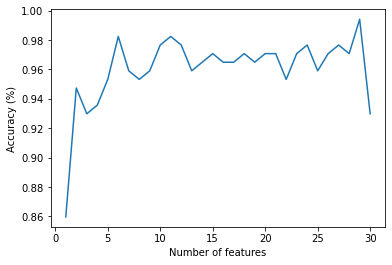

In [13]:
show_accuracy_chart(measures_df)

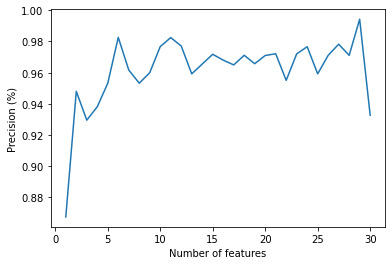

In [14]:
show_precision_chart(measures_df)

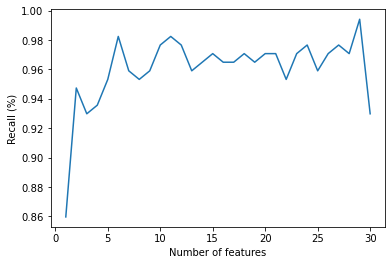

In [15]:
show_recall_chart(measures_df)

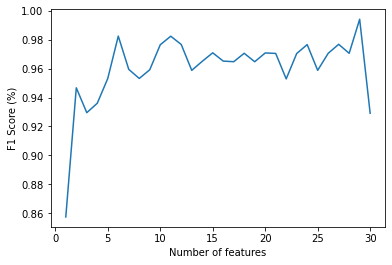

In [16]:
show_f1_score_chart(measures_df)

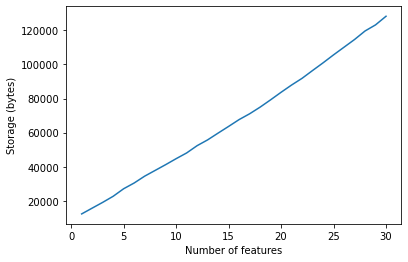

In [17]:
show_storage_chart(measures_df)

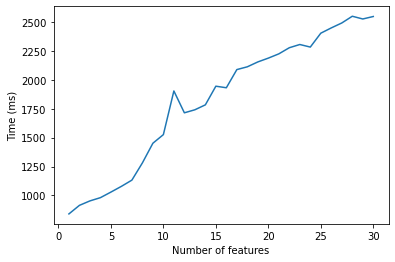

In [18]:
show_training_chart(measures_df)